In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
import scipy as sp
pd.set_option("display.max_columns", None)
from tqdm import tqdm
tqdm.pandas()

In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

# DATA CLEANING AND WRANGLING

### Data Cleaning

In [3]:
df0 = pd.read_excel("RisikoAtlas_EuropeanSurvey.xlsx").rename({"responseid":"ResponseId"}, axis = 1)
# d0 = d0.loc[ (d0["Please state your current occupation."] != "Student") ]
df0

ResponseId    status  country  leg_conditions_riskp  q0  s1  s2_1  \
0           2624  complete       10                     2   1   1    65   
1            296  complete       10                     1   1   2    66   
2           2666  complete       10                     1   1   1    61   
3           2891  complete       10                     2   1   2    60   
4           2633  complete       10                     3   1   1    74   
...          ...       ...      ...                   ...  ..  ..   ...   
3901        1764  complete       10                     2   1   2    32   
3902        5341  complete       10                     1   1   1    33   
3903        1351  complete       10                     1   1   1    34   
3904        6923  complete       10                     2   1   2    30   
3905        6776  complete       10                     1   1   2    35   

      age_rec  s5uk  s4de  s5de  s4it  s5it  s4es  s5es  s5fr  s5pl  s5se  \
0           4   NaN   NaN   NaN   NaN   NaN   5.0   2.0   NaN   NaN   NaN   
1           4   NaN   NaN   NaN   NaN   NaN   2.0   2.0   NaN   NaN   NaN   
2           4   NaN   NaN   NaN   NaN   NaN   5.0   2.0   NaN   NaN   NaN   
3           4   NaN   NaN   NaN   NaN   NaN   5.0   2.0   NaN   NaN   NaN   
4           4   NaN   NaN   NaN   NaN   NaN   5.0   2.0   NaN   NaN   NaN   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3901        2   NaN   NaN   NaN   NaN   NaN   2.0   6.0   NaN   NaN   NaN   
3902        2   NaN   NaN   NaN   NaN   NaN   2.0  99.0   NaN   NaN   NaN   
3903        2   NaN   NaN   NaN   NaN   NaN   2.0   5.0   NaN   NaN   NaN   
3904        2   NaN   NaN   NaN   NaN   NaN   4.0   5.0   NaN   NaN   NaN   
3905        2   NaN   NaN   NaN   NaN   NaN   2.0   5.0   NaN   NaN   NaN   

      isced                 s7                s8 English_occupation  q5_1  \
0         2         Vilasantar           capataz                NaN     4   
1         2  Alcala de Henares       Pensionista                NaN     4   
2         2          LA CORUÑA          JUBILADO                NaN     3   
3         2           valencia  visitador medico                NaN     5   
4         2          Barcelona          Jubilada                NaN     5   
...     ...                ...               ...                ...   ...   
3901      3              AVILA            Parado                NaN     3   
3902      3         tornavacas       desempleada                NaN     3   
3903      3      palma del rio       desempleada                NaN     5   
3904      3         Hospitalet      Mozo almacen                NaN     4   
3905      3            SEVILLA       DESEMPLEADO                NaN     1   

      q5_2  q5_5  q5_6  q5_9  q8_2_1  q8_2_2  q8_2_3  q8_2_4  q8_2_5  q8_3  \
0        2     3     4     4       1       1       1       2       2     4   
1        3     1     5     4       1       1       1       2       2     4   
2        3     3     5     1       2       2       2       1       2     1   
3        3     2     5     5       1       1       1       1       2     2   
4        5     5     5     2       1       1       1       1       2     3   
...    ...   ...   ...   ...     ...     ...     ...     ...     ...   ...   
3901     3     3     3     5       1       1       1       1       1     2   
3902     3     3     3     3       1       1       1       1       2     3   
3903     5     3     5     1       2       1       1       2       1     4   
3904     2     3     5     3       1       1       1       2       2     2   
3905     1     1     1     1       2       2       2       2       2     4   

      q8_4  q8_5berlin_1  q8_5london_1  q8_5paris_1  q8_6  q8_7  q9_1_1  \
0        1             1             1            2     2     4      25   
1        4             1             1            2     3     2      25   
2        4             2             1            2     4     4      50   
3        4        

In [4]:
# Age groups/rec = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 55 y/o
# Age group 4 = 56 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)

df0["age"] = df0["s2_1"].astype(float)

# Secondary upto 10 – ISCED 3
# Senior Secondary upto 12 - ISCED 3 
# Diploma and voca – ISCED 2
# UG – ISCED 2
# PG – ISCED 1
# PhD and higher – ISCED 1


df0["income"] = df0["incomelevels"]
df0["wealth"] = df0["q14_1"]

In [5]:
def remove_indexname(series): # removes index name
    series.index.name = None
    series.name = None
    return series.to_string()

In [6]:
print("Total Observations:", df0["ResponseId"].count())

print(f'\nGender:\n{remove_indexname(df0["s1"].astype(float).value_counts().rename(index = {1:"Female", 2:"Male"}))}')
print(f'\nISCED:\n{remove_indexname(df0["isced"].value_counts())}')
print(f'\nIncome:\n{remove_indexname(df0["income"].value_counts())}')

Total Observations: 3906

Gender:
Female    2000
Male      1906

ISCED:
2    1795
1    1197
3     914

Income:
1.0    853
2.0    785
3.0    654
4.0    480
5.0    359
6.0    240


## Scoring

In [7]:
scoreColumns = ["certainty1", "certainty2", "certainty3", "certainty4", "certainty5",
                "uncertainty1", "uncertainty2",
                "numeracy1", "numeracy2", "numeracy3", "numeracy4", "numeracy5",
                "graph1", "graph2", "graph3",
                "riskcomprehension1", "riskcomprehension2", "riskcomprehension3", "riskcomprehension4", "riskcomprehension5",
                "bayesian1"
               ]
df0[scoreColumns] = 0

In [8]:
# Assigning scores

def scoring1(surveyFacet):
    surveyFacet.loc[ surveyFacet["q8_2_1"] == 2, "certainty1"] = 1
    surveyFacet.loc[ surveyFacet["q8_2_2"] == 2, "certainty2"] = 1
    surveyFacet.loc[ surveyFacet["q8_2_3"] == 2, "certainty3"] = 1
    surveyFacet.loc[ surveyFacet["q8_2_4"] == 2, "certainty4"] = 1
    surveyFacet.loc[ surveyFacet["q8_2_5"] == 2, "certainty5"] = 1

    surveyFacet.loc[ surveyFacet["q8_3"] == 1, "uncertainty1"] = 1
    surveyFacet.loc[ surveyFacet["q8_4"] == 4, "uncertainty2"] = 1

    surveyFacet.loc[ surveyFacet["q8_5berlin_1"] == 2, "riskcomprehension1"] = 1
    surveyFacet.loc[ surveyFacet["q8_5london_1"] == 1, "riskcomprehension2"] = 1
    surveyFacet.loc[ surveyFacet["q8_5paris_1"] == 1, "riskcomprehension3"] = 1
    
    surveyFacet.loc[ surveyFacet["q8_6"] == 1, "riskcomprehension4"] = 1
    surveyFacet.loc[ surveyFacet["q8_7"] == 4, "riskcomprehension5"] = 1

    surveyFacet.loc[ surveyFacet["q9_1_1"] == 25, "graph1"] = 1
    surveyFacet.loc[ surveyFacet["q9_2_1"] == 20, "graph2"] = 1
    surveyFacet.loc[ surveyFacet["q9_3"] == 3, "graph3"] = 1

    surveyFacet.loc[ surveyFacet["q10_1_1"] == 500, "numeracy1"] = 1
    surveyFacet.loc[ surveyFacet["q10_2_1"] == 10, "numeracy2"] = 1
    surveyFacet.loc[ (surveyFacet["q10_3_1"] == 0.1) | (surveyFacet["q10_3_1"] == ".1") | (surveyFacet["q10_3_1"] == ",1") , "numeracy3"] = 1
    surveyFacet.loc[ surveyFacet["q10_4"] == 1, "bayesian1"] = 1

    # Assigning total scores
    # surveyFacet["Certainty score_5"] = surveyFacet["certainty1"] + surveyFacet["certainty2"] + surveyFacet["certainty3"] + surveyFacet["certainty4"] + surveyFacet["certainty5"]
    #surveyFacet["Uncertainty score_5"] = surveyFacet["uncertainty1"] + surveyFacet["uncertainty2"]

    #surveyFacet["Number Comprehension score_5"] = surveyFacet["numeracy1"] + surveyFacet["numeracy2"] + surveyFacet["numeracy3"] + surveyFacet["numeracy4"] + surveyFacet["numeracy5"]
    #surveyFacet["Graph Comprehension score_5"] = surveyFacet["graph1"] + surveyFacet["graph2"] + surveyFacet["graph3"]

    #surveyFacet["Calculation score_4"] = surveyFacet["riskcalculation1"] + surveyFacet["riskcalculation2"] + surveyFacet["riskcalculation3"] + surveyFacet["riskcalculation4"]

    #surveyFacet["Total Score_19"] = surveyFacet["Certainty score_5"] + surveyFacet["Uncertainty score_5"] + surveyFacet["Number Comprehension score_5"] + surveyFacet["Graph Comprehension score_5"] + surveyFacet["Calculation score_4"]

    return surveyFacet

In [9]:
df10 = df0.groupby(["ResponseId"]).progress_apply(scoring1)
df10 = df10.reset_index(drop = True).copy()

100%|█████████████████████████████████████████████████████████████████████████████| 3906/3906 [00:19<00:00, 204.73it/s]


In [10]:
def scoring2(survey):
    
    survey["Certainty_5"] = survey["certainty1"] + survey["certainty2"] + survey["certainty3"] + survey["certainty4"] + survey["certainty5"]
    
    survey["Uncertainty_2"] = survey["uncertainty1"] + survey["uncertainty2"]
    
    survey["RiskComprehension_5"] = survey["riskcomprehension1"] + survey["riskcomprehension2"] + survey["riskcomprehension3"] + survey["riskcomprehension4"] + survey["riskcomprehension5"]
    
    survey["GraphLiteracy_3"] = survey["graph1"] + survey["graph2"] + survey["graph3"]
    
    survey["Numeracy_3"] = survey["numeracy1"] + survey["numeracy2"] + survey["numeracy3"]
    
    survey["Bayesianreasoning_1"] = survey["bayesian1"]
    
    survey["TotalScore_19"] = survey["Certainty_5"] + survey["Uncertainty_2"] + survey["RiskComprehension_5"] + survey["GraphLiteracy_3"] + survey["Numeracy_3"] + survey["Bayesianreasoning_1"]
    
    survey["Certainty_%"] = survey["Certainty_5"] / 5 * 100
    survey["Uncertainty_%"] = survey["Uncertainty_2"] / 2 * 100
    survey["RiskComprehension_%"] = survey["RiskComprehension_5"] / 5 * 100
    survey["GraphLiteracy_%"] = survey["GraphLiteracy_3"] / 3 * 100
    survey["Numeracy_%"] = survey["Numeracy_3"] / 3 * 100
    survey["Bayesianreasoning_%"] = survey["Bayesianreasoning_1"] / 1 * 100
    
    survey["TotalScore_%"] = survey["TotalScore_19"] / 19 * 100
    
    
    colReq = ["ResponseId", "age", "age_rec", "isced", "income", "wealth", "Certainty_5", "Uncertainty_2", "RiskComprehension_5", "GraphLiteracy_3",
              "Numeracy_3", "Bayesianreasoning_1", "Certainty_%", "Uncertainty_%", "RiskComprehension_%", "GraphLiteracy_%", "Numeracy_%", "Bayesianreasoning_%",
              "TotalScore_19", "TotalScore_%",]
    
    survey1 = survey[colReq].copy()
    return survey1

In [11]:
df11 = scoring2(df10)

In [12]:
df2 = df11.dropna(subset = ["income", "wealth"]).copy()

In [13]:
df2

ResponseId   age  age_rec  isced  income    wealth  Certainty_5  \
0              1  36.0        3      1     3.0   20000.0            5   
1              2  69.0        4      1     3.0  300000.0            1   
2              5  49.0        3      1     1.0  100000.0            4   
4              9  37.0        3      1     2.0   10000.0            3   
6             12  49.0        3      3     3.0   29000.0            2   
...          ...   ...      ...    ...     ...       ...          ...   
3894       14344  67.0        4      2     3.0   20000.0            1   
3896       14390  73.0        4      2     5.0   15000.0            1   
3898       14419  68.0        4      2     4.0  400000.0            1   
3900       15573  49.0        3      1     4.0       0.0            1   
3905       15861  32.0        2      3     1.0     309.0            2   

      Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_3  \
0                 2                    3                3           3   
1                 1                    4                2           3   
2                 1                    2                1           1   
4                 1                    5                3           3   
6                 0                    1                1           1   
...             ...                  ...              ...         ...   
3894              0                    3                1           3   
3896              1                    3                1           2   
3898              0                    2                2           2   
3900              1                    2                3           3   
3905              1                    3                1           0   

      Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
0                       1        100.0          100.0                 60.0   
1                       1         20.0           50.0                 80.0   
2                       0         80.0           50.0                 40.0   
4                       0         60.0           50.0                100.0   
6                       0         40.0            0.0                 20.0   
...                   ...          ...            ...                  ...   
3894                    0         20.0            0.0                 60.0   
3896                    0         20.0           50.0                 60.0   
3898                    0         20.0            0.0                 40.0   
3900                    0         20.0           50.0                 40.0   
3905                    0         40.0           50.0                 60.0   

      GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_19  \
0          100.000000  100.000000                100.0             17   
1           66.666667  100.000000                100.0             12   
2           33.333333   33.333333                  0.0              9   
4          100.000000  100.000000                  0.0             15   
6           33.333333   33.333333                  0.0              5   
...               ...         ...                  ...            ...   
3894        33.333333  100.000000                  0.0              8   
3896        33.333333   66.666667                  0.0              8   
3898        66.666667   66.666667                  0.0              7   
3900       100.000000  100.000000                  0.0             10   
3905        33.333333    0.000000                  0.0              7   

      TotalScore_%  
0        89.473684  
1        63.157895  
2        47.368421  
4        78.947368  
6        26.315789  
...            ...  
3894     42.105263  
3896     42.105263  
3898     36.842105  
3900     52.631579  
3905     36.842105  

[2146 rows x 20 columns]

# GRAPHS

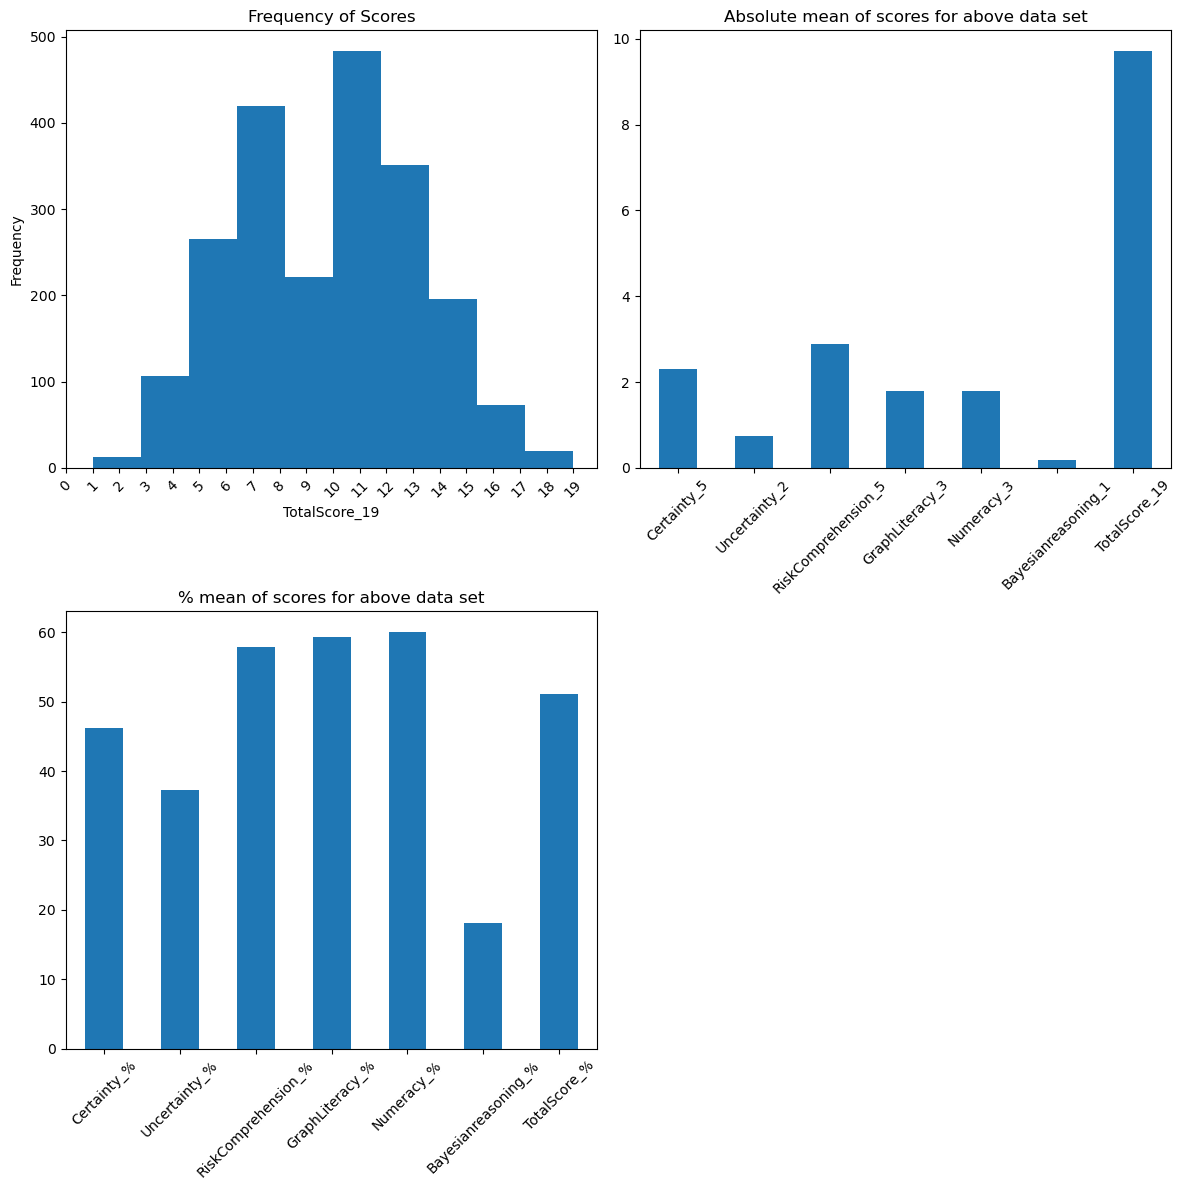

In [14]:
fig, axes = plt.subplots(2, 2, figsize = [12, 12])
fig.subplots_adjust(hspace=1)


# The following graph represents frequency of each data point on "TotalScore_19" or the total score out of 13 questions across the sample.
df2['TotalScore_19'].plot(kind = 'hist', xticks = np.arange(0, 20, step=1), xlabel = 'TotalScore_19', title = 'Frequency of Scores', ax = axes[0, 0] )
axes[0, 0].tick_params(axis = "x", rotation = 45)

# Absolute mean scores for each facet
(df2[['Certainty_5', 'Uncertainty_2', 'RiskComprehension_5','GraphLiteracy_3',
      'Numeracy_3','Bayesianreasoning_1','TotalScore_19']].mean(axis = 0)).plot(kind = 'bar', title = 'Absolute mean of scores for above data set', ax = axes[0, 1])
axes[0, 1].tick_params(axis = "x", rotation = 45)

# Normalised mean scores for each facet
df2[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','GraphLiteracy_%',
     'Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean(axis = 0).plot(kind = 'bar', title = '% mean of scores for above data set', ax = axes[1, 0])
axes[1, 0].tick_params(axis = "x", rotation = 45)

axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

# ISCED

In [15]:
# Data Frame 5 or df5 is an aggregate data on facet total scores and over all total score, along with  education data vs each response. 
# This data set is now sorted by education.

df5 = df2.sort_values(by = 'isced')
df5 = df5.reset_index(drop = True)

In [16]:
# Mean of each facet as a % for each category of isced

df5.groupby('isced')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%',
                      'Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean()

Certainty_%  Uncertainty_%  RiskComprehension_%  Numeracy_%  \
isced                                                                
1        49.651325      39.191074            63.654114   70.199907   
2        45.435467      36.201469            56.432319   57.817419   
3        42.352941      36.764706            52.394958   49.229692   

       GraphLiteracy_%  Bayesianreasoning_%  
isced                                        
1            65.086007            19.665272  
2            59.356418            17.523610  
3            50.560224            16.806723

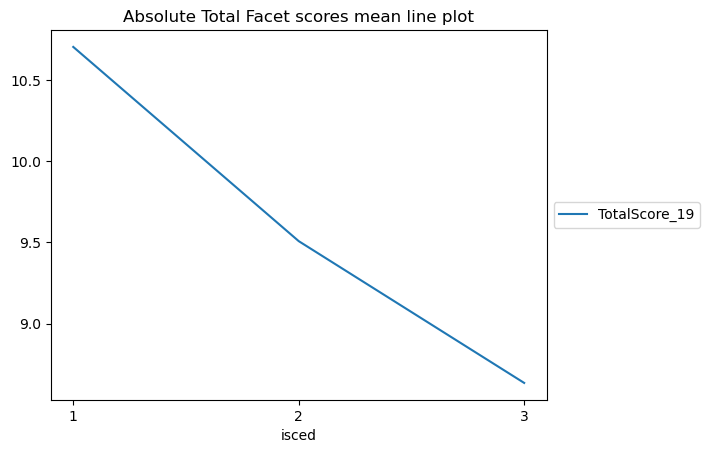

In [17]:
# Absolute Total Facet scores mean line plot from low to high ISCED

df5.groupby('isced')[['TotalScore_19']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

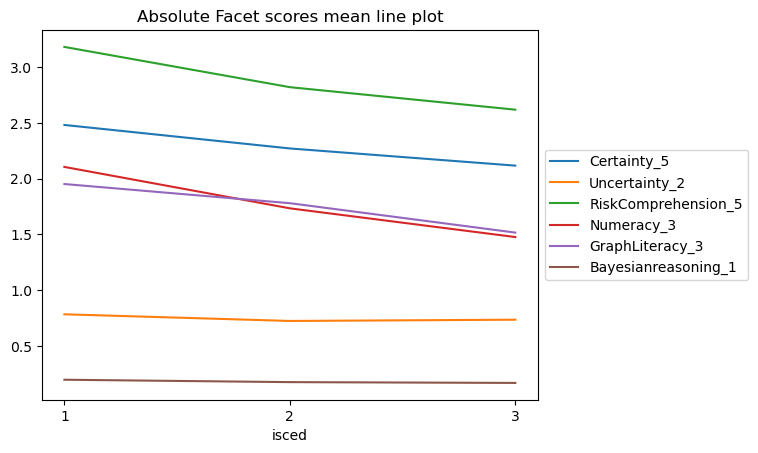

In [18]:
# Absolute Facet scores mean line plot from low to high edu

df5.groupby('isced')[['Certainty_5', "Uncertainty_2", 'RiskComprehension_5','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

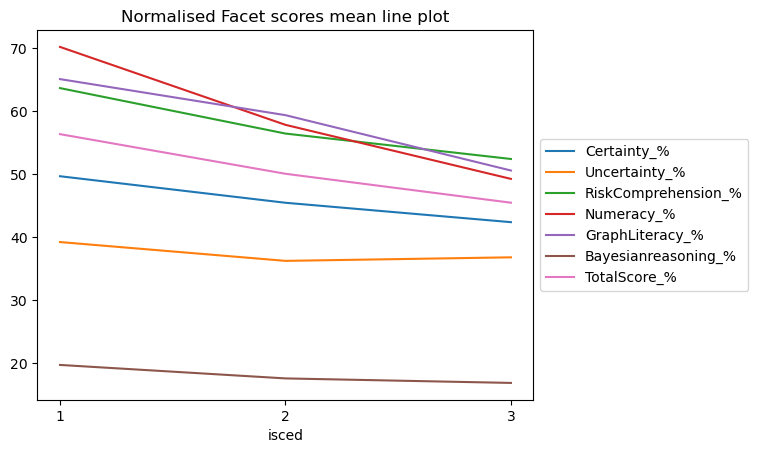

In [19]:
# Normalised Facet scores mean line plot from low to high edu


df5.groupby('isced')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().plot( kind = 'line', title = 'Normalised Facet scores mean line plot', xticks = np.arange(1,4, step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

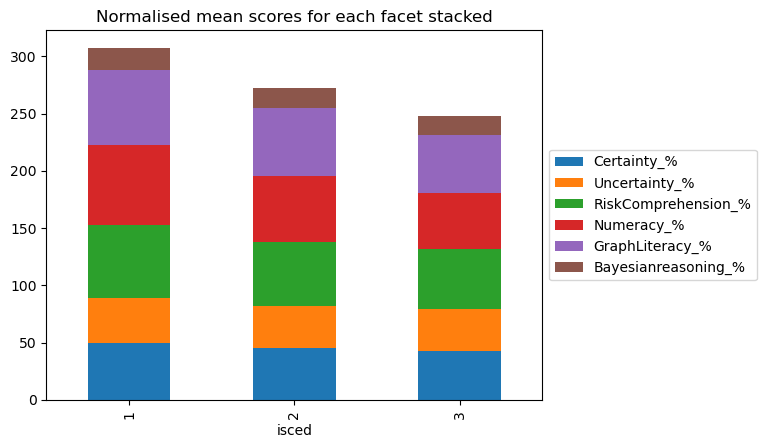

In [20]:
# Normalised mean scores for each facet stacked

df5.groupby('isced')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = 'Normalised mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

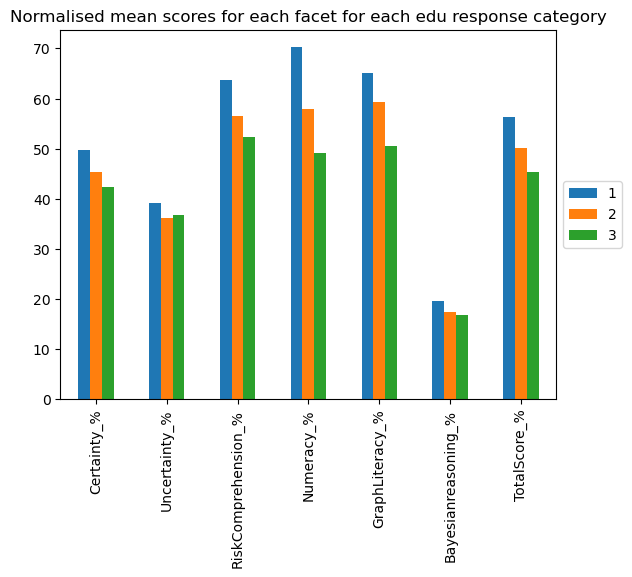

In [21]:
# Normalised mean scores for each facet for each edu response category

df5.groupby('isced')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = 'Normalised mean scores for each facet for each edu response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='isced', ylabel='TotalScore_19'>

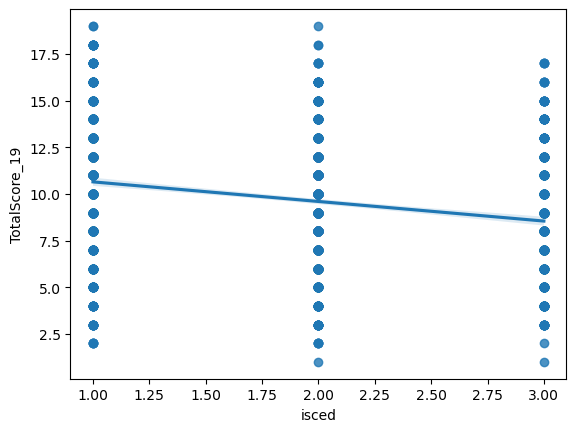

In [22]:
# Trend line for Absolute Total Facet Score vs edu (isced) reponses

sns.regplot (data = df5, x = 'isced', y = 'TotalScore_19')

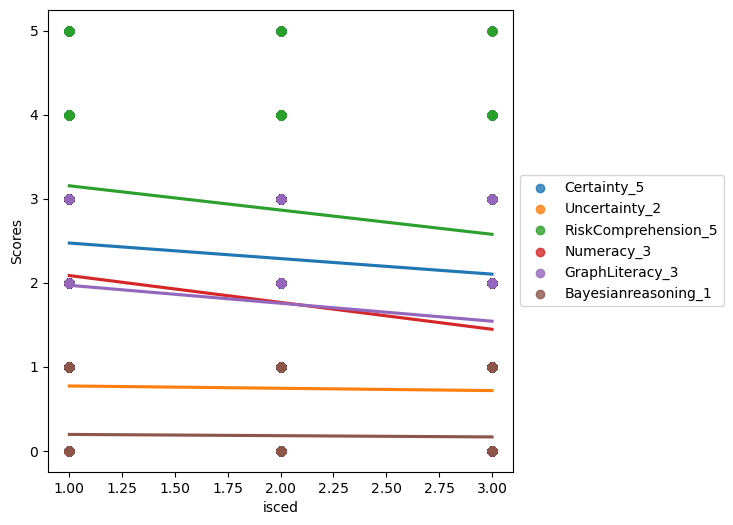

In [23]:
# Trend line for Absolute Independent Facet Score vs edu (isced) reponses

fig, ax6 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df5, x = 'isced', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax6, label='Certainty_5')
sns.regplot (data = df5, x = 'isced', y = 'Uncertainty_2', fit_reg=True, ci=None, ax=ax6, label='Uncertainty_2')
sns.regplot (data = df5, x = 'isced', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax6, label='RiskComprehension_5')
sns.regplot (data = df5, x = 'isced', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax6, label='Numeracy_3')
sns.regplot (data = df5, x = 'isced', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax6, label='GraphLiteracy_3')
sns.regplot (data = df5, x = 'isced', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax6, label='Bayesianreasoning_1' )

ax6.set(ylabel='Scores', xlabel='isced')
ax6.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='isced', ylabel='TotalScore_19'>

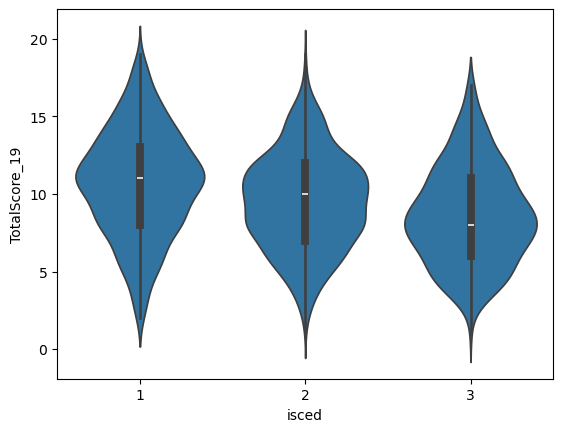

In [24]:
# Violine Plot for TotalScore_19 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'TotalScore_19')

<Axes: xlabel='isced', ylabel='Certainty_5'>

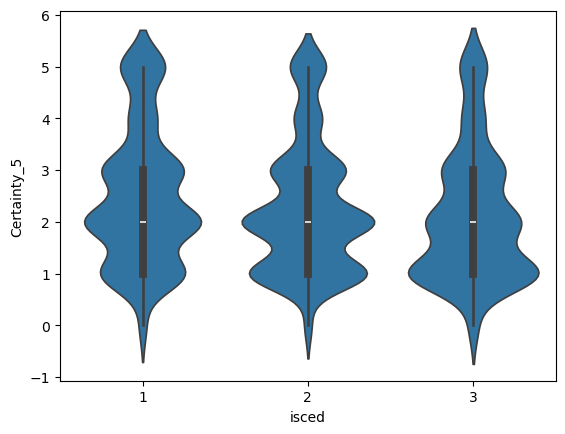

In [25]:
# Violine Plot for Certainty_5 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Certainty_5')

<Axes: xlabel='isced', ylabel='Uncertainty_2'>

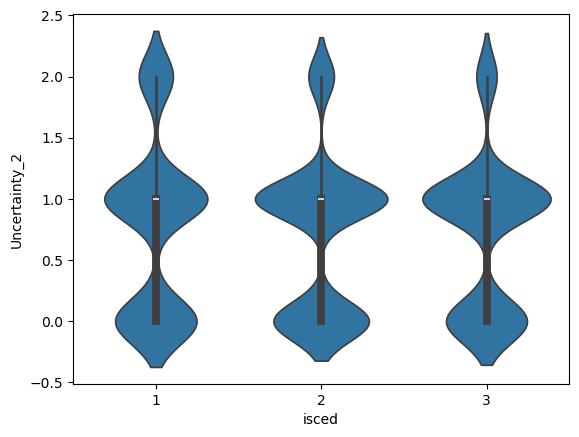

In [26]:
# Violine Plot for Uncertainty_5 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Uncertainty_2')

<Axes: xlabel='isced', ylabel='RiskComprehension_5'>

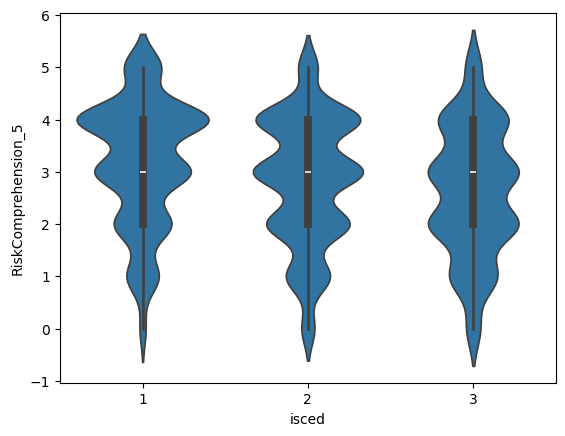

In [27]:
# Violine Plot for RiskComprehension_5 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'RiskComprehension_5')

<Axes: xlabel='isced', ylabel='GraphLiteracy_3'>

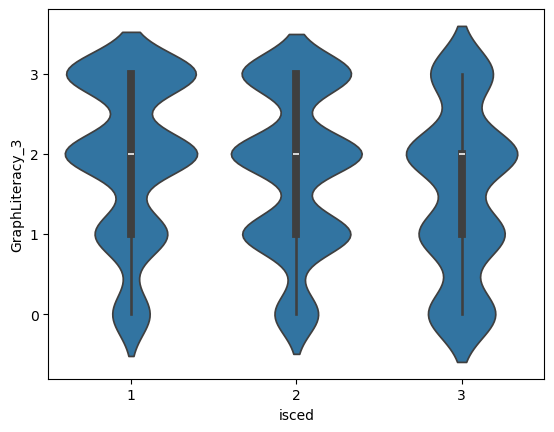

In [28]:
# Violine Plot for GraphLiteracy_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'GraphLiteracy_3')

<Axes: xlabel='isced', ylabel='Numeracy_3'>

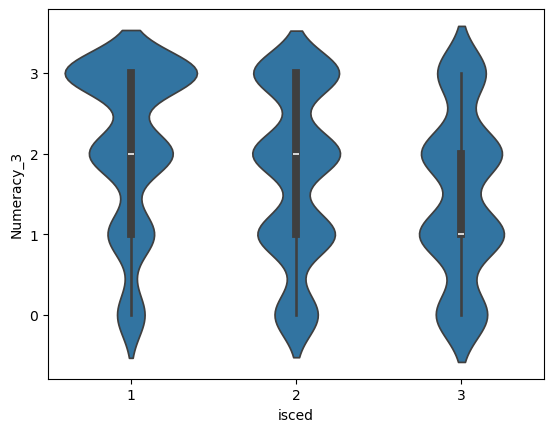

In [29]:
# Violine Plot for Numeracy_3 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Numeracy_3')

<Axes: xlabel='isced', ylabel='Bayesianreasoning_1'>

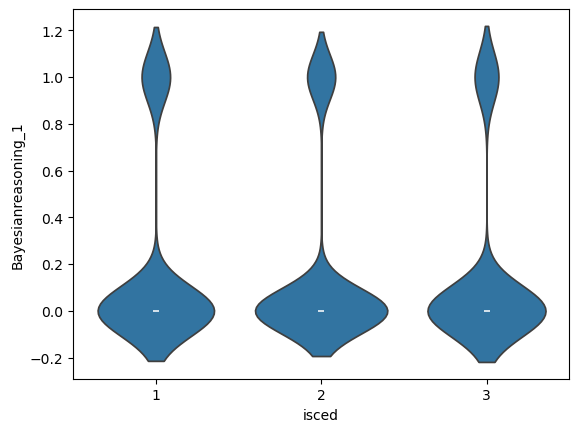

In [30]:
# Violine Plot for TotalScore_19 for each entry under edu.

sns.violinplot( data = df5, x = 'isced', y = 'Bayesianreasoning_1')

## INCOME

### INCOME VS SCORES

In [31]:
# DF3 = Sorted by income

df3 = df2.sort_values(by = 'income')
df3 = df3.reset_index(drop = True)
df3.drop(df3[df3['income'] == 7].index, inplace = True)

In [32]:
# Normalised mean of each facet as a numerical (sorted by income)

df3.groupby('income')[['Certainty_%','RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean()

Certainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
income                                                                  
1.0       42.630561            51.063830        53.127015   48.871696   
2.0       46.012024            56.993988        60.721443   57.314629   
3.0       45.741627            58.755981        61.722488   63.476874   
4.0       49.250000            62.312500        60.104167   65.520833   
5.0       46.782609            62.434783        62.028986   70.144928   
6.0       51.975309            65.802469        63.168724   70.164609   

        Bayesianreasoning_%  TotalScore_%  
income                                     
1.0               18.181818     45.546167  
2.0               16.032064     50.543192  
3.0               21.770335     52.316797  
4.0               18.437500     54.161184  
5.0               16.521739     54.233410  
6.0               16.049383     57.244964

In [33]:
# Count of responses for each category (sorted by income)

df3.groupby('income')[['ResponseId']].count()

ResponseId
income            
1.0            517
2.0            499
3.0            418
4.0            320
5.0            230
6.0            162

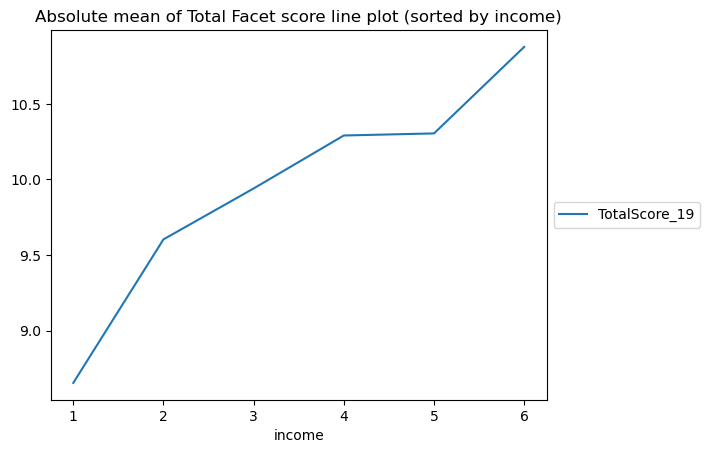

In [34]:
# Absolute mean of Total Facet score line plot (sorted by income)

df3.groupby('income')[['TotalScore_19']].mean().plot( kind = 'line', title = 'Absolute mean of Total Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

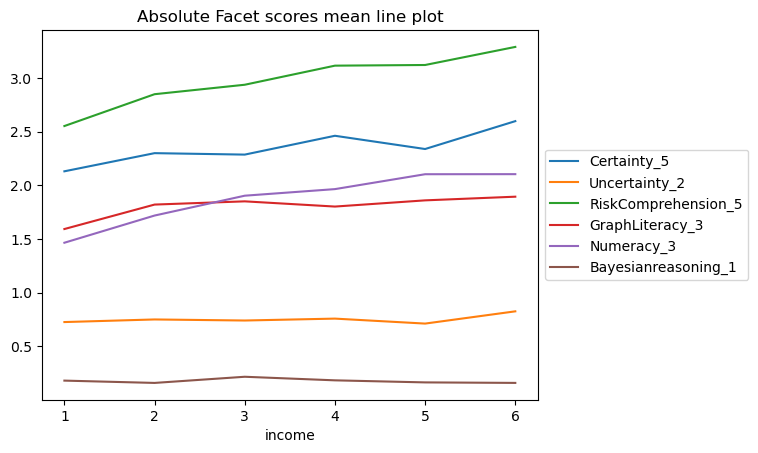

In [35]:
# Absolute mean of each Facet score line plot (sorted by income)

df3.groupby('income')[['Certainty_5', "Uncertainty_2", 'RiskComprehension_5','GraphLiteracy_3','Numeracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

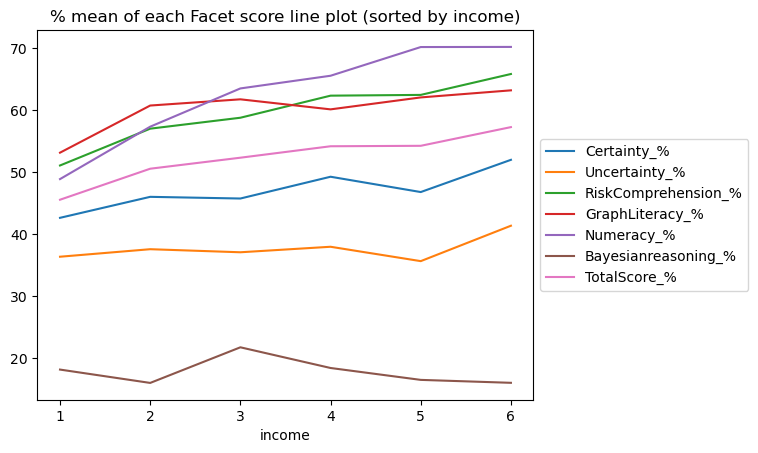

In [36]:
# Normalised mean of each Facet score line plot (sorted by income)


df3.groupby('income')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%', 'TotalScore_%']].mean().plot( kind = 'line', title = '% mean of each Facet score line plot (sorted by income)').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

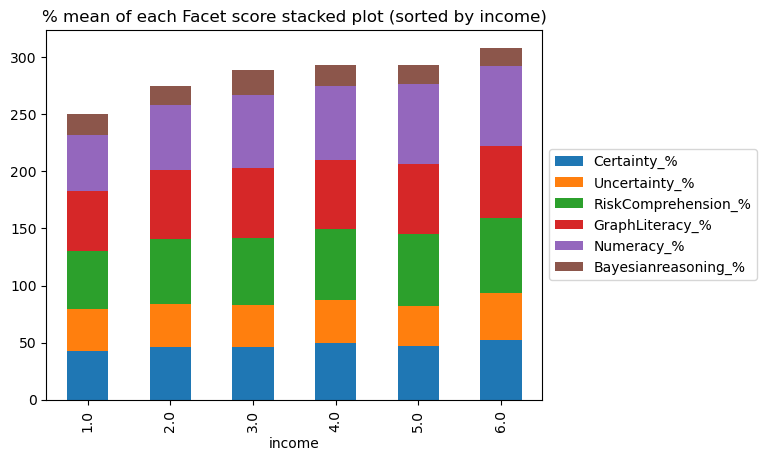

In [37]:
# Normalised mean of each Facet score stacked plot (sorted by income)

df3.groupby('income')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = '% mean of each Facet score stacked plot (sorted by income)', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

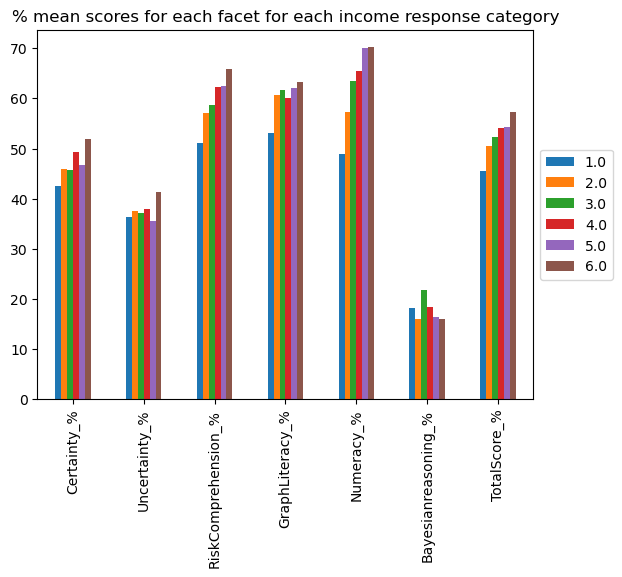

In [38]:
# Normalised mean of each Facet score hist plot (sorted by income)

df3.groupby('income')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','GraphLiteracy_%','Numeracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = '% mean scores for each facet for each income response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='income', ylabel='TotalScore_19'>

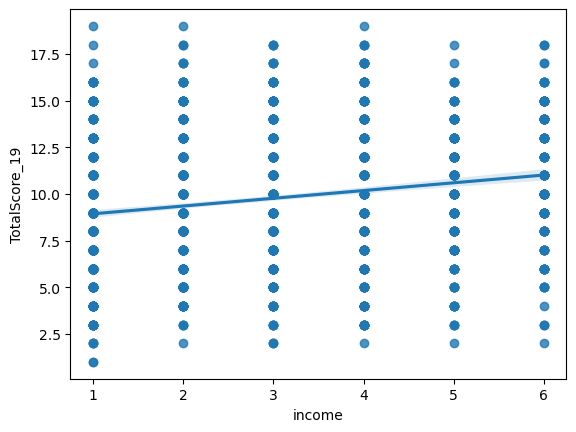

In [39]:
# Trend line for Absolute Total Facet Score vs income

sns.regplot (data = df3, x = 'income', y = 'TotalScore_19')

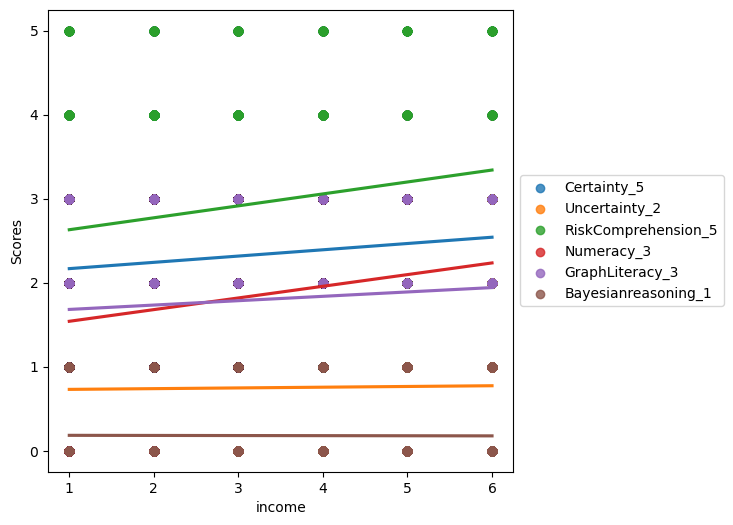

In [40]:
# Trend line for Absolute Independent Facet Score vs income reponses

fig, ax = plt.subplots(figsize=(6, 6))

sns.regplot (data = df3, x = 'income', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax, label='Certainty_5')
sns.regplot (data = df3, x = 'income', y = 'Uncertainty_2', fit_reg=True, ci=None, ax=ax, label='Uncertainty_2')
sns.regplot (data = df3, x = 'income', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax, label='RiskComprehension_5')
sns.regplot (data = df3, x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax, label='Numeracy_3')
sns.regplot (data = df3, x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax, label='GraphLiteracy_3')
sns.regplot (data = df3, x = 'income', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax, label='Bayesianreasoning_1' )

ax.set(ylabel='Scores', xlabel='income')
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='income', ylabel='TotalScore_19'>

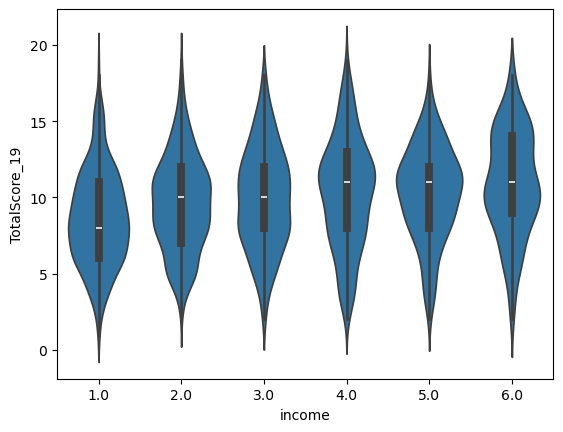

In [41]:
# Violin Plot for TotalScore_19 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'TotalScore_19')

<Axes: xlabel='income', ylabel='Certainty_5'>

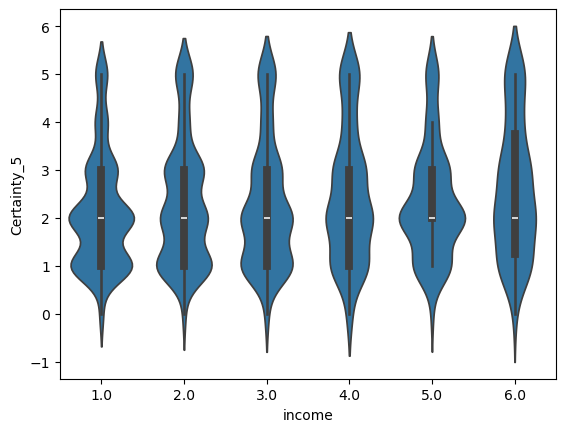

In [42]:
# Violin Plot for Certainty_5 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Certainty_5')

<Axes: xlabel='income', ylabel='Uncertainty_2'>

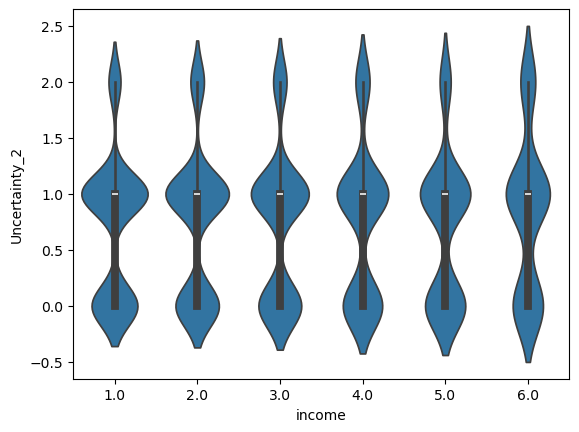

In [43]:
# Violin Plot for Certainty_5 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Uncertainty_2')

<Axes: xlabel='income', ylabel='RiskComprehension_5'>

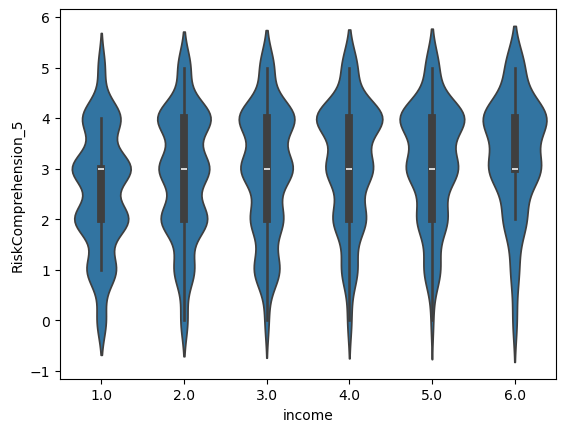

In [44]:
# Violine Plot for RiskComprehension_5 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'RiskComprehension_5')

<Axes: xlabel='income', ylabel='GraphLiteracy_3'>

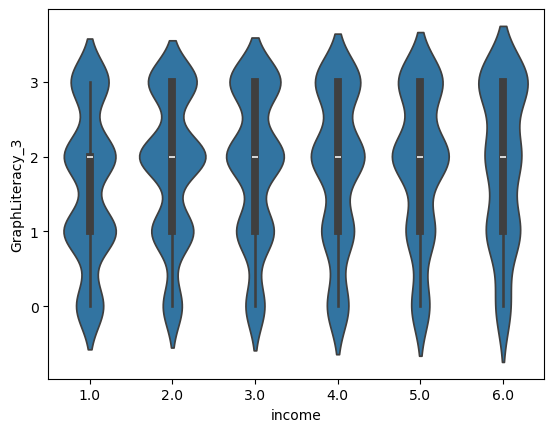

In [45]:
# Violine Plot for GraphLiteracy_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'GraphLiteracy_3')

<Axes: xlabel='income', ylabel='Numeracy_3'>

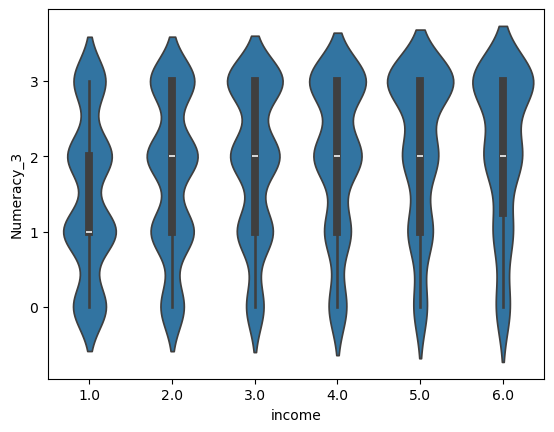

In [46]:
# Violine Plot for Numeracy_3 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Numeracy_3')

<Axes: xlabel='income', ylabel='Bayesianreasoning_1'>

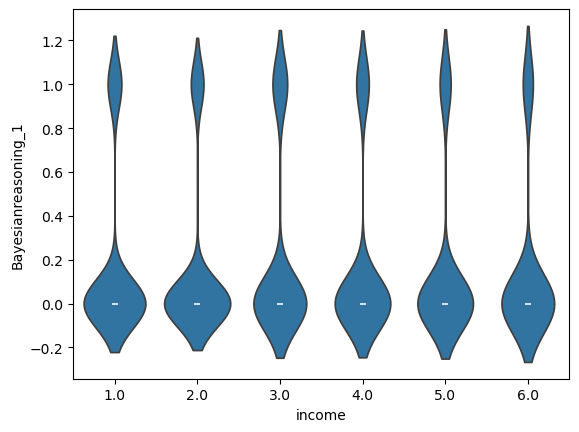

In [47]:
# Violine Plot for TotalScore_19 for each entry under income.

sns.violinplot( data = df3, x = 'income', y = 'Bayesianreasoning_1')

### INCOME vs SCORES w/ ISCED classification

In [48]:
# Descriptive stats for the data set, isced = 1
# NA values of income are removed

df7 = df5
df7.drop(df7[df7['income'] == 7].index, inplace = True)

df7.loc[df7['isced']==1].describe()

ResponseId         age     age_rec  isced      income        wealth  \
count    717.000000  717.000000  717.000000  717.0  717.000000  7.170000e+02   
mean    5749.210600   46.157601    2.914923    1.0    3.509066  2.970998e+05   
std     3918.532198   14.712097    0.743510    0.0    1.573698  6.008920e+05   
min        1.000000   18.000000    2.000000    1.0    1.000000  0.000000e+00   
25%     2025.000000   33.000000    2.000000    1.0    2.000000  1.000000e+04   
50%     5819.000000   45.000000    3.000000    1.0    4.000000  7.500000e+04   
75%     8920.000000   59.000000    3.000000    1.0    5.000000  3.000000e+05   
max    15573.000000   75.000000    4.000000    1.0    6.000000  5.000000e+06   

       Certainty_5  Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  \
count   717.000000     717.000000           717.000000       717.000000   
mean      2.482566       0.783821             3.182706         1.952580   
std       1.319722       0.694645             1.187143         0.971944   
min       0.000000       0.000000             0.000000         0.000000   
25%       1.000000       0.000000             2.000000         1.000000   
50%       2.000000       1.000000             3.000000         2.000000   
75%       3.000000       1.000000             4.000000         3.000000   
max       5.000000       2.000000             5.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  Uncertainty_%  \
count  717.000000           717.000000   717.000000     717.000000   
mean     2.105997             0.196653    49.651325      39.191074   
std      0.992953             0.397745    26.394431      34.732232   
min      0.000000             0.000000     0.000000       0.000000   
25%      1.000000             0.000000    20.000000       0.000000   
50%      2.000000             0.000000    40.000000      50.000000   
75%      3.000000             0.000000    60.000000      50.000000   
max      3.000000             1.000000   100.000000     100.000000   

       RiskComprehension_%  GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  \
count           717.000000       717.000000  717.000000           717.000000   
mean             63.654114        65.086007   70.199907            19.665272   
std              23.742868        32.398141   33.098432            39.774498   
min               0.000000         0.000000    0.000000             0.000000   
25%              40.000000        33.333333   33.333333             0.000000   
50%              60.000000        66.666667   66.666667             0.000000   
75%              80.000000       100.000000  100.000000             0.000000   
max             100.000000       100.000000  100.000000           100.000000   

       TotalScore_19  TotalScore_%  
count     717.000000    717.000000  
mean       10.704324     56.338545  
std         3.409508     17.944778  
min         2.000000     10.526316  
25%         8.000000     42.105263  
50%        11.000000     57.894737  
75%        13.000000     68.421053  
max        19.000000    100.000000

In [49]:
df7.loc[df7['isced']==2].describe()

ResponseId         age     age_rec  isced      income        wealth  \
count    953.000000  953.000000  953.000000  953.0  953.000000  9.530000e+02   
mean    6195.751312   47.355719    2.985310    2.0    2.704092  2.212588e+05   
std     4333.270322   14.947261    0.736071    0.0    1.479039  4.881513e+05   
min       15.000000   18.000000    2.000000    2.0    1.000000  0.000000e+00   
25%     1810.000000   34.000000    2.000000    2.0    1.000000  4.000000e+03   
50%     6433.000000   49.000000    3.000000    2.0    2.000000  4.000000e+04   
75%     9481.000000   60.000000    4.000000    2.0    4.000000  2.000000e+05   
max    14419.000000   75.000000    4.000000    2.0    6.000000  5.000000e+06   

       Certainty_5  Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  \
count   953.000000     953.000000           953.000000       953.000000   
mean      2.271773       0.724029             2.821616         1.780693   
std       1.260507       0.633799             1.208198         0.976168   
min       0.000000       0.000000             0.000000         0.000000   
25%       1.000000       0.000000             2.000000         1.000000   
50%       2.000000       1.000000             3.000000         2.000000   
75%       3.000000       1.000000             4.000000         3.000000   
max       5.000000       2.000000             5.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  Uncertainty_%  \
count  953.000000           953.000000   953.000000     953.000000   
mean     1.734523             0.175236    45.435467      36.201469   
std      1.036029             0.380369    25.210131      31.689959   
min      0.000000             0.000000     0.000000       0.000000   
25%      1.000000             0.000000    20.000000       0.000000   
50%      2.000000             0.000000    40.000000      50.000000   
75%      3.000000             0.000000    60.000000      50.000000   
max      3.000000             1.000000   100.000000     100.000000   

       RiskComprehension_%  GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  \
count           953.000000       953.000000  953.000000           953.000000   
mean             56.432319        59.356418   57.817419            17.523610   
std              24.163959        32.538936   34.534287            38.036854   
min               0.000000         0.000000    0.000000             0.000000   
25%              40.000000        33.333333   33.333333             0.000000   
50%              60.000000        66.666667   66.666667             0.000000   
75%              80.000000       100.000000  100.000000             0.000000   
max             100.000000       100.000000  100.000000           100.000000   

       TotalScore_19  TotalScore_%  
count     953.000000    953.000000  
mean        9.507870     50.041420  
std         3.092447     16.276035  
min         1.000000      5.263158  
25%         7.000000     36.842105  
50%        10.000000     52.631579  
75%        12.000000     63.157895  
max        19.000000    100.000000

In [50]:
df7.loc[df7['isced']==3].describe()

ResponseId         age     age_rec  isced      income        wealth  \
count    476.000000  476.000000  476.000000  476.0  476.000000  4.760000e+02   
mean    3632.764706   51.913866    3.222689    3.0    2.264706  1.435044e+05   
std     3661.192748   15.209517    0.740405    0.0    1.363160  4.986552e+05   
min       12.000000   18.000000    2.000000    3.0    1.000000  0.000000e+00   
25%      916.750000   42.000000    3.000000    3.0    1.000000  7.225000e+02   
50%     1924.500000   55.500000    3.000000    3.0    2.000000  1.000000e+04   
75%     6220.250000   64.000000    4.000000    3.0    3.000000  6.850000e+04   
max    15861.000000   75.000000    4.000000    3.0    6.000000  5.000000e+06   

       Certainty_5  Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  \
count   476.000000     476.000000           476.000000       476.000000   
mean      2.117647       0.735294             2.619748         1.516807   
std       1.279319       0.609827             1.224465         1.022757   
min       0.000000       0.000000             0.000000         0.000000   
25%       1.000000       0.000000             2.000000         1.000000   
50%       2.000000       1.000000             3.000000         2.000000   
75%       3.000000       1.000000             4.000000         2.000000   
max       5.000000       2.000000             5.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  Uncertainty_%  \
count  476.000000           476.000000   476.000000     476.000000   
mean     1.476891             0.168067    42.352941      36.764706   
std      1.001836             0.374319    25.586374      30.491333   
min      0.000000             0.000000     0.000000       0.000000   
25%      1.000000             0.000000    20.000000       0.000000   
50%      1.000000             0.000000    40.000000      50.000000   
75%      2.000000             0.000000    60.000000      50.000000   
max      3.000000             1.000000   100.000000     100.000000   

       RiskComprehension_%  GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  \
count           476.000000       476.000000  476.000000           476.000000   
mean             52.394958        50.560224   49.229692            16.806723   
std              24.489299        34.091914   33.394533            37.431937   
min               0.000000         0.000000    0.000000             0.000000   
25%              40.000000        33.333333   33.333333             0.000000   
50%              60.000000        66.666667   33.333333             0.000000   
75%              80.000000        66.666667   66.666667             0.000000   
max             100.000000       100.000000  100.000000           100.000000   

       TotalScore_19  TotalScore_%  
count     476.000000    476.000000  
mean        8.634454     45.444494  
std         3.132309     16.485835  
min         1.000000      5.263158  
25%         6.000000     31.578947  
50%         8.000000     42.105263  
75%        11.000000     57.894737  
max        17.000000     89.473684

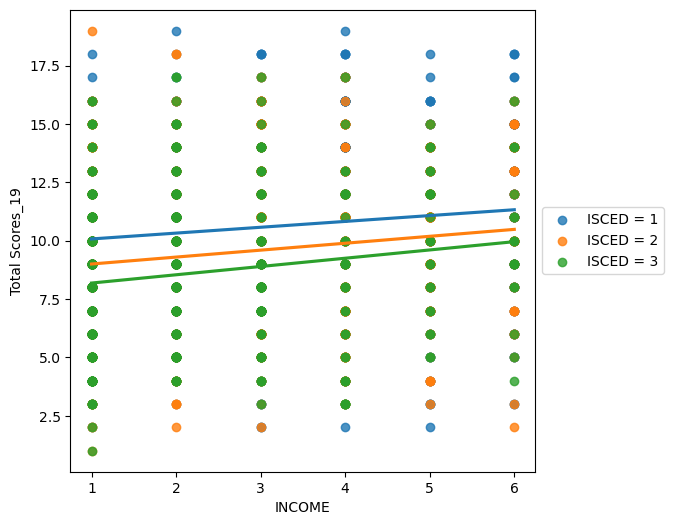

In [51]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==1]['TotalScore_19'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==2]['TotalScore_19'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = df7.loc[df7['isced']==3]['TotalScore_19'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='INCOME')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

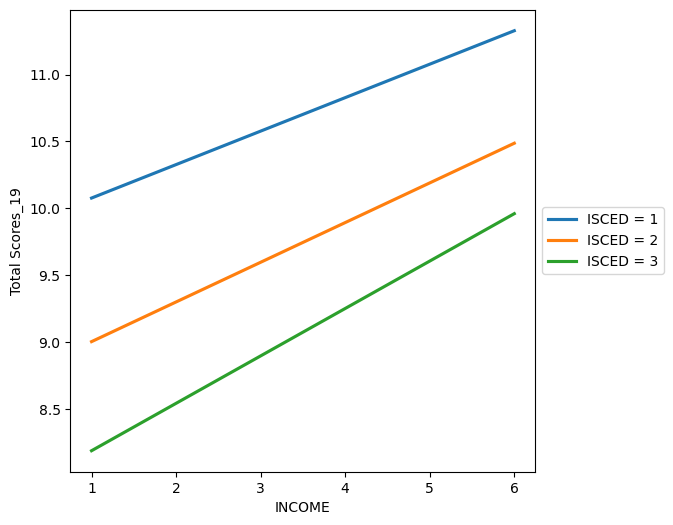

In [52]:
# Trend line for Absolute Tota Facet Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='INCOME')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

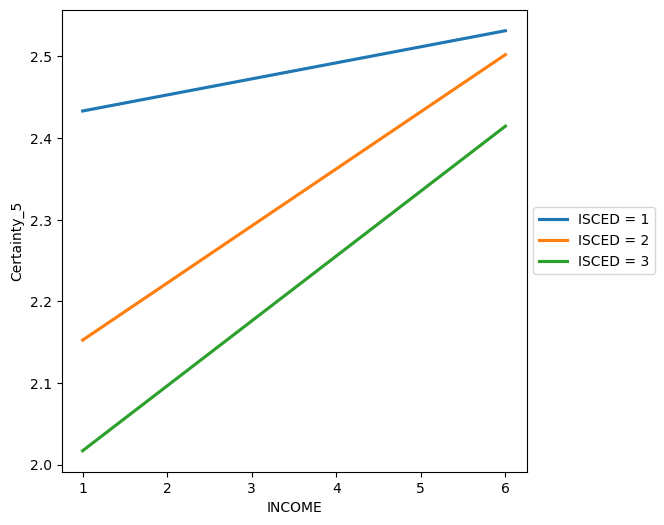

In [53]:
# Trend line for Absolute Certainty Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_5', xlabel='INCOME')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

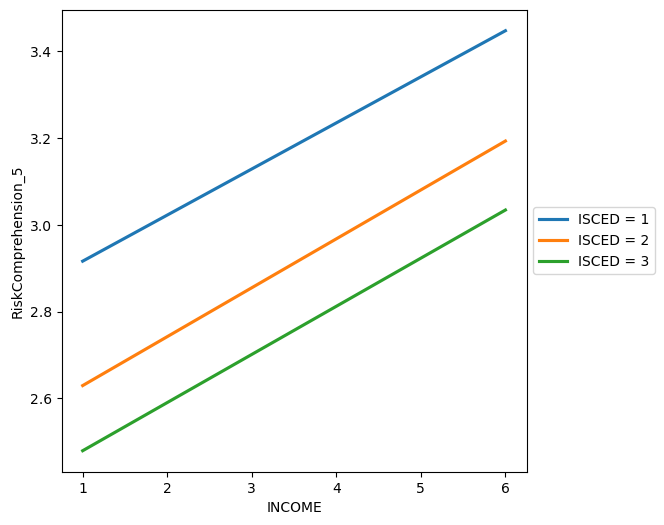

In [54]:
# Trend line for Absolute Risk Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_5', xlabel='INCOME')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

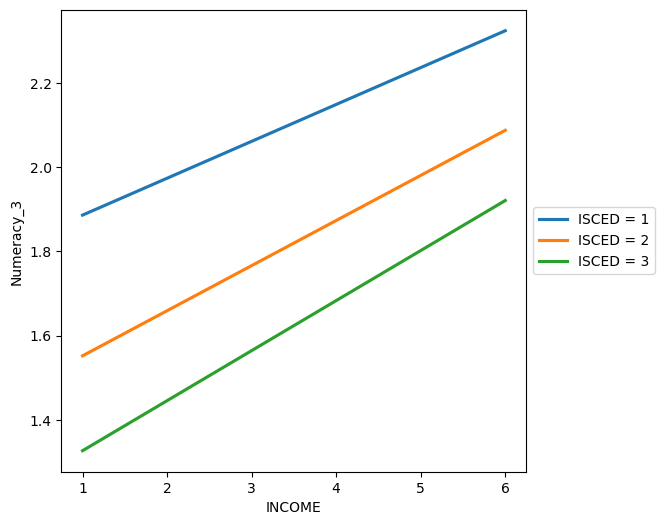

In [55]:
# Trend line for Absolute Number Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_3', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

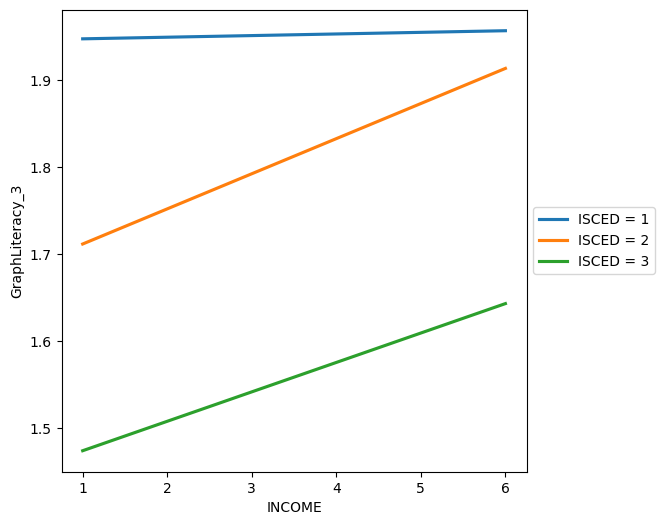

In [56]:
# Trend line for Absolute Graph Comprehension Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='INCOME')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

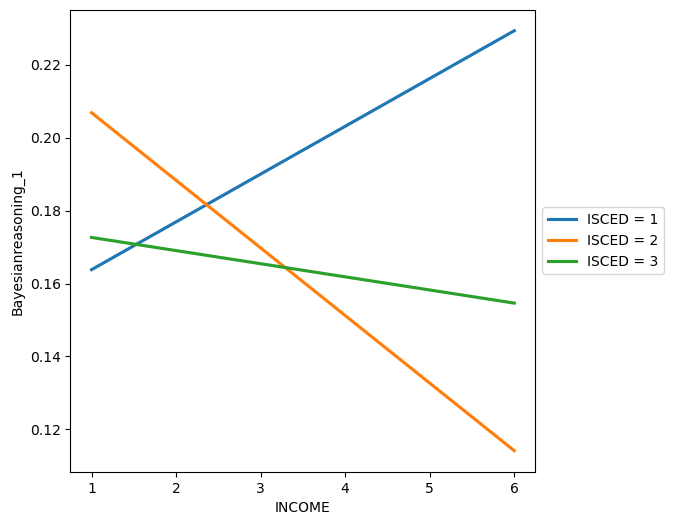

In [57]:
# Trend line for Absolute Bayesian Reasoning Score vs income reponses sorted by isced and ORDERED by income WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[df7['isced']==1].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==2].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[df7['isced']==3].reset_index(drop = True), x = 'income', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='INCOME')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

### INCOME vs SCORES w/ ISCED and AGE based classification 

In [58]:
df7

ResponseId   age  age_rec  isced  income    wealth  Certainty_5  \
0              1  36.0        3      1     3.0   20000.0            5   
1           5753  59.0        3      1     5.0  350000.0            3   
2           5758  73.0        4      1     3.0  450000.0            1   
3           5762  29.0        2      1     2.0   25000.0            2   
4           5765  38.0        3      1     5.0  100000.0            3   
...          ...   ...      ...    ...     ...       ...          ...   
2141        6273  67.0        4      3     2.0  140000.0            1   
2142        6297  65.0        4      3     2.0       0.0            3   
2143        6307  61.0        4      3     6.0  340000.0            1   
2144        6173  69.0        4      3     4.0    1000.0            3   
2145       15861  32.0        2      3     1.0     309.0            2   

      Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_3  \
0                 2                    3                3           3   
1                 0                    1                2           3   
2                 1                    4                2           3   
3                 2                    4                1           3   
4                 1                    1                2           3   
...             ...                  ...              ...         ...   
2141              0                    4                2           3   
2142              1                    1                0           1   
2143              1                    5                2           2   
2144              1                    3                3           1   
2145              1                    3                1           0   

      Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
0                       1        100.0          100.0                 60.0   
1                       0         60.0            0.0                 20.0   
2                       0         20.0           50.0                 80.0   
3                       1         40.0          100.0                 80.0   
4                       1         60.0           50.0                 20.0   
...                   ...          ...            ...                  ...   
2141                    0         20.0            0.0                 80.0   
2142                    0         60.0           50.0                 20.0   
2143                    0         20.0           50.0                100.0   
2144                    0         60.0           50.0                 60.0   
2145                    0         40.0           50.0                 60.0   

      GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_19  \
0          100.000000  100.000000                100.0             17   
1           66.666667  100.000000                  0.0              9   
2           66.666667  100.000000                  0.0             11   
3           33.333333  100.000000                100.0             13   
4           66.666667  100.000000                100.0             11   
...               ...         ...                  ...            ...   
2141        66.666667  100.000000                  0.0             10   
2142         0.000000   33.333333                  0.0              6   
2143        66.666667   66.666667                  0.0             11   
2144       100.000000   33.333333                  0.0             11   
2145        33.333333    0.000000                  0.0              7   

      TotalScore_%  
0        89.473684  
1        47.368421  
2        57.894737  
3        68.421053  
4        57.894737  
...            ...  
2141     52.631579  
2142     31.578947  
2143     57.894737  
2144     57.894737  
2145     36.842105  

[2146 rows x 20 columns]

In [59]:
# Since we already have a classification for Age groups in the form of age_rec, we will use that.
# We will also use median of age to see if it yields any relevant results, as instructed.

# AXES to be used = Age or age groups, ISCED, Income

# Age groups = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 59 y/o
# Age group 4 = 60 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)



In [60]:
df7.loc[(df7['age_rec']==2)].describe()

ResponseId         age  age_rec       isced      income  \
count    585.000000  585.000000    585.0  585.000000  585.000000   
mean    6887.452991   28.384615      2.0    1.757265    2.878632   
std     4359.643357    4.910581      0.0    0.699231    1.568298   
min       24.000000   18.000000      2.0    1.000000    1.000000   
25%     2417.000000   25.000000      2.0    1.000000    2.000000   
50%     6923.000000   30.000000      2.0    2.000000    3.000000   
75%    10389.000000   33.000000      2.0    2.000000    4.000000   
max    15861.000000   35.000000      2.0    3.000000    6.000000   

             wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
count  5.850000e+02   585.000000     585.000000           585.000000   
mean   1.738593e+05     2.473504       0.656410             2.841026   
std    4.801262e+05     1.395835       0.677347             1.257999   
min    0.000000e+00     0.000000       0.000000             0.000000   
25%    1.000000e+03     1.000000       0.000000             2.000000   
50%    2.000000e+04     2.000000       1.000000             3.000000   
75%    1.400000e+05     3.000000       1.000000             4.000000   
max    5.000000e+06     5.000000       2.000000             5.000000   

       GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  Certainty_%  \
count       585.000000  585.000000           585.000000   585.000000   
mean          1.666667    1.675214             0.191453    49.470085   
std           1.043571    1.107486             0.393781    27.916697   
min           0.000000    0.000000             0.000000     0.000000   
25%           1.000000    1.000000             0.000000    20.000000   
50%           2.000000    2.000000             0.000000    40.000000   
75%           3.000000    3.000000             0.000000    60.000000   
max           3.000000    3.000000             1.000000   100.000000   

       Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count     585.000000           585.000000       585.000000  585.000000   
mean       32.820513            56.820513        55.555556   55.840456   
std        33.867342            25.159973        34.785711   36.916196   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000            40.000000        33.333333   33.333333   
50%        50.000000            60.000000        66.666667   66.666667   
75%        50.000000            80.000000       100.000000  100.000000   
max       100.000000           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_19  TotalScore_%  
count           585.000000     585.000000    585.000000  
mean             19.145299       9.504274     50.022492  
std              39.378142       3.556838     18.720199  
min               0.000000       1.000000      5.263158  
25%               0.000000       7.000000     36.842105  
50%               0.000000      10.000000     52.631579  
75%               0.000000      12.000000     63.157895  
max             100.000000      19.000000    100.000000

In [61]:
df7.loc[(df7['age_rec']==3)].describe()

ResponseId         age  age_rec       isced      income  \
count    945.000000  945.000000    945.0  945.000000  945.000000   
mean    4738.231746   48.552381      3.0    1.868783    2.939683   
std     3865.743400    6.930776      0.0    0.721734    1.600967   
min        1.000000   36.000000      3.0    1.000000    1.000000   
25%      988.000000   43.000000      3.0    1.000000    2.000000   
50%     3137.000000   49.000000      3.0    2.000000    3.000000   
75%     8515.000000   55.000000      3.0    2.000000    4.000000   
max    15573.000000   59.000000      3.0    3.000000    6.000000   

             wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
count  9.450000e+02   945.000000     945.000000           945.000000   
mean   2.199448e+05     2.328042       0.762963             2.977778   
std    4.909925e+05     1.326996       0.653303             1.185422   
min    0.000000e+00     0.000000       0.000000             0.000000   
25%    3.000000e+03     1.000000       0.000000             2.000000   
50%    4.000000e+04     2.000000       1.000000             3.000000   
75%    2.000000e+05     3.000000       1.000000             4.000000   
max    4.500000e+06     5.000000       2.000000             5.000000   

       GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  Certainty_%  \
count       945.000000  945.000000           945.000000   945.000000   
mean          1.848677    1.849735             0.180952    46.560847   
std           0.970628    1.020272             0.385183    26.539919   
min           0.000000    0.000000             0.000000     0.000000   
25%           1.000000    1.000000             0.000000    20.000000   
50%           2.000000    2.000000             0.000000    40.000000   
75%           3.000000    3.000000             0.000000    60.000000   
max           3.000000    3.000000             1.000000   100.000000   

       Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count     945.000000           945.000000       945.000000  945.000000   
mean       38.148148            59.555556        61.622575   61.657848   
std        32.665149            23.708446        32.354281   34.009083   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000            40.000000        33.333333   33.333333   
50%        50.000000            60.000000        66.666667   66.666667   
75%        50.000000            80.000000       100.000000  100.000000   
max       100.000000           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_19  TotalScore_%  
count           945.000000     945.000000    945.000000  
mean             18.095238       9.948148     52.358674  
std              38.518258       3.281700     17.272105  
min               0.000000       2.000000     10.526316  
25%               0.000000       8.000000     42.105263  
50%               0.000000      10.000000     52.631579  
75%               0.000000      12.000000     63.157895  
max             100.000000      19.000000    100.000000

In [62]:
df7.loc[(df7['age_rec']==4)].describe()

ResponseId         age  age_rec       isced      income  \
count    616.000000  616.000000    616.0  616.000000  616.000000   
mean    5274.581169   65.663961      4.0    2.040584    2.774351   
std     4129.966956    4.165175      0.0    0.769315    1.490149   
min        2.000000   60.000000      4.0    1.000000    1.000000   
25%     1448.750000   62.000000      4.0    1.000000    2.000000   
50%     5405.500000   65.000000      4.0    2.000000    3.000000   
75%     8610.250000   69.000000      4.0    3.000000    4.000000   
max    14419.000000   75.000000      4.0    3.000000    6.000000   

             wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
count  6.160000e+02   616.000000     616.000000           616.000000   
mean   2.964819e+05     2.120130       0.806818             2.827922   
std    6.292273e+05     1.096269       0.608893             1.242709   
min    0.000000e+00     0.000000       0.000000             0.000000   
25%    5.000000e+03     1.000000       0.000000             2.000000   
50%    6.000000e+04     2.000000       1.000000             3.000000   
75%    3.000000e+05     3.000000       1.000000             4.000000   
max    5.000000e+06     5.000000       2.000000             5.000000   

       GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  Certainty_%  \
count       616.000000  616.000000           616.000000   616.000000   
mean          1.780844    1.847403             0.170455    42.402597   
std           0.985599    0.998907             0.376337    21.925378   
min           0.000000    0.000000             0.000000     0.000000   
25%           1.000000    1.000000             0.000000    20.000000   
50%           2.000000    2.000000             0.000000    40.000000   
75%           3.000000    3.000000             0.000000    60.000000   
max           3.000000    3.000000             1.000000   100.000000   

       Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count     616.000000           616.000000       616.000000  616.000000   
mean       40.340909            56.558442        59.361472   61.580087   
std        30.444629            24.854173        32.853290   33.296886   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000            40.000000        33.333333   33.333333   
50%        50.000000            60.000000        66.666667   66.666667   
75%        50.000000            80.000000       100.000000  100.000000   
max       100.000000           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_19  TotalScore_%  
count           616.000000     616.000000    616.000000  
mean             17.045455       9.553571     50.281955  
std              37.633723       3.054580     16.076737  
min               0.000000       1.000000      5.263158  
25%               0.000000       7.000000     36.842105  
50%               0.000000       9.000000     47.368421  
75%               0.000000      12.000000     63.157895  
max             100.000000      18.000000     94.736842

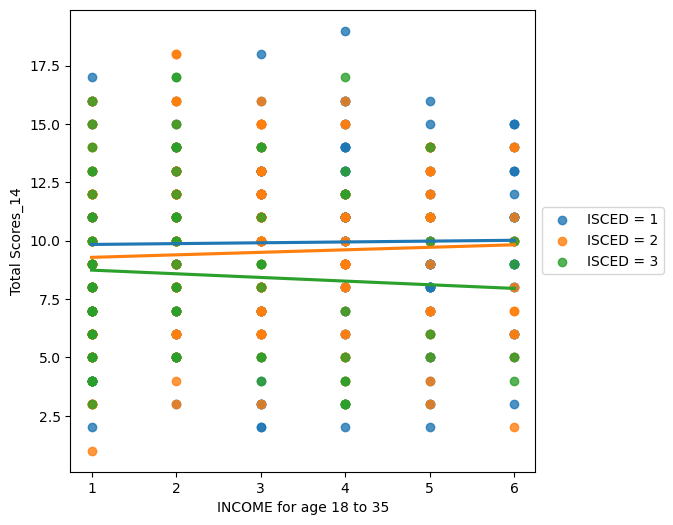

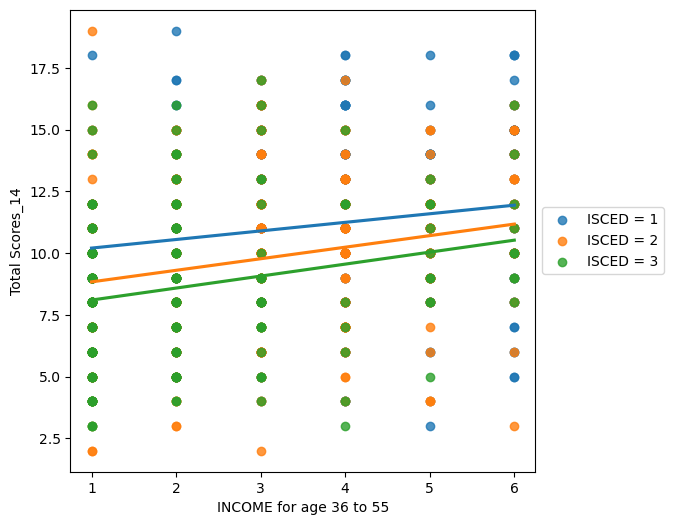

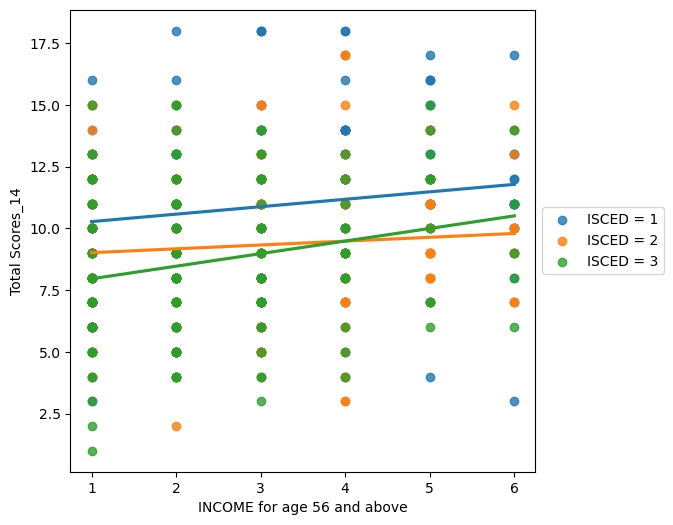

In [63]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_14', xlabel='INCOME for age 18 to 35')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='INCOME for age 36 to 55')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='INCOME for age 56 and above')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

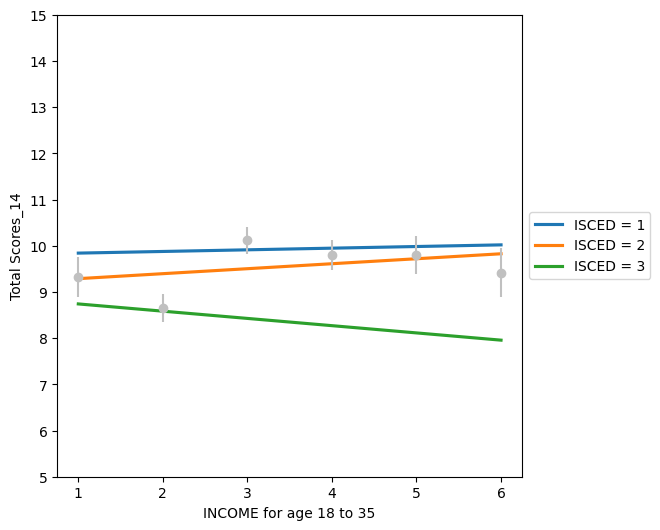

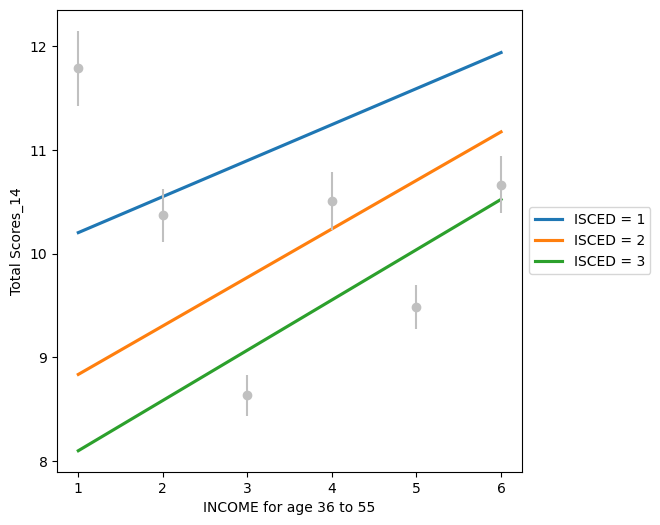

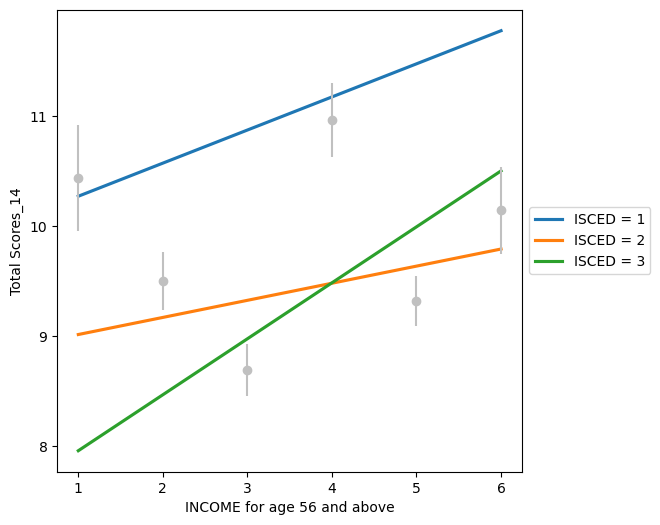

In [64]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income']).mean(numeric_only=True)['TotalScore_19'], yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['TotalScore_19'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_14', xlabel='INCOME for age 18 to 35',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='INCOME for age 36 to 55',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income']).mean(numeric_only=True)['TotalScore_19'], yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['TotalScore_19'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='INCOME for age 56 and above',  yticks = np.arange(5, 16 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income']).mean(numeric_only=True)['TotalScore_19'], yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['TotalScore_19'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

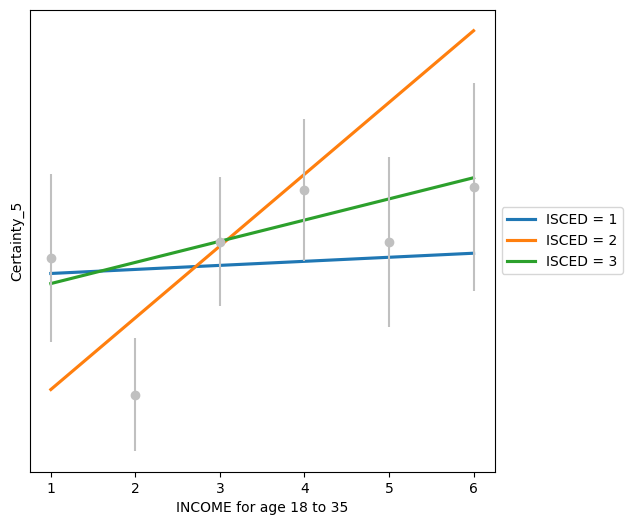

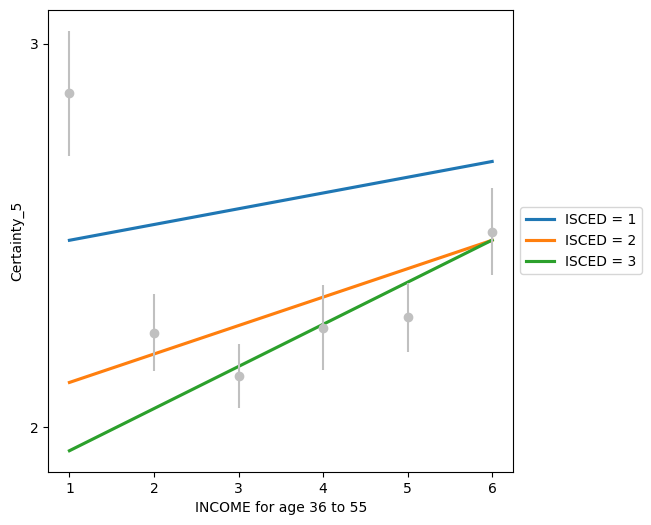

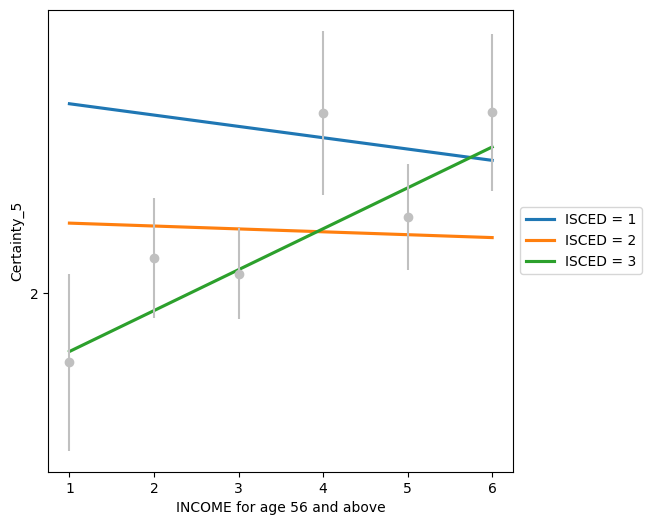

In [65]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Certainty_5', xlabel='INCOME for age 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Certainty_5'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Certainty_5', xlabel='INCOME for age 36 to 55',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Certainty_5'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Certainty_5', xlabel='INCOME for age 56 and above',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Certainty_5'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

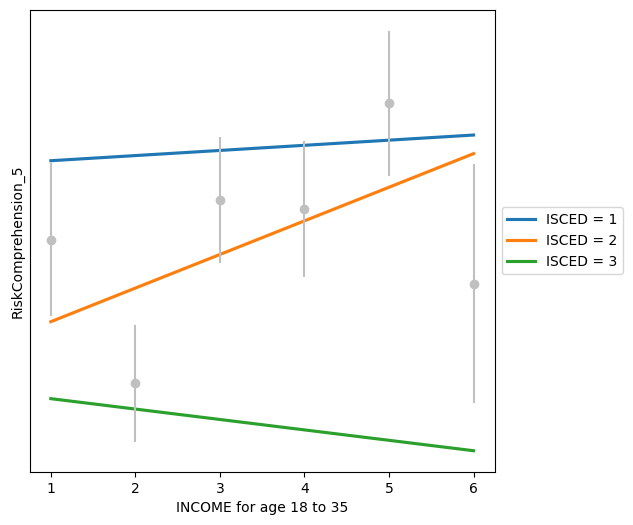

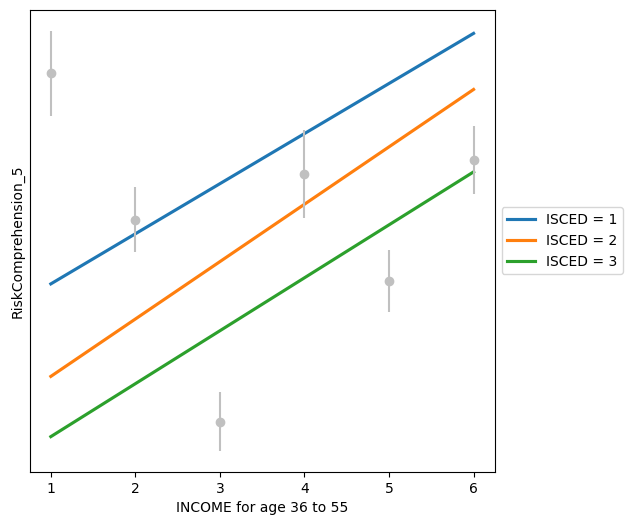

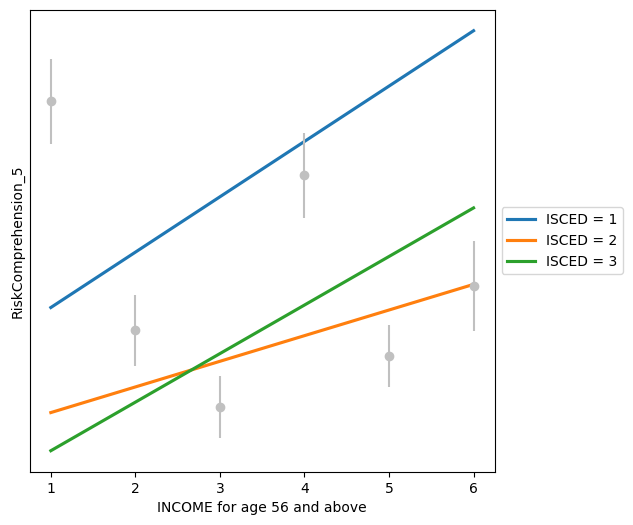

In [66]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='RiskComprehension_5', xlabel='INCOME for age 18 to 35',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['RiskComprehension_5'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='RiskComprehension_5', xlabel='INCOME for age 36 to 55',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['RiskComprehension_5'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='RiskComprehension_5', xlabel='INCOME for age 56 and above',  yticks = np.arange(0, 3 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['RiskComprehension_5'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

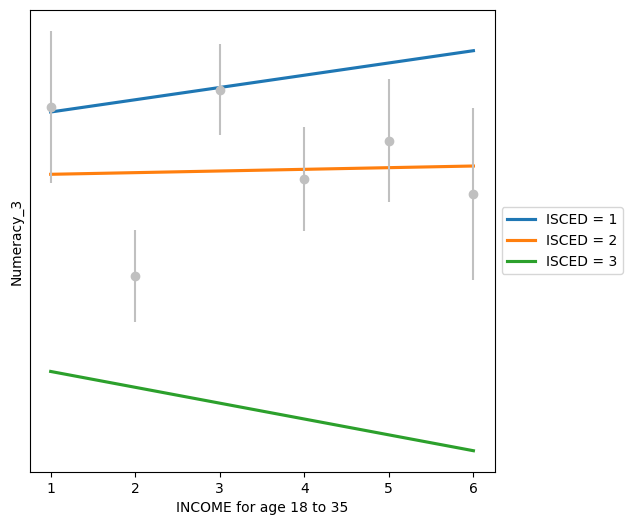

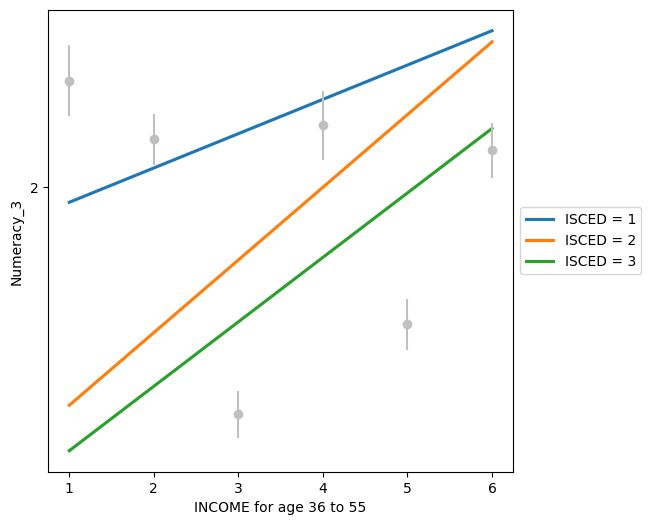

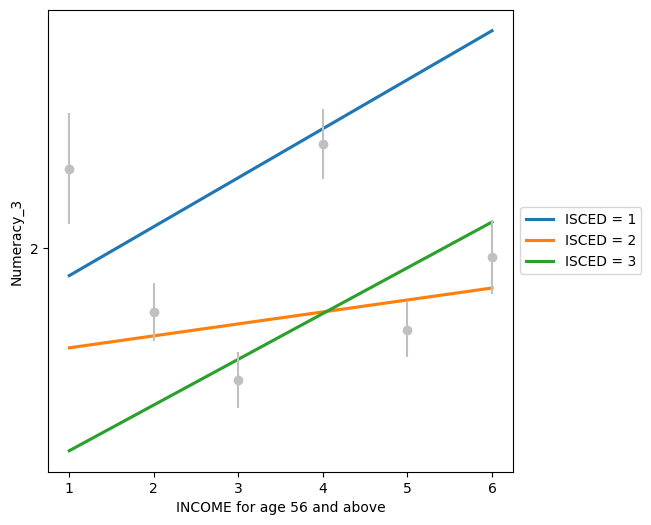

In [67]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Numeracy_3', xlabel='INCOME for age 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Numeracy_3', xlabel='INCOME for age 36 to 55',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Numeracy_3', xlabel='INCOME for age 56 and above',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

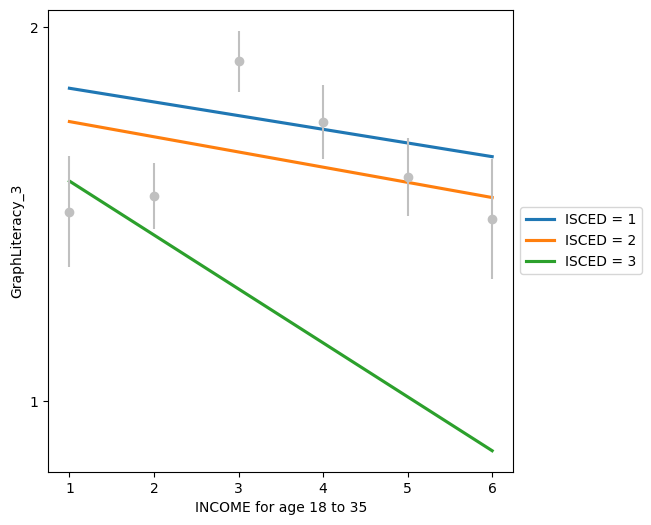

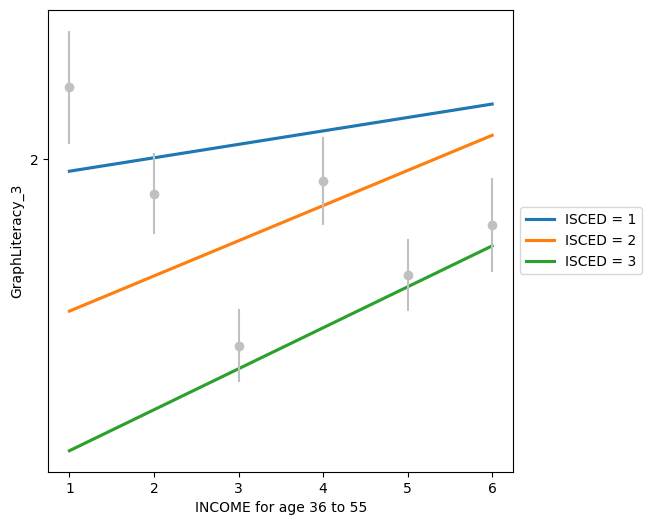

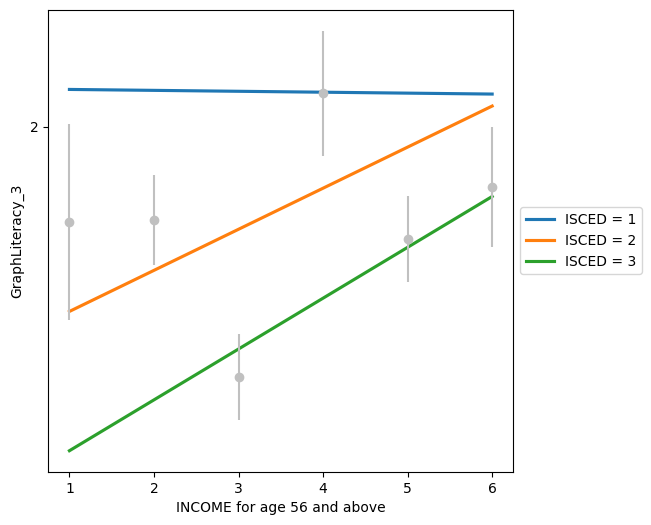

In [68]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='GraphLiteracy_3', xlabel='INCOME for age 18 to 35',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='GraphLiteracy_3', xlabel='INCOME for age 36 to 55',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='GraphLiteracy_3', xlabel='INCOME for age 56 and above',  yticks = np.arange(0, 4 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

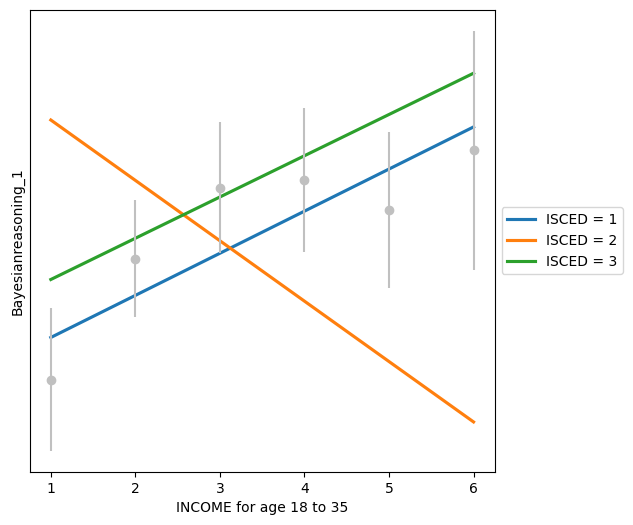

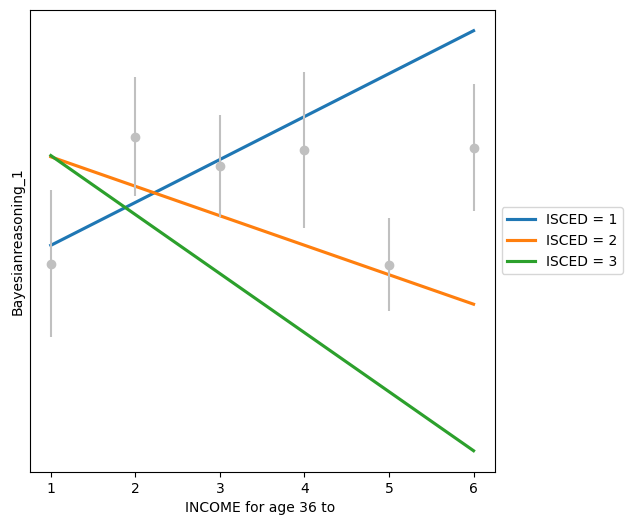

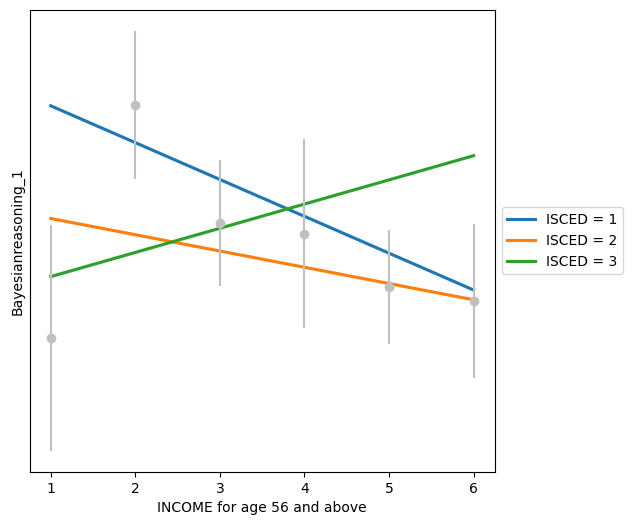

In [69]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==2) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for age 18 to 35',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df7.loc[ df7['age_rec']==2  ]["income"].unique(), y = df7.loc[ df7['age_rec']==2  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==2) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==3) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for age 36 to ',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df7.loc[ df7['age_rec']==3  ]["income"].unique(), y = df7.loc[ df7['age_rec']==3  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==3) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age_rec']==4) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for age 56 and above',  yticks = np.arange(0, 5 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df7.loc[ df7['age_rec']== 4 ]['income'].unique(), y = df7.loc[ df7['age_rec']==4  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age_rec']==4) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [70]:
# Age mean method
# Age_mean

In [71]:
age_m = df2["age"].median()
age_m

49.0

In [72]:
df7["income"].value_counts()

income
1.0    517
2.0    499
3.0    418
4.0    320
5.0    230
6.0    162
Name: count, dtype: int64

In [73]:
df7.loc[(df7['age'] < age_m)].describe()

ResponseId          age      age_rec        isced      income  \
count   1044.000000  1044.000000  1044.000000  1044.000000  1044.00000   
mean    5925.962644    34.547893     2.439655     1.781609     2.91092   
std     4272.387694     8.245898     0.496583     0.707586     1.57908   
min        1.000000    18.000000     2.000000     1.000000     1.00000   
25%     1643.250000    29.000000     2.000000     1.000000     2.00000   
50%     5859.500000    34.000000     2.000000     2.000000     3.00000   
75%     9653.250000    42.000000     3.000000     2.000000     4.00000   
max    15861.000000    48.000000     3.000000     3.000000     6.00000   

             wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
count  1.044000e+03  1044.000000    1044.000000          1044.000000   
mean   1.803928e+05     2.467433       0.691571             2.918582   
std    4.406411e+05     1.396439       0.664600             1.233163   
min    0.000000e+00     0.000000       0.000000             0.000000   
25%    1.387500e+03     1.000000       0.000000             2.000000   
50%    2.500000e+04     2.000000       1.000000             3.000000   
75%    1.600000e+05     3.000000       1.000000             4.000000   
max    5.000000e+06     5.000000       2.000000             5.000000   

       GraphLiteracy_3   Numeracy_3  Bayesianreasoning_1  Certainty_%  \
count      1044.000000  1044.000000          1044.000000  1044.000000   
mean          1.766284     1.789272             0.193487    49.348659   
std           1.019923     1.065289             0.395220    27.928773   
min           0.000000     0.000000             0.000000     0.000000   
25%           1.000000     1.000000             0.000000    20.000000   
50%           2.000000     2.000000             0.000000    40.000000   
75%           3.000000     3.000000             0.000000    60.000000   
max           3.000000     3.000000             1.000000   100.000000   

       Uncertainty_%  RiskComprehension_%  GraphLiteracy_%   Numeracy_%  \
count    1044.000000          1044.000000      1044.000000  1044.000000   
mean       34.578544            58.371648        58.876117    59.642401   
std        33.229995            24.663251        33.997430    35.509649   
min         0.000000             0.000000         0.000000     0.000000   
25%         0.000000            40.000000        33.333333    33.333333   
50%        50.000000            60.000000        66.666667    66.666667   
75%        50.000000            80.000000       100.000000   100.000000   
max       100.000000           100.000000       100.000000   100.000000   

       Bayesianreasoning_%  TotalScore_19  TotalScore_%  
count          1044.000000    1044.000000   1044.000000  
mean             19.348659       9.826628     51.719097  
std              39.522038       3.485296     18.343662  
min               0.000000       1.000000      5.263158  
25%               0.000000       7.000000     36.842105  
50%               0.000000      10.000000     52.631579  
75%               0.000000      12.000000     63.157895  
max             100.000000      19.000000    100.000000

In [74]:
df7.loc[(df7['age'] >= age_m)].describe()

ResponseId          age      age_rec        isced       income  \
count   1102.000000  1102.000000  1102.000000  1102.000000  1102.000000   
mean    5053.744102    60.678766     3.558984     1.988203     2.842105   
std     4038.357029     6.785027     0.496734     0.750928     1.545121   
min        2.000000    49.000000     3.000000     1.000000     1.000000   
25%     1271.500000    55.000000     3.000000     1.000000     2.000000   
50%     3147.000000    60.500000     4.000000     2.000000     3.000000   
75%     8604.000000    66.000000     4.000000     3.000000     4.000000   
max    15573.000000    75.000000     4.000000     3.000000     6.000000   

             wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
count  1.102000e+03  1102.000000    1102.000000          1102.000000   
mean   2.757335e+05     2.156987       0.798548             2.877495   
std    6.049802e+05     1.164039       0.631649             1.214678   
min    0.000000e+00     0.000000       0.000000             0.000000   
25%    5.000000e+03     1.000000       0.000000             2.000000   
50%    5.000000e+04     2.000000       1.000000             3.000000   
75%    2.500000e+05     3.000000       1.000000             4.000000   
max    5.000000e+06     5.000000       2.000000             5.000000   

       GraphLiteracy_3   Numeracy_3  Bayesianreasoning_1  Certainty_%  \
count      1102.000000  1102.000000          1102.000000  1102.000000   
mean          1.792196     1.813067             0.168784    43.139746   
std           0.976292     1.018223             0.374731    23.280786   
min           0.000000     0.000000             0.000000     0.000000   
25%           1.000000     1.000000             0.000000    20.000000   
50%           2.000000     2.000000             0.000000    40.000000   
75%           3.000000     3.000000             0.000000    60.000000   
max           3.000000     3.000000             1.000000   100.000000   

       Uncertainty_%  RiskComprehension_%  GraphLiteracy_%   Numeracy_%  \
count    1102.000000          1102.000000      1102.000000  1102.000000   
mean       39.927405            57.549909        59.739867    60.435572   
std        31.582457            24.293557        32.543052    33.940754   
min         0.000000             0.000000         0.000000     0.000000   
25%         0.000000            40.000000        33.333333    33.333333   
50%        50.000000            60.000000        66.666667    66.666667   
75%        50.000000            80.000000       100.000000   100.000000   
max       100.000000           100.000000       100.000000   100.000000   

       Bayesianreasoning_%  TotalScore_19  TotalScore_%  
count          1102.000000    1102.000000   1102.000000  
mean             16.878403       9.607078     50.563569  
std              37.473111       3.116110     16.400578  
min               0.000000       1.000000      5.263158  
25%               0.000000       7.000000     36.842105  
50%               0.000000       9.000000     47.368421  
75%               0.000000      12.000000     63.157895  
max             100.000000      19.000000    100.000000

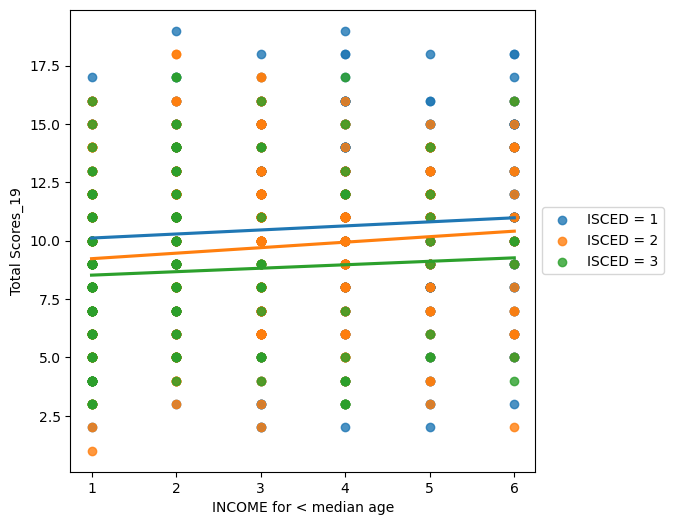

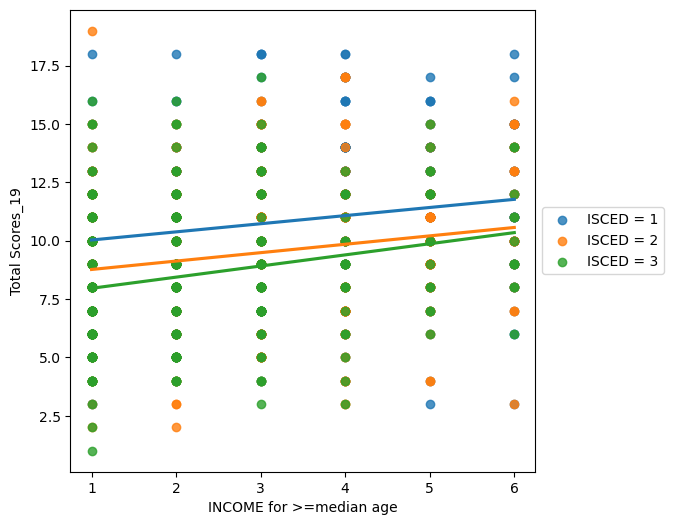

In [75]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df7.loc[(df7['age'] >= age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_19', xlabel='INCOME for >=median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

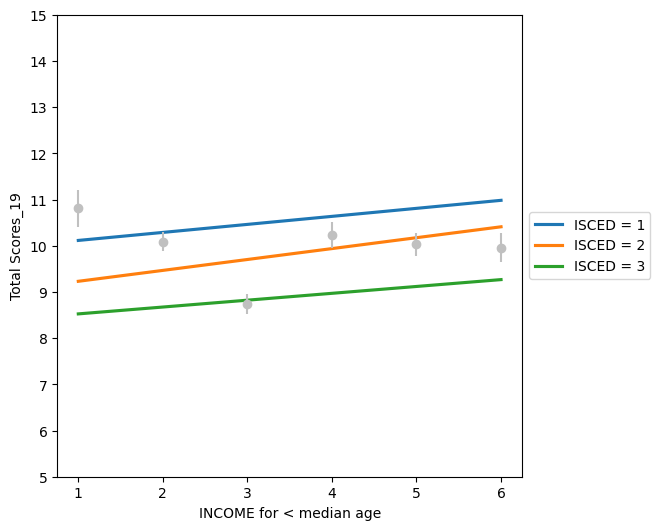

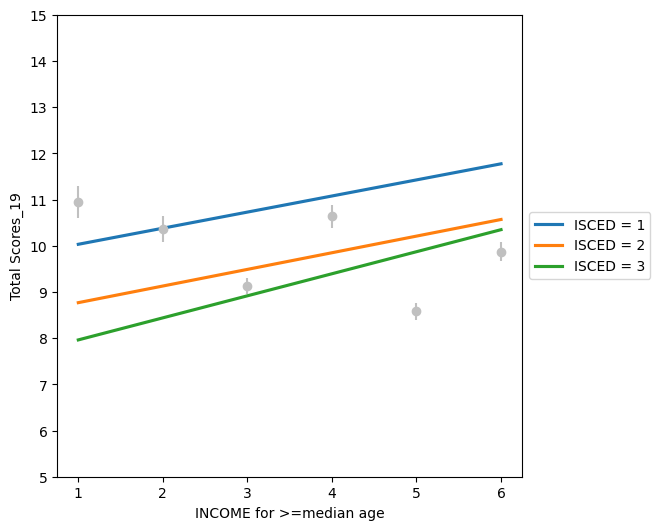

In [76]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['TotalScore_19'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['TotalScore_19'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_19', xlabel='INCOME for < median age',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['TotalScore_19'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['TotalScore_19'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Total Scores_19', xlabel='INCOME for >=median age',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

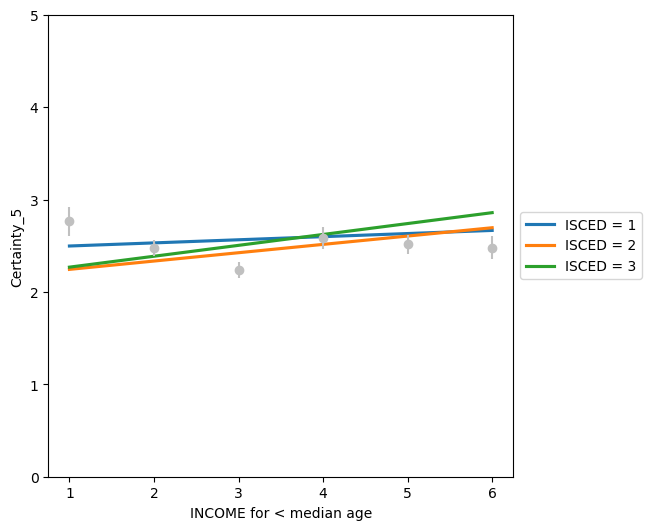

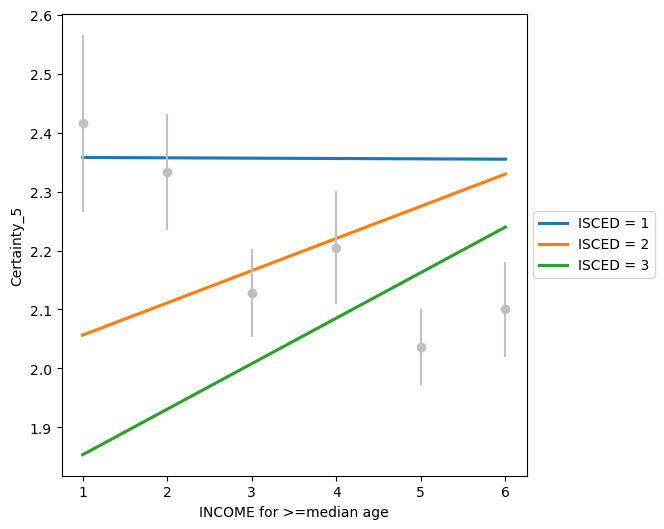

In [77]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Certainty_5'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Certainty_5', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['Certainty_5'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Certainty_5', xlabel='INCOME for >=median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

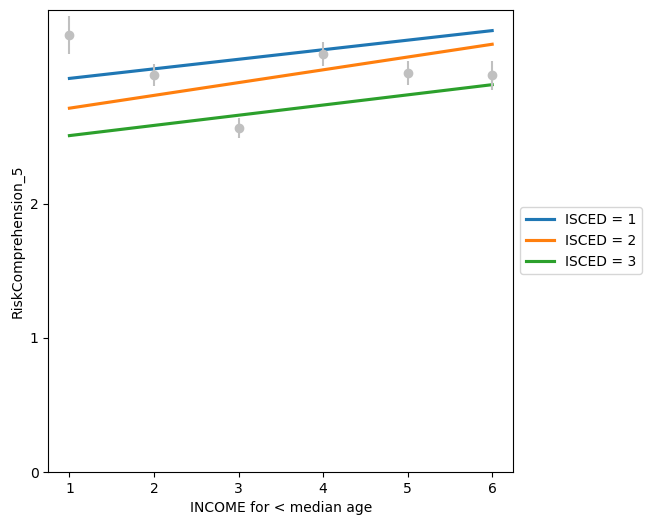

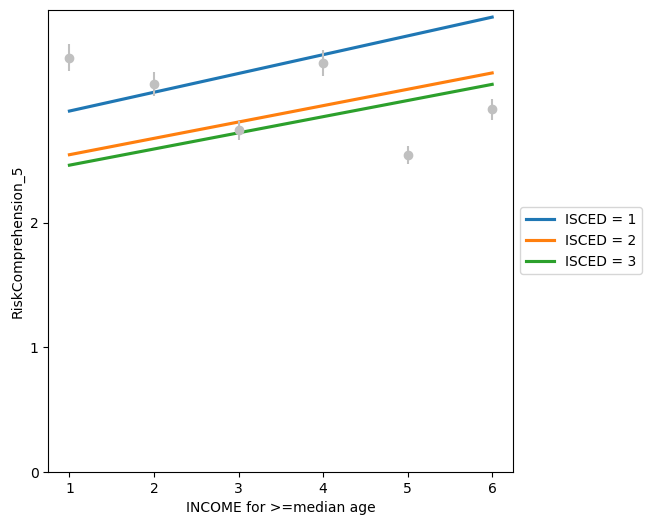

In [78]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['RiskComprehension_5'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='RiskComprehension_5', xlabel='INCOME for < median age',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['RiskComprehension_5'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='RiskComprehension_5', xlabel='INCOME for >=median age',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

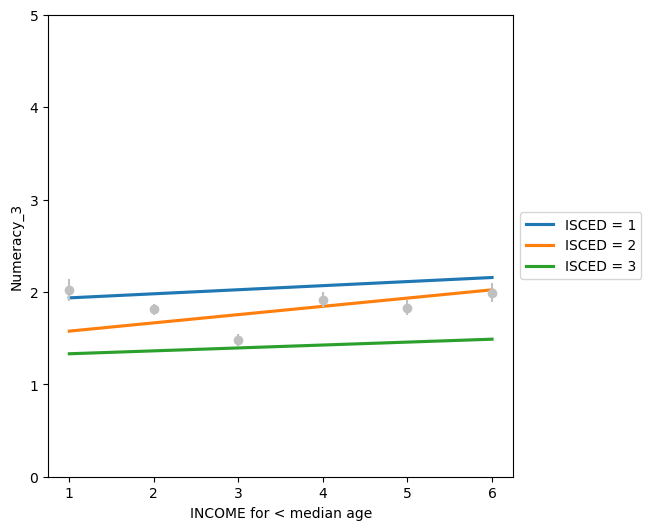

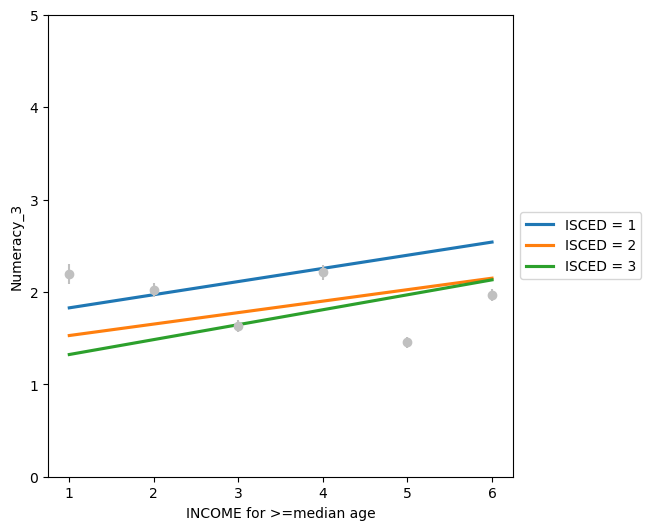

In [79]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Numeracy_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['Numeracy_3'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Numeracy_3', xlabel='INCOME for >=median age',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

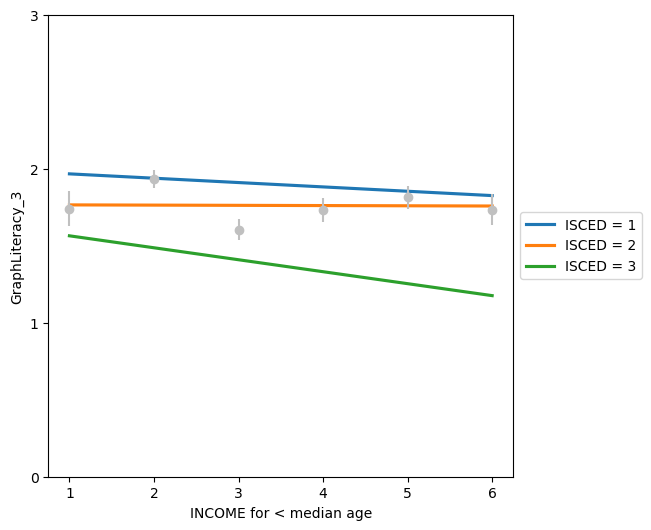

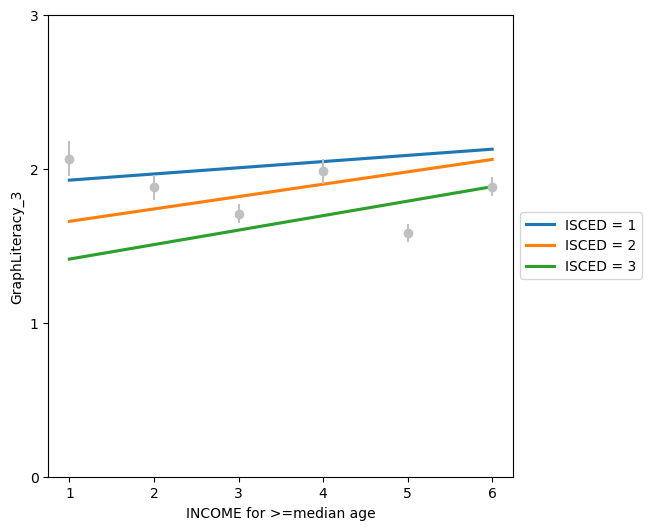

In [80]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='GraphLiteracy_3', xlabel='INCOME for < median age',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['GraphLiteracy_3'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='GraphLiteracy_3', xlabel='INCOME for >=median age',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

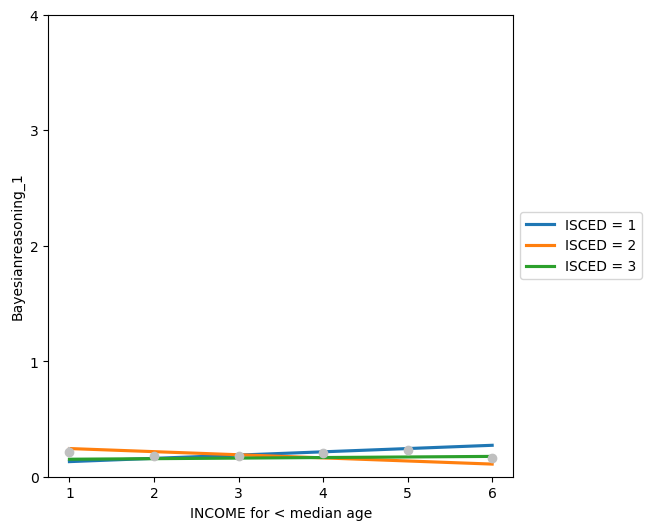

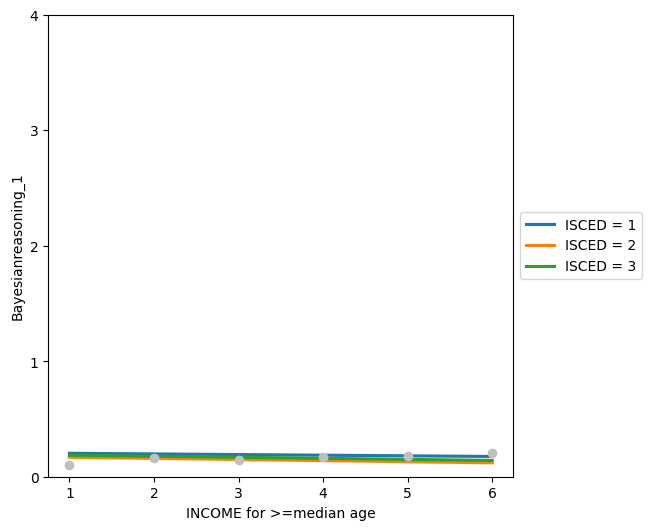

In [81]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] < age_m) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df7.loc[ (df7['age'] < age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] < age_m)  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age'] < age_m) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for < median age',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)].reset_index(drop = True), x = 'income', y = df7.loc[(df7['age'] >=age_m) & (df7['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df7.loc[ (df7['age'] >= age_m)  ]["income"].unique(), y = df7.loc[ (df7['age'] >=age_m)  ].groupby(['income'])['Bayesianreasoning_1'].mean(), yerr = df7.loc[ (df7['age'] >=age_m) ].groupby(['income'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Bayesianreasoning_1', xlabel='INCOME for >=median age',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

## WEALTH

In [82]:
# Data Frame 2 or df2 is an aggregate data on facet total scores and over all total score, along with wealth and income data vs each response. 
# This data set is also sorted by wealth with all responses 'NA' removed.
# We also assign quartiles ranking each response according to this sort.

df4 = df2.sort_values(by = 'wealth')
df4 = df4.reset_index(drop = True)
df4 = df4.dropna(axis = 0, subset = 'wealth')
df4.insert(loc = len(df4.columns), column = "Quartile Number", value = pd.qcut(df4["wealth"],q = 4, labels = False ) + 1, allow_duplicates = 'False')

df4

ResponseId   age  age_rec  isced  income     wealth  Certainty_5  \
0           6410  19.0        2      2     2.0        0.0            1   
1           6601  66.0        4      2     2.0        0.0            3   
2           1611  34.0        2      3     1.0        0.0            2   
3           6714  69.0        4      2     2.0        0.0            1   
4           1603  20.0        2      3     4.0        0.0            1   
...          ...   ...      ...    ...     ...        ...          ...   
2141        3160  49.0        3      1     4.0  4500000.0            3   
2142        1519  71.0        4      3     2.0  5000000.0            3   
2143        6471  71.0        4      2     3.0  5000000.0            2   
2144          97  24.0        2      1     4.0  5000000.0            5   
2145         706  28.0        2      3     1.0  5000000.0            5   

      Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_3  \
0                 1                    3                2           3   
1                 1                    2                3           2   
2                 2                    4                3           2   
3                 0                    4                0           0   
4                 1                    1                0           0   
...             ...                  ...              ...         ...   
2141              1                    4                2           2   
2142              1                    4                0           0   
2143              2                    1                2           3   
2144              0                    3                2           0   
2145              2                    4                2           3   

      Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
0                       0         20.0           50.0                 60.0   
1                       0         60.0           50.0                 40.0   
2                       0         40.0          100.0                 80.0   
3                       1         20.0            0.0                 80.0   
4                       0         20.0           50.0                 20.0   
...                   ...          ...            ...                  ...   
2141                    0         60.0           50.0                 80.0   
2142                    0         60.0           50.0                 80.0   
2143                    0         40.0          100.0                 20.0   
2144                    1        100.0            0.0                 60.0   
2145                    0        100.0          100.0                 80.0   

      GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_19  \
0           66.666667  100.000000                  0.0             10   
1          100.000000   66.666667                  0.0             11   
2          100.000000   66.666667                  0.0             13   
3            0.000000    0.000000                100.0              6   
4            0.000000    0.000000                  0.0              3   
...               ...         ...                  ...            ...   
2141        66.666667   66.666667                  0.0             12   
2142         0.000000    0.000000                  0.0              8   
2143        66.666667  100.000000                  0.0             10   
2144        66.666667    0.000000                100.0             11   
2145        66.666667  100.000000                  0.0             16   

      TotalScore_%  Quartile Number  
0        52.631579                1  
1        57.894737                1  
2        68.421053                1  
3        31.578947                1  
4        15.789474                1  
...            ...              ...  
2141     63.157895                4  
2142     42.105263                4  
2143     52.631579                4  
2144     57.894737                4  
2145    

<Axes: ylabel='TotalScore_19'>

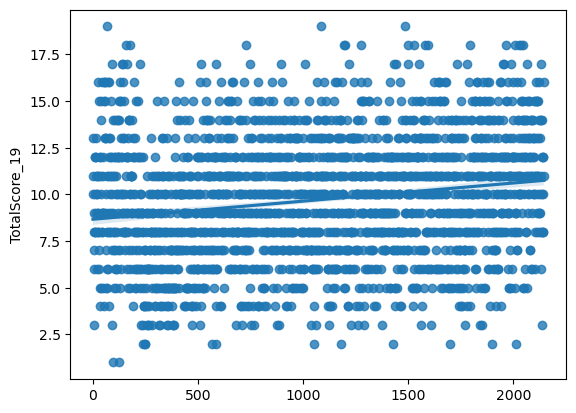

In [83]:
# Trend line for Absolute Total Facet Score vs unique wealth reponses

sns.regplot (data = df4, x = df4.index, y = 'TotalScore_19')

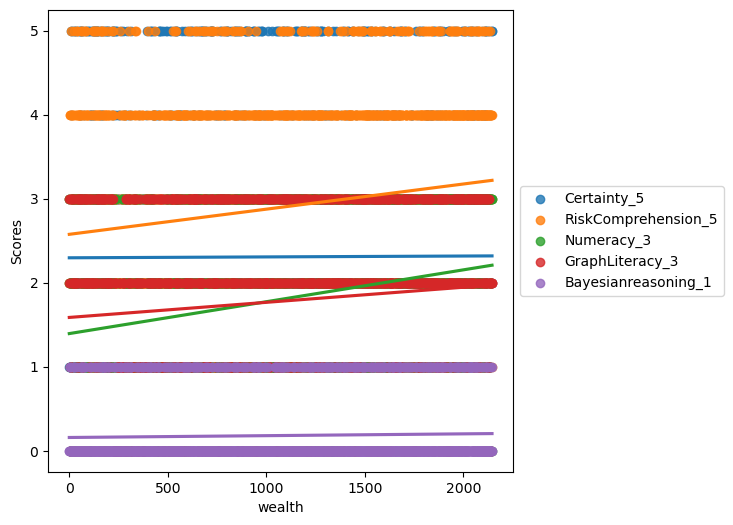

In [84]:
# Trend line for Absolute Independent Facet Score vs wealth reponses

fig1, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = df4.index, y = 'Certainty_5', fit_reg=True, ci=None, ax=ax1, label='Certainty_5')
sns.regplot (data = df4, x = df4.index, y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax1, label='RiskComprehension_5')
sns.regplot (data = df4, x = df4.index, y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax1, label='Numeracy_3')
sns.regplot (data = df4, x = df4.index, y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax1, label='GraphLiteracy_3')
sns.regplot (data = df4, x = df4.index, y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax1, label='Bayesianreasoning_1' )

ax1.set(ylabel='Scores', xlabel='wealth')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [85]:
# Count of number of responses under each quartile

df4.groupby('Quartile Number')[['Quartile Number']].count()

Quartile Number
Quartile Number                 
1                            566
2                            529
3                            536
4                            515

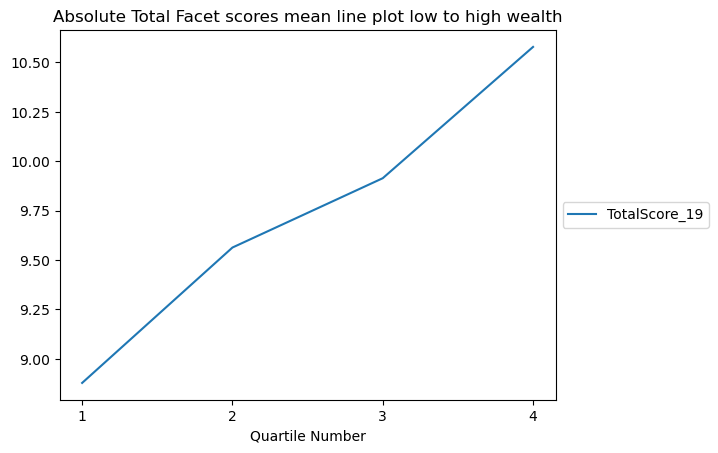

In [86]:
# Absolute Total Facet scores mean line plot from low to high Wealth

df4.groupby('Quartile Number')[['TotalScore_19']].mean().plot( kind = 'line', title = 'Absolute Total Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

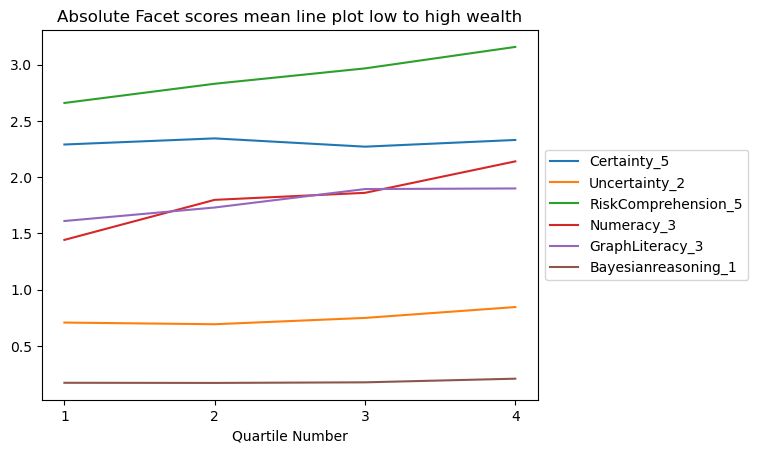

In [87]:
# Absolute Facet scores mean line plot from low to high wealth

df4.groupby('Quartile Number')[['Certainty_5', "Uncertainty_2", 'RiskComprehension_5','Numeracy_3','GraphLiteracy_3','Bayesianreasoning_1']].mean().plot( kind = 'line', title = 'Absolute Facet scores mean line plot low to high wealth', xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

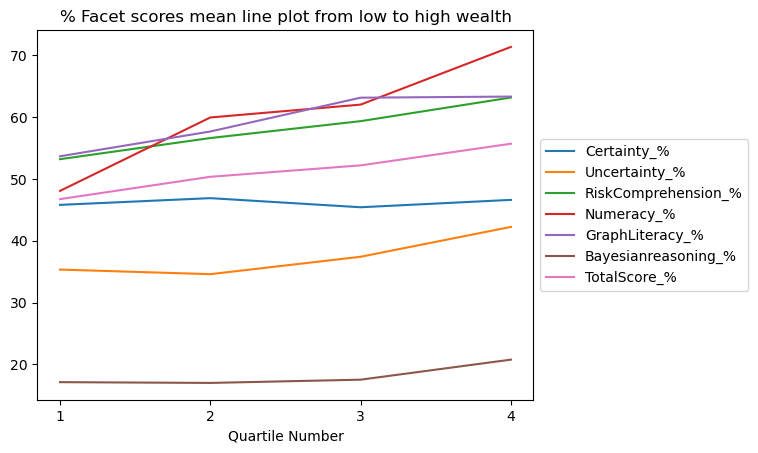

In [88]:
# Normalised Facet scores mean line plot from low to high wealth


df4.groupby('Quartile Number')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().plot( kind = 'line', title = '% Facet scores mean line plot from low to high wealth',  xticks = np.arange(1,5,step = 1)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

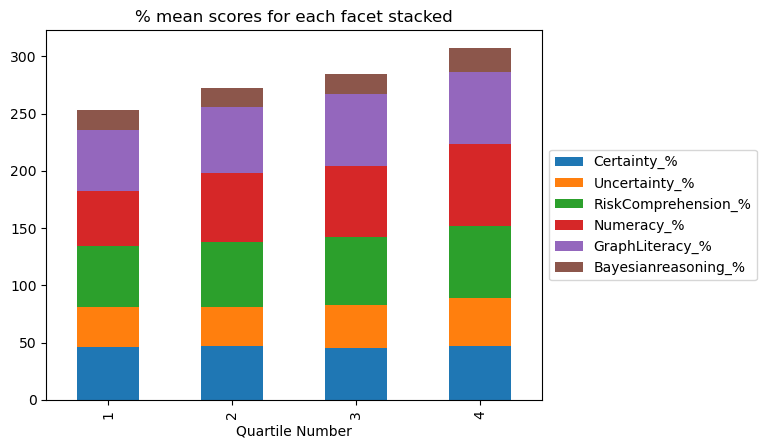

In [89]:
# Normalised mean scores for each facet stacked

df4.groupby('Quartile Number')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%']].mean().plot( kind = 'bar', title = '% mean scores for each facet stacked', stacked = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

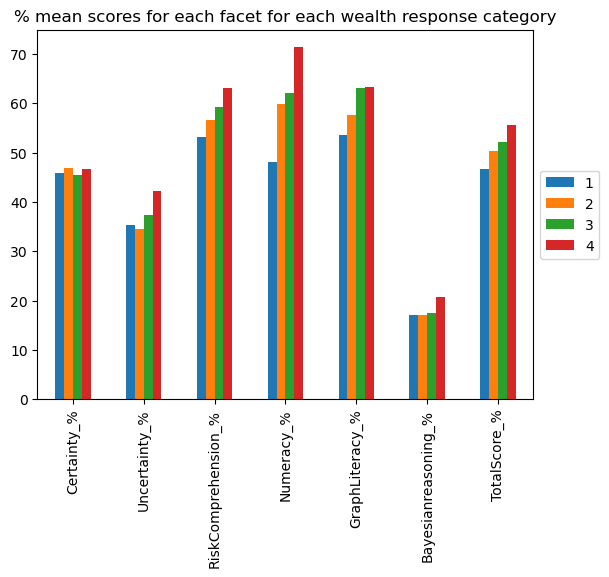

In [90]:
# Normalised mean scores for each facet for each wealth response Quartile

df4.groupby('Quartile Number')[['Certainty_%', "Uncertainty_%", 'RiskComprehension_%','Numeracy_%','GraphLiteracy_%','Bayesianreasoning_%','TotalScore_%']].mean().T.plot(kind = 'bar', title = '% mean scores for each facet for each wealth response category').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='Quartile Number', ylabel='TotalScore_19'>

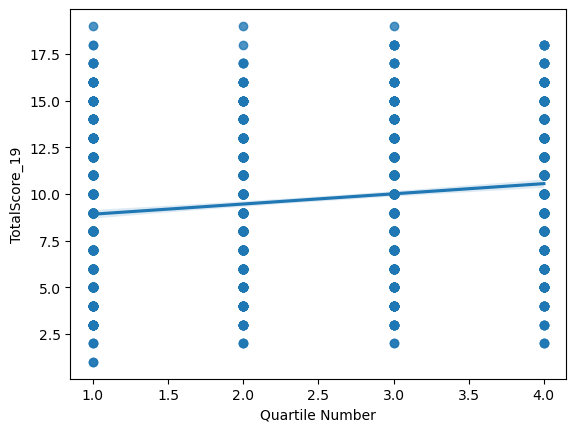

In [91]:
# Trend line for Absolute Total Facet Score vs Quartiles

sns.regplot (data = df4, x = 'Quartile Number', y = 'TotalScore_19')

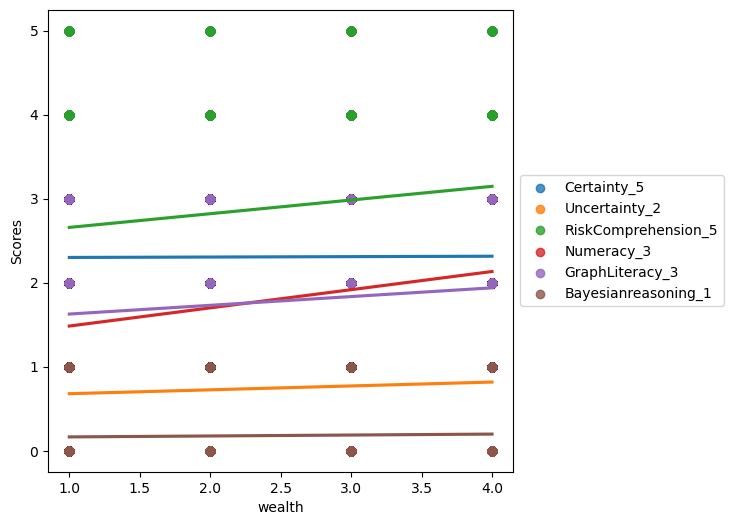

In [92]:
# Trend line for Absolute Independent Facet Score vs Quartiles

fig2, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4, x = 'Quartile Number', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax2, label='Certainty_5')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Uncertainty_2', fit_reg=True, ci=None, ax=ax2, label='Uncertainty_2')
sns.regplot (data = df4, x = 'Quartile Number', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax2, label='RiskComprehension_5')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax2, label='Numeracy_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax2, label='GraphLiteracy_3')
sns.regplot (data = df4, x = 'Quartile Number', y = 'Bayesianreasoning_1',fit_reg=True, ci=None, ax=ax2, label='Bayesianreasoning_1' )

ax2.set(ylabel='Scores', xlabel='wealth')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

<Axes: xlabel='Quartile Number', ylabel='TotalScore_19'>

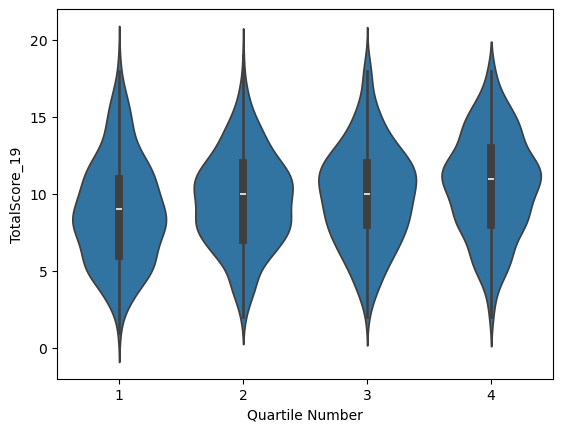

In [93]:
# Violine Plot for TotalScore_19 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'TotalScore_19')

<Axes: xlabel='Quartile Number', ylabel='Certainty_5'>

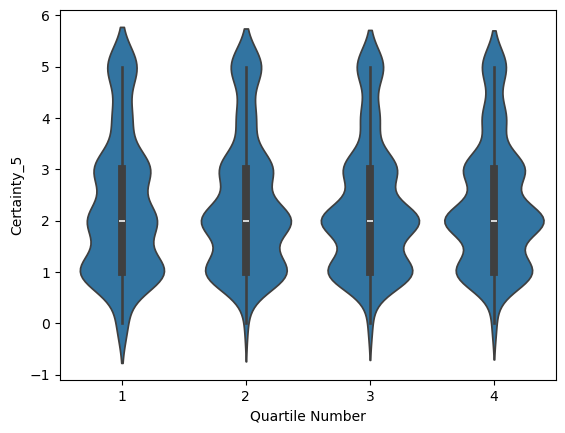

In [94]:
# Violine Plot for Certainty_5 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Certainty_5')

<Axes: xlabel='Quartile Number', ylabel='Uncertainty_2'>

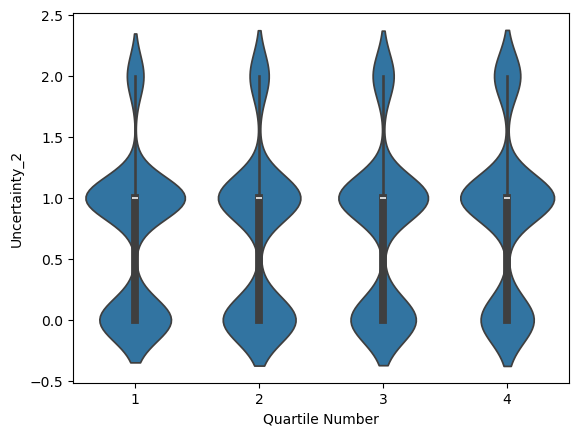

In [95]:
# Violine Plot for Certainty_5 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Uncertainty_2')

<Axes: xlabel='Quartile Number', ylabel='RiskComprehension_5'>

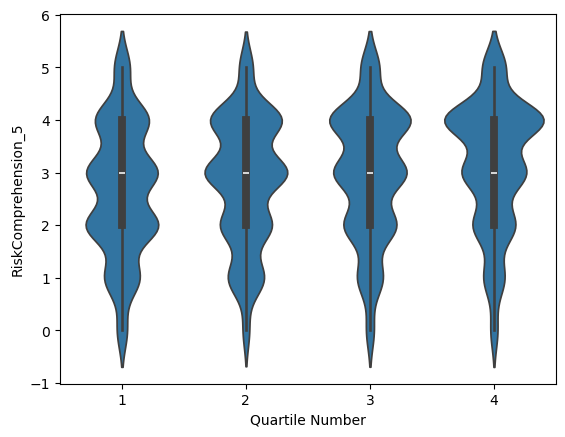

In [96]:
# Violine Plot for RiskComprehension_5 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'RiskComprehension_5')

<Axes: xlabel='Quartile Number', ylabel='GraphLiteracy_3'>

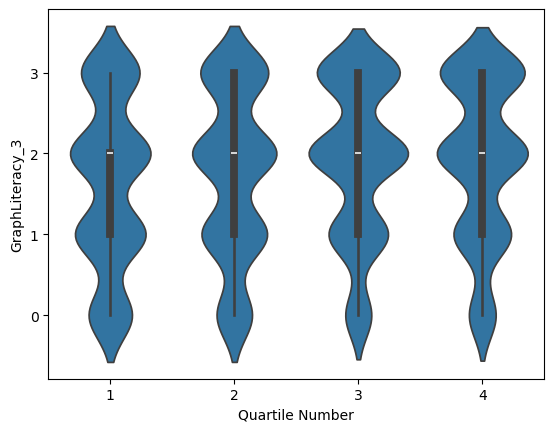

In [97]:
# Violine Plot for GraphLiteracy_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'GraphLiteracy_3')

<Axes: xlabel='Quartile Number', ylabel='Numeracy_3'>

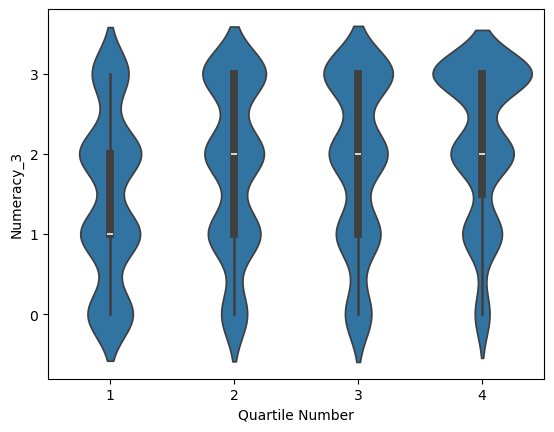

In [98]:
# Violine Plot for Numeracy_3 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Numeracy_3')

<Axes: xlabel='Quartile Number', ylabel='Bayesianreasoning_1'>

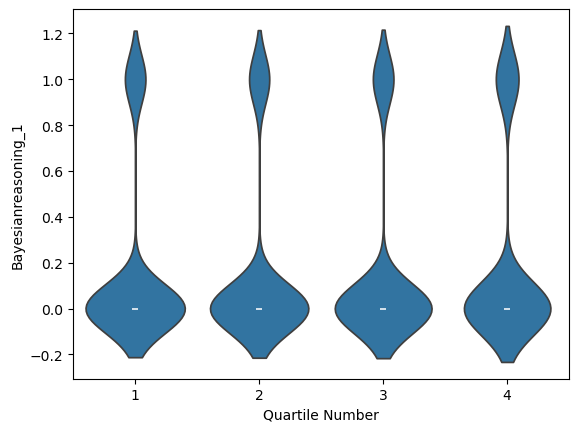

In [99]:
# Violine Plot for Bayesianreasoning_1 for each entry under Wealth Quartiles.

sns.violinplot( data = df4, x = 'Quartile Number', y = 'Bayesianreasoning_1')

### WEALTH vs SCORES w/ ISCED classification

In [100]:
# Descriptive stats for the data set, isced = 1
# NA values of wealth are removed

df6 = df5.dropna(axis = 0, subset = 'wealth')
# df6.drop(df6[df6['wealth'] == 3500000].index, inplace = True)
df6.loc[df6['isced']==1][['wealth']].describe()

wealth
count  7.170000e+02
mean   2.970998e+05
std    6.008920e+05
min    0.000000e+00
25%    1.000000e+04
50%    7.500000e+04
75%    3.000000e+05
max    5.000000e+06

In [101]:
# Descriptive stats for the data set, isced = 2

df6.loc[df6['isced']==2][['wealth']].describe()

wealth
count  9.530000e+02
mean   2.212588e+05
std    4.881513e+05
min    0.000000e+00
25%    4.000000e+03
50%    4.000000e+04
75%    2.000000e+05
max    5.000000e+06

In [102]:
# Descriptive stats for the data set, isced = 3

df6.loc[df6['isced']==3][['wealth']].describe()

wealth
count  4.760000e+02
mean   1.435044e+05
std    4.986552e+05
min    0.000000e+00
25%    7.225000e+02
50%    1.000000e+04
75%    6.850000e+04
max    5.000000e+06

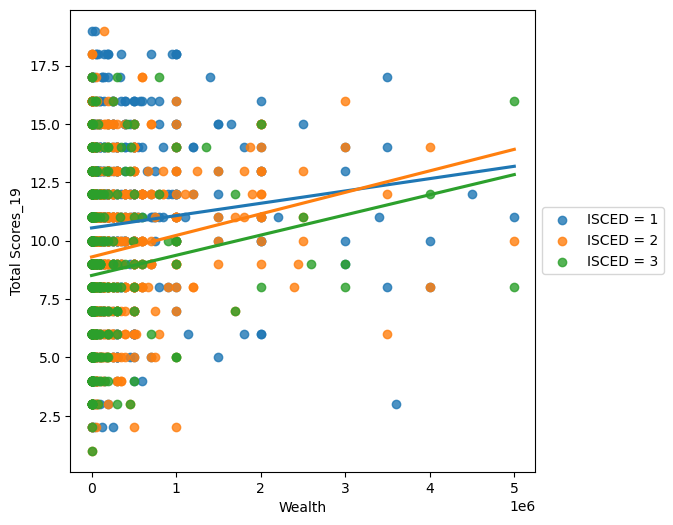

In [103]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='Wealth')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

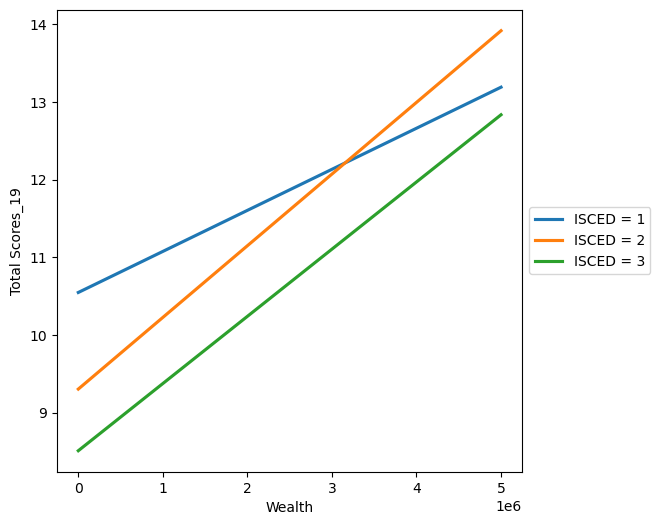

In [104]:
# Trend line for Absolute Tota Facet Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='Wealth')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

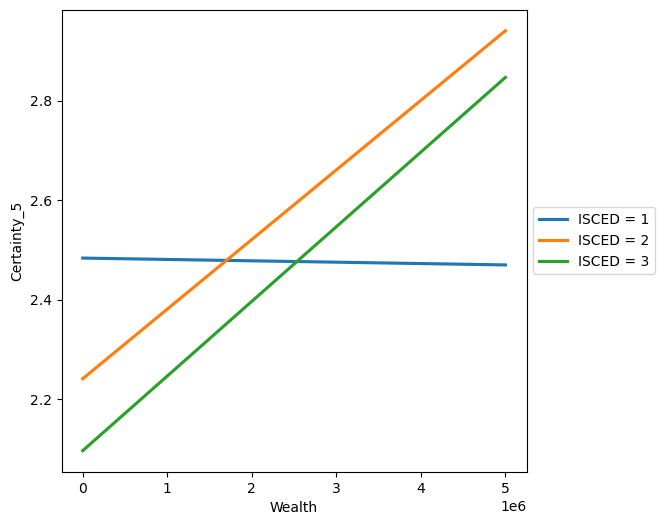

In [105]:
# Trend line for Absolute Certainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_5', xlabel='Wealth')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

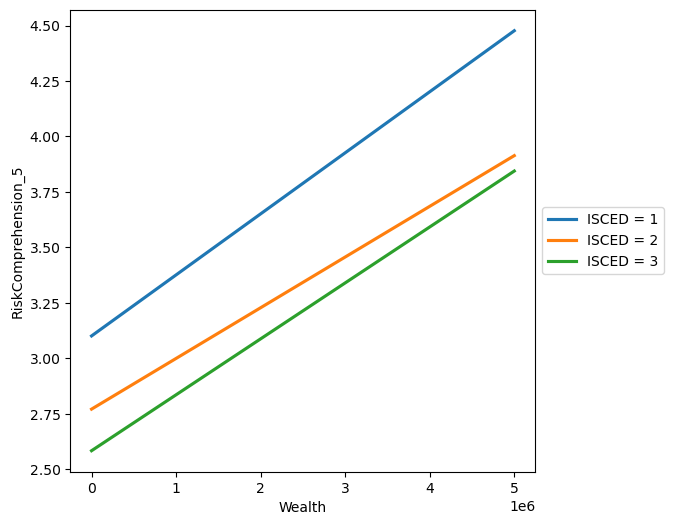

In [106]:
# Trend line for Absolute Uncertainty Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_5', xlabel='Wealth')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

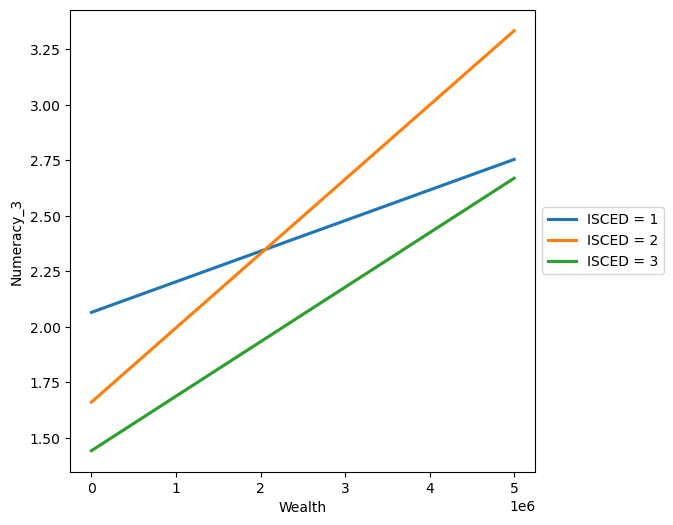

In [107]:
# Trend line for Absolute Number Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_3', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

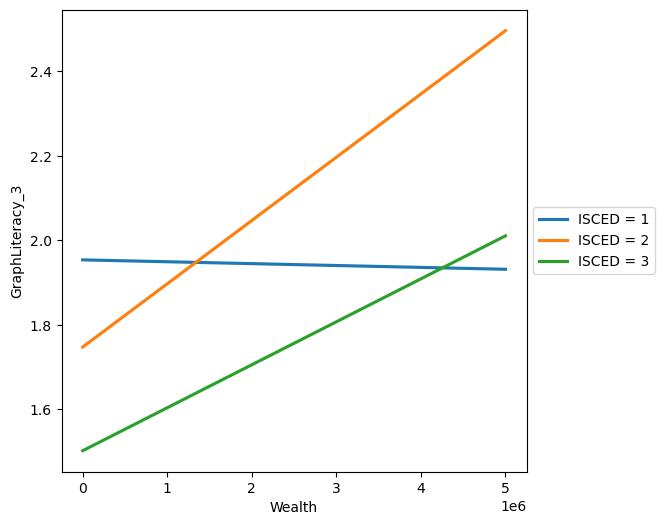

In [108]:
# Trend line for Absolute Graph Comprehension Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='Wealth')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

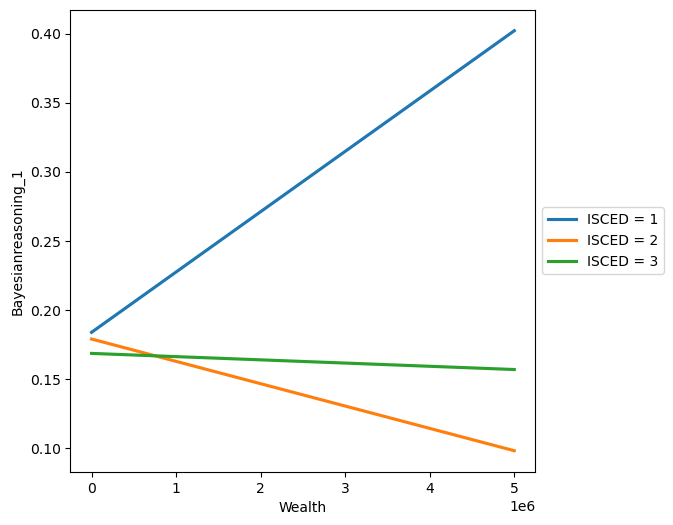

In [109]:
# Trend line for Absolute Bayesian Reasoning Score vs wealth reponses sorted by isced and ORDERED by wealth WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df6.loc[df6['isced']==1].reset_index(drop = True), x = df6.loc[df6['isced']==1].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==2].reset_index(drop = True), x = df6.loc[df6['isced']==2].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df6.loc[df6['isced']==3].reset_index(drop = True), x = df6.loc[df6['isced']==3].reset_index(drop = True)['wealth'], y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='Wealth')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

### WEALTH Quartile Number vs SCORES w/ ISCED and AGE based classification

In [110]:
# Descriptive stats for the data set, isced = 1
# NA values of wealth are removed

df4.loc[df4['isced']==1].describe()

ResponseId         age     age_rec  isced      income        wealth  \
count    717.000000  717.000000  717.000000  717.0  717.000000  7.170000e+02   
mean    5749.210600   46.157601    2.914923    1.0    3.509066  2.970998e+05   
std     3918.532198   14.712097    0.743510    0.0    1.573698  6.008920e+05   
min        1.000000   18.000000    2.000000    1.0    1.000000  0.000000e+00   
25%     2025.000000   33.000000    2.000000    1.0    2.000000  1.000000e+04   
50%     5819.000000   45.000000    3.000000    1.0    4.000000  7.500000e+04   
75%     8920.000000   59.000000    3.000000    1.0    5.000000  3.000000e+05   
max    15573.000000   75.000000    4.000000    1.0    6.000000  5.000000e+06   

       Certainty_5  Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  \
count   717.000000     717.000000           717.000000       717.000000   
mean      2.482566       0.783821             3.182706         1.952580   
std       1.319722       0.694645             1.187143         0.971944   
min       0.000000       0.000000             0.000000         0.000000   
25%       1.000000       0.000000             2.000000         1.000000   
50%       2.000000       1.000000             3.000000         2.000000   
75%       3.000000       1.000000             4.000000         3.000000   
max       5.000000       2.000000             5.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  Uncertainty_%  \
count  717.000000           717.000000   717.000000     717.000000   
mean     2.105997             0.196653    49.651325      39.191074   
std      0.992953             0.397745    26.394431      34.732232   
min      0.000000             0.000000     0.000000       0.000000   
25%      1.000000             0.000000    20.000000       0.000000   
50%      2.000000             0.000000    40.000000      50.000000   
75%      3.000000             0.000000    60.000000      50.000000   
max      3.000000             1.000000   100.000000     100.000000   

       RiskComprehension_%  GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  \
count           717.000000       717.000000  717.000000           717.000000   
mean             63.654114        65.086007   70.199907            19.665272   
std              23.742868        32.398141   33.098432            39.774498   
min               0.000000         0.000000    0.000000             0.000000   
25%              40.000000        33.333333   33.333333             0.000000   
50%              60.000000        66.666667   66.666667             0.000000   
75%              80.000000       100.000000  100.000000             0.000000   
max             100.000000       100.000000  100.000000           100.000000   

       TotalScore_19  TotalScore_%  Quartile Number  
count     717.000000    717.000000       717.000000  
mean       10.704324     56.338545         2.726639  
std         3.409508     17.944778         1.093672  
min         2.000000     10.526316         1.000000  
25%         8.000000     42.105263         2.000000  
50%        11.000000     57.894737         3.000000  
75%        13.000000     68.421053         4.000000  
max        19.000000    100.000000         4.000000

In [111]:
df4.loc[df4['isced']==2].describe()

ResponseId         age     age_rec  isced      income        wealth  \
count    953.000000  953.000000  953.000000  953.0  953.000000  9.530000e+02   
mean    6195.751312   47.355719    2.985310    2.0    2.704092  2.212588e+05   
std     4333.270322   14.947261    0.736071    0.0    1.479039  4.881513e+05   
min       15.000000   18.000000    2.000000    2.0    1.000000  0.000000e+00   
25%     1810.000000   34.000000    2.000000    2.0    1.000000  4.000000e+03   
50%     6433.000000   49.000000    3.000000    2.0    2.000000  4.000000e+04   
75%     9481.000000   60.000000    4.000000    2.0    4.000000  2.000000e+05   
max    14419.000000   75.000000    4.000000    2.0    6.000000  5.000000e+06   

       Certainty_5  Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  \
count   953.000000     953.000000           953.000000       953.000000   
mean      2.271773       0.724029             2.821616         1.780693   
std       1.260507       0.633799             1.208198         0.976168   
min       0.000000       0.000000             0.000000         0.000000   
25%       1.000000       0.000000             2.000000         1.000000   
50%       2.000000       1.000000             3.000000         2.000000   
75%       3.000000       1.000000             4.000000         3.000000   
max       5.000000       2.000000             5.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  Uncertainty_%  \
count  953.000000           953.000000   953.000000     953.000000   
mean     1.734523             0.175236    45.435467      36.201469   
std      1.036029             0.380369    25.210131      31.689959   
min      0.000000             0.000000     0.000000       0.000000   
25%      1.000000             0.000000    20.000000       0.000000   
50%      2.000000             0.000000    40.000000      50.000000   
75%      3.000000             0.000000    60.000000      50.000000   
max      3.000000             1.000000   100.000000     100.000000   

       RiskComprehension_%  GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  \
count           953.000000       953.000000  953.000000           953.000000   
mean             56.432319        59.356418   57.817419            17.523610   
std              24.163959        32.538936   34.534287            38.036854   
min               0.000000         0.000000    0.000000             0.000000   
25%              40.000000        33.333333   33.333333             0.000000   
50%              60.000000        66.666667   66.666667             0.000000   
75%              80.000000       100.000000  100.000000             0.000000   
max             100.000000       100.000000  100.000000           100.000000   

       TotalScore_19  TotalScore_%  Quartile Number  
count     953.000000    953.000000       953.000000  
mean        9.507870     50.041420         2.494229  
std         3.092447     16.276035         1.107754  
min         1.000000      5.263158         1.000000  
25%         7.000000     36.842105         2.000000  
50%        10.000000     52.631579         2.000000  
75%        12.000000     63.157895         3.000000  
max        19.000000    100.000000         4.000000

In [112]:
df4.loc[df4['isced']==3].describe()

ResponseId         age     age_rec  isced      income        wealth  \
count    476.000000  476.000000  476.000000  476.0  476.000000  4.760000e+02   
mean    3632.764706   51.913866    3.222689    3.0    2.264706  1.435044e+05   
std     3661.192748   15.209517    0.740405    0.0    1.363160  4.986552e+05   
min       12.000000   18.000000    2.000000    3.0    1.000000  0.000000e+00   
25%      916.750000   42.000000    3.000000    3.0    1.000000  7.225000e+02   
50%     1924.500000   55.500000    3.000000    3.0    2.000000  1.000000e+04   
75%     6220.250000   64.000000    4.000000    3.0    3.000000  6.850000e+04   
max    15861.000000   75.000000    4.000000    3.0    6.000000  5.000000e+06   

       Certainty_5  Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  \
count   476.000000     476.000000           476.000000       476.000000   
mean      2.117647       0.735294             2.619748         1.516807   
std       1.279319       0.609827             1.224465         1.022757   
min       0.000000       0.000000             0.000000         0.000000   
25%       1.000000       0.000000             2.000000         1.000000   
50%       2.000000       1.000000             3.000000         2.000000   
75%       3.000000       1.000000             4.000000         2.000000   
max       5.000000       2.000000             5.000000         3.000000   

       Numeracy_3  Bayesianreasoning_1  Certainty_%  Uncertainty_%  \
count  476.000000           476.000000   476.000000     476.000000   
mean     1.476891             0.168067    42.352941      36.764706   
std      1.001836             0.374319    25.586374      30.491333   
min      0.000000             0.000000     0.000000       0.000000   
25%      1.000000             0.000000    20.000000       0.000000   
50%      1.000000             0.000000    40.000000      50.000000   
75%      2.000000             0.000000    60.000000      50.000000   
max      3.000000             1.000000   100.000000     100.000000   

       RiskComprehension_%  GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  \
count           476.000000       476.000000  476.000000           476.000000   
mean             52.394958        50.560224   49.229692            16.806723   
std              24.489299        34.091914   33.394533            37.431937   
min               0.000000         0.000000    0.000000             0.000000   
25%              40.000000        33.333333   33.333333             0.000000   
50%              60.000000        66.666667   33.333333             0.000000   
75%              80.000000        66.666667   66.666667             0.000000   
max             100.000000       100.000000  100.000000           100.000000   

       TotalScore_19  TotalScore_%  Quartile Number  
count     476.000000    476.000000       476.000000  
mean        8.634454     45.444494         2.016807  
std         3.132309     16.485835         1.052181  
min         1.000000      5.263158         1.000000  
25%         6.000000     31.578947         1.000000  
50%         8.000000     42.105263         2.000000  
75%        11.000000     57.894737         3.000000  
max        17.000000     89.473684         4.000000

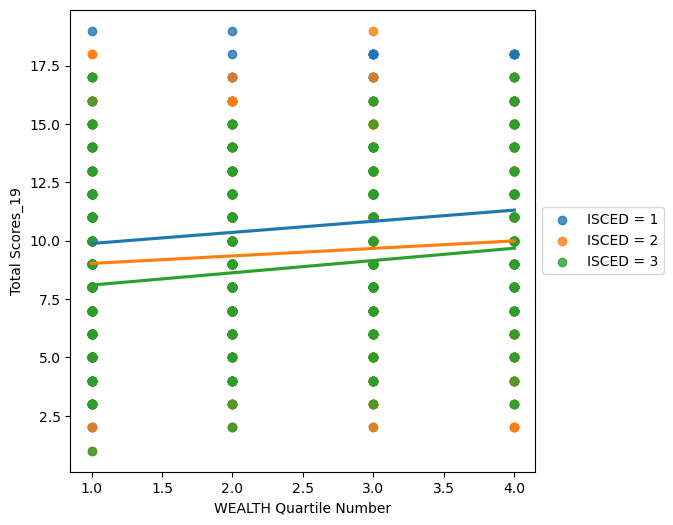

In [113]:
# Trend line for Absolute Tota Facet Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITH scatter

fig, ax7 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[df4['isced']==1]['TotalScore_19'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 1')
sns.regplot (data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[df4['isced']==2]['TotalScore_19'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 2')
sns.regplot (data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[df4['isced']==3]['TotalScore_19'], fit_reg=True, ci=None, ax=ax7, label='ISCED = 3')

ax7.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number')
ax7.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

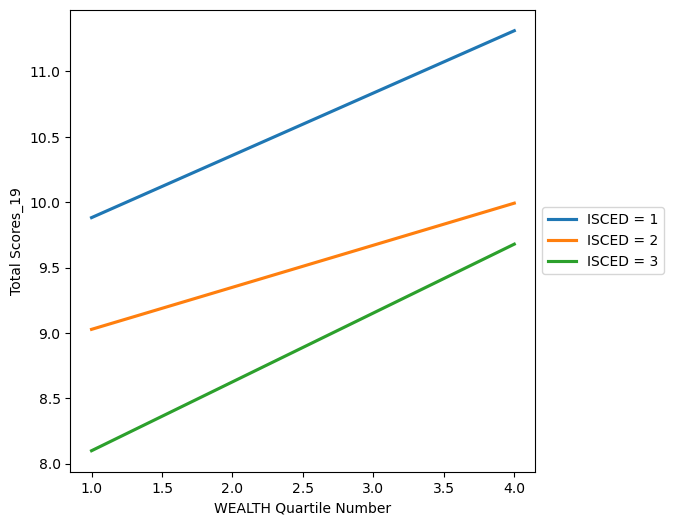

In [114]:
# Trend line for Absolute Tota Facet Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax8 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'TotalScore_19', fit_reg=True, ci=None, ax=ax8, label='ISCED = 3')

ax8.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number')
ax8.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

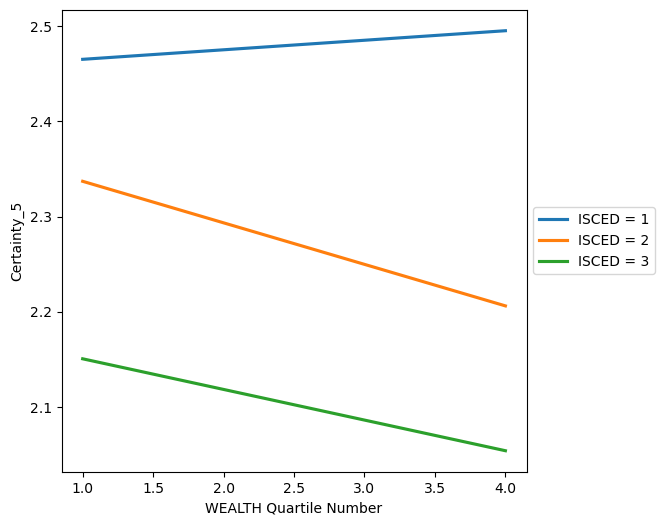

In [115]:
# Trend line for Absolute Certainty Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax9 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'Certainty_5', fit_reg=True, ci=None, ax=ax9, label='ISCED = 3')

ax9.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number')
ax9.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

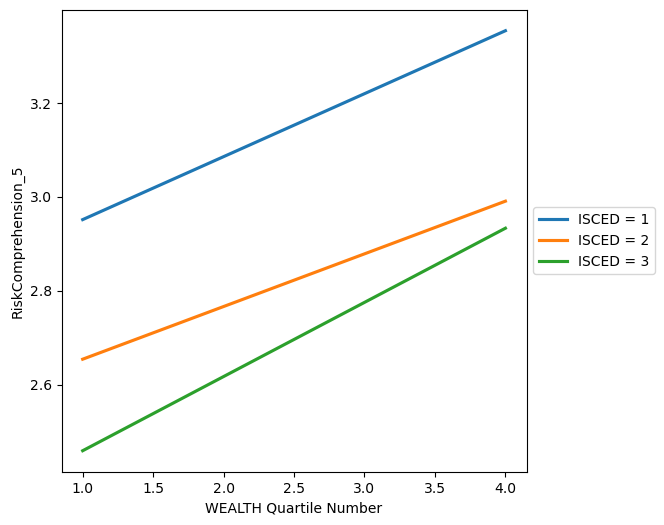

In [116]:
# Trend line for Absolute Risk Comprehension Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax10 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'RiskComprehension_5', fit_reg=True, ci=None, ax=ax10, label='ISCED = 3')

ax10.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number')
ax10.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

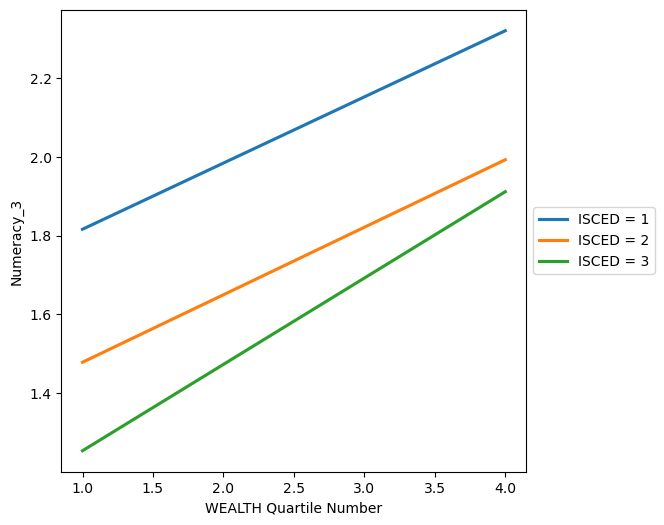

In [117]:
# Trend line for Absolute Number Comprehension Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'Numeracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='Numeracy_3', xlabel='WEALTH Quartile Number')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

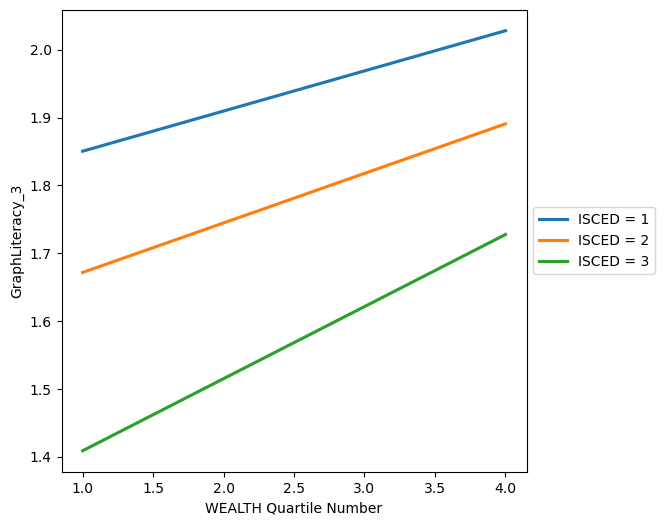

In [118]:
# Trend line for Absolute Graph Comprehension Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax11 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'GraphLiteracy_3', fit_reg=True, ci=None, ax=ax11, label='ISCED = 3')

ax11.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number')
ax11.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

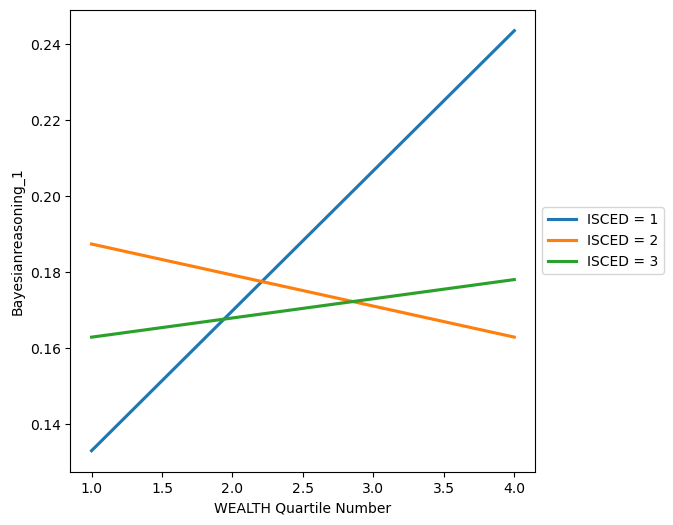

In [119]:
# Trend line for Absolute Bayesian Reasoning Score vs Quartile Number reponses sorted by isced and ORDERED by Quartile Number WITHOUT scatter

fig, ax12 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[df4['isced']==1].reset_index(drop = True), x = 'Quartile Number', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==2].reset_index(drop = True), x = 'Quartile Number', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[df4['isced']==3].reset_index(drop = True), x = 'Quartile Number', y = 'Bayesianreasoning_1', fit_reg=True, ci=None, ax=ax12, label='ISCED = 3')

ax12.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number')
ax12.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [120]:
df4

ResponseId   age  age_rec  isced  income     wealth  Certainty_5  \
0           6410  19.0        2      2     2.0        0.0            1   
1           6601  66.0        4      2     2.0        0.0            3   
2           1611  34.0        2      3     1.0        0.0            2   
3           6714  69.0        4      2     2.0        0.0            1   
4           1603  20.0        2      3     4.0        0.0            1   
...          ...   ...      ...    ...     ...        ...          ...   
2141        3160  49.0        3      1     4.0  4500000.0            3   
2142        1519  71.0        4      3     2.0  5000000.0            3   
2143        6471  71.0        4      2     3.0  5000000.0            2   
2144          97  24.0        2      1     4.0  5000000.0            5   
2145         706  28.0        2      3     1.0  5000000.0            5   

      Uncertainty_2  RiskComprehension_5  GraphLiteracy_3  Numeracy_3  \
0                 1                    3                2           3   
1                 1                    2                3           2   
2                 2                    4                3           2   
3                 0                    4                0           0   
4                 1                    1                0           0   
...             ...                  ...              ...         ...   
2141              1                    4                2           2   
2142              1                    4                0           0   
2143              2                    1                2           3   
2144              0                    3                2           0   
2145              2                    4                2           3   

      Bayesianreasoning_1  Certainty_%  Uncertainty_%  RiskComprehension_%  \
0                       0         20.0           50.0                 60.0   
1                       0         60.0           50.0                 40.0   
2                       0         40.0          100.0                 80.0   
3                       1         20.0            0.0                 80.0   
4                       0         20.0           50.0                 20.0   
...                   ...          ...            ...                  ...   
2141                    0         60.0           50.0                 80.0   
2142                    0         60.0           50.0                 80.0   
2143                    0         40.0          100.0                 20.0   
2144                    1        100.0            0.0                 60.0   
2145                    0        100.0          100.0                 80.0   

      GraphLiteracy_%  Numeracy_%  Bayesianreasoning_%  TotalScore_19  \
0           66.666667  100.000000                  0.0             10   
1          100.000000   66.666667                  0.0             11   
2          100.000000   66.666667                  0.0             13   
3            0.000000    0.000000                100.0              6   
4            0.000000    0.000000                  0.0              3   
...               ...         ...                  ...            ...   
2141        66.666667   66.666667                  0.0             12   
2142         0.000000    0.000000                  0.0              8   
2143        66.666667  100.000000                  0.0             10   
2144        66.666667    0.000000                100.0             11   
2145        66.666667  100.000000                  0.0             16   

      TotalScore_%  Quartile Number  
0        52.631579                1  
1        57.894737                1  
2        68.421053                1  
3        31.578947                1  
4        15.789474                1  
...            ...              ...  
2141     63.157895                4  
2142     42.105263                4  
2143     52.631579                4  
2144     57.894737                4  
2145    

In [121]:
# Since we already have a classification for Age groups in the form of age_rec, we will use that.
# We will also use median of age to see if it yields any relevant results, as instructed.

# AXES to be used = Age or age groups, ISCED, Income

# Age groups = [2,3,4]
# Age group 2 = 18 to 35 y/o
# Age group 3 = 36 to 59 y/o
# Age group 4 = 60 to 75 y/o (75 y/o, i.e, within the scope of the data we have, it can mean 60 and above also)



In [122]:
df4.loc[(df4['age_rec']==2)].describe()

ResponseId         age  age_rec       isced      income  \
count    585.000000  585.000000    585.0  585.000000  585.000000   
mean    6887.452991   28.384615      2.0    1.757265    2.878632   
std     4359.643357    4.910581      0.0    0.699231    1.568298   
min       24.000000   18.000000      2.0    1.000000    1.000000   
25%     2417.000000   25.000000      2.0    1.000000    2.000000   
50%     6923.000000   30.000000      2.0    2.000000    3.000000   
75%    10389.000000   33.000000      2.0    2.000000    4.000000   
max    15861.000000   35.000000      2.0    3.000000    6.000000   

             wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
count  5.850000e+02   585.000000     585.000000           585.000000   
mean   1.738593e+05     2.473504       0.656410             2.841026   
std    4.801262e+05     1.395835       0.677347             1.257999   
min    0.000000e+00     0.000000       0.000000             0.000000   
25%    1.000000e+03     1.000000       0.000000             2.000000   
50%    2.000000e+04     2.000000       1.000000             3.000000   
75%    1.400000e+05     3.000000       1.000000             4.000000   
max    5.000000e+06     5.000000       2.000000             5.000000   

       GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  Certainty_%  \
count       585.000000  585.000000           585.000000   585.000000   
mean          1.666667    1.675214             0.191453    49.470085   
std           1.043571    1.107486             0.393781    27.916697   
min           0.000000    0.000000             0.000000     0.000000   
25%           1.000000    1.000000             0.000000    20.000000   
50%           2.000000    2.000000             0.000000    40.000000   
75%           3.000000    3.000000             0.000000    60.000000   
max           3.000000    3.000000             1.000000   100.000000   

       Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count     585.000000           585.000000       585.000000  585.000000   
mean       32.820513            56.820513        55.555556   55.840456   
std        33.867342            25.159973        34.785711   36.916196   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000            40.000000        33.333333   33.333333   
50%        50.000000            60.000000        66.666667   66.666667   
75%        50.000000            80.000000       100.000000  100.000000   
max       100.000000           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_19  TotalScore_%  Quartile Number  
count           585.000000     585.000000    585.000000       585.000000  
mean             19.145299       9.504274     50.022492         2.239316  
std              39.378142       3.556838     18.720199         1.079459  
min               0.000000       1.000000      5.263158         1.000000  
25%               0.000000       7.000000     36.842105         1.000000  
50%               0.000000      10.000000     52.631579         2.000000  
75%               0.000000      12.000000     63.157895         3.000000  
max             100.000000      19.000000    100.000000         4.000000

In [123]:
df4.loc[(df4['age_rec']==3)].describe()

ResponseId         age  age_rec       isced      income  \
count    945.000000  945.000000    945.0  945.000000  945.000000   
mean    4738.231746   48.552381      3.0    1.868783    2.939683   
std     3865.743400    6.930776      0.0    0.721734    1.600967   
min        1.000000   36.000000      3.0    1.000000    1.000000   
25%      988.000000   43.000000      3.0    1.000000    2.000000   
50%     3137.000000   49.000000      3.0    2.000000    3.000000   
75%     8515.000000   55.000000      3.0    2.000000    4.000000   
max    15573.000000   59.000000      3.0    3.000000    6.000000   

             wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
count  9.450000e+02   945.000000     945.000000           945.000000   
mean   2.199448e+05     2.328042       0.762963             2.977778   
std    4.909925e+05     1.326996       0.653303             1.185422   
min    0.000000e+00     0.000000       0.000000             0.000000   
25%    3.000000e+03     1.000000       0.000000             2.000000   
50%    4.000000e+04     2.000000       1.000000             3.000000   
75%    2.000000e+05     3.000000       1.000000             4.000000   
max    4.500000e+06     5.000000       2.000000             5.000000   

       GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  Certainty_%  \
count       945.000000  945.000000           945.000000   945.000000   
mean          1.848677    1.849735             0.180952    46.560847   
std           0.970628    1.020272             0.385183    26.539919   
min           0.000000    0.000000             0.000000     0.000000   
25%           1.000000    1.000000             0.000000    20.000000   
50%           2.000000    2.000000             0.000000    40.000000   
75%           3.000000    3.000000             0.000000    60.000000   
max           3.000000    3.000000             1.000000   100.000000   

       Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count     945.000000           945.000000       945.000000  945.000000   
mean       38.148148            59.555556        61.622575   61.657848   
std        32.665149            23.708446        32.354281   34.009083   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000            40.000000        33.333333   33.333333   
50%        50.000000            60.000000        66.666667   66.666667   
75%        50.000000            80.000000       100.000000  100.000000   
max       100.000000           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_19  TotalScore_%  Quartile Number  
count           945.000000     945.000000    945.000000        945.00000  
mean             18.095238       9.948148     52.358674          2.48254  
std              38.518258       3.281700     17.272105          1.12180  
min               0.000000       2.000000     10.526316          1.00000  
25%               0.000000       8.000000     42.105263          1.00000  
50%               0.000000      10.000000     52.631579          2.00000  
75%               0.000000      12.000000     63.157895          3.00000  
max             100.000000      19.000000    100.000000          4.00000

In [124]:
df4.loc[(df4['age_rec']==4)].describe()

ResponseId         age  age_rec       isced      income  \
count    616.000000  616.000000    616.0  616.000000  616.000000   
mean    5274.581169   65.663961      4.0    2.040584    2.774351   
std     4129.966956    4.165175      0.0    0.769315    1.490149   
min        2.000000   60.000000      4.0    1.000000    1.000000   
25%     1448.750000   62.000000      4.0    1.000000    2.000000   
50%     5405.500000   65.000000      4.0    2.000000    3.000000   
75%     8610.250000   69.000000      4.0    3.000000    4.000000   
max    14419.000000   75.000000      4.0    3.000000    6.000000   

             wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
count  6.160000e+02   616.000000     616.000000           616.000000   
mean   2.964819e+05     2.120130       0.806818             2.827922   
std    6.292273e+05     1.096269       0.608893             1.242709   
min    0.000000e+00     0.000000       0.000000             0.000000   
25%    5.000000e+03     1.000000       0.000000             2.000000   
50%    6.000000e+04     2.000000       1.000000             3.000000   
75%    3.000000e+05     3.000000       1.000000             4.000000   
max    5.000000e+06     5.000000       2.000000             5.000000   

       GraphLiteracy_3  Numeracy_3  Bayesianreasoning_1  Certainty_%  \
count       616.000000  616.000000           616.000000   616.000000   
mean          1.780844    1.847403             0.170455    42.402597   
std           0.985599    0.998907             0.376337    21.925378   
min           0.000000    0.000000             0.000000     0.000000   
25%           1.000000    1.000000             0.000000    20.000000   
50%           2.000000    2.000000             0.000000    40.000000   
75%           3.000000    3.000000             0.000000    60.000000   
max           3.000000    3.000000             1.000000   100.000000   

       Uncertainty_%  RiskComprehension_%  GraphLiteracy_%  Numeracy_%  \
count     616.000000           616.000000       616.000000  616.000000   
mean       40.340909            56.558442        59.361472   61.580087   
std        30.444629            24.854173        32.853290   33.296886   
min         0.000000             0.000000         0.000000    0.000000   
25%         0.000000            40.000000        33.333333   33.333333   
50%        50.000000            60.000000        66.666667   66.666667   
75%        50.000000            80.000000       100.000000  100.000000   
max       100.000000           100.000000       100.000000  100.000000   

       Bayesianreasoning_%  TotalScore_19  TotalScore_%  Quartile Number  
count           616.000000     616.000000    616.000000       616.000000  
mean             17.045455       9.553571     50.281955         2.655844  
std              37.633723       3.054580     16.076737         1.122598  
min               0.000000       1.000000      5.263158         1.000000  
25%               0.000000       7.000000     36.842105         2.000000  
50%               0.000000       9.000000     47.368421         3.000000  
75%               0.000000      12.000000     63.157895         4.000000  
max             100.000000      18.000000     94.736842         4.000000

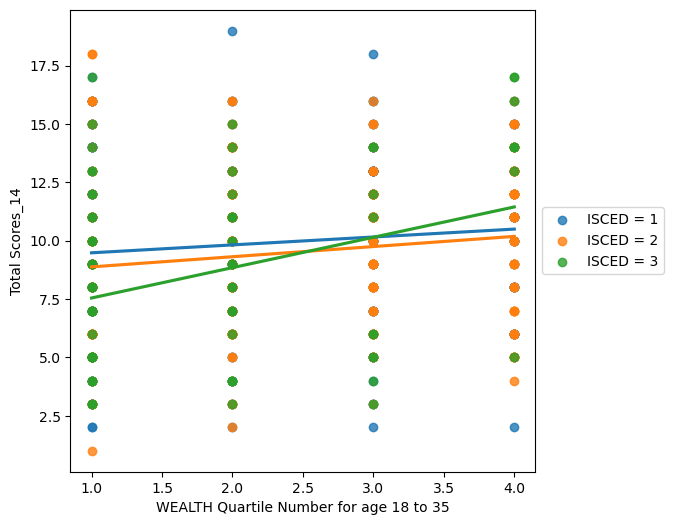

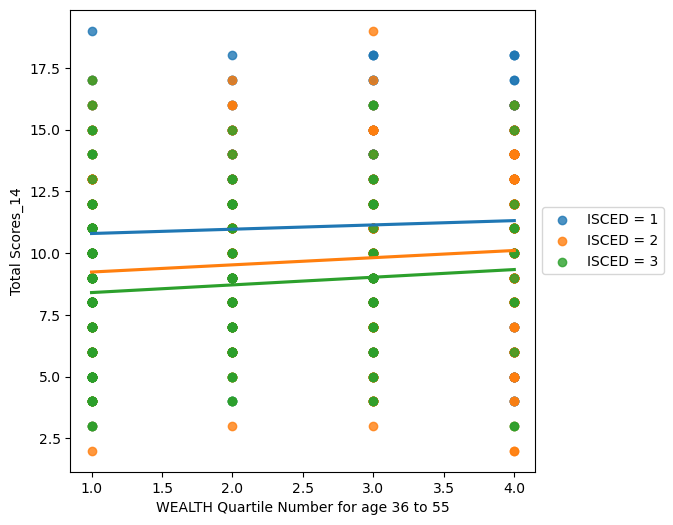

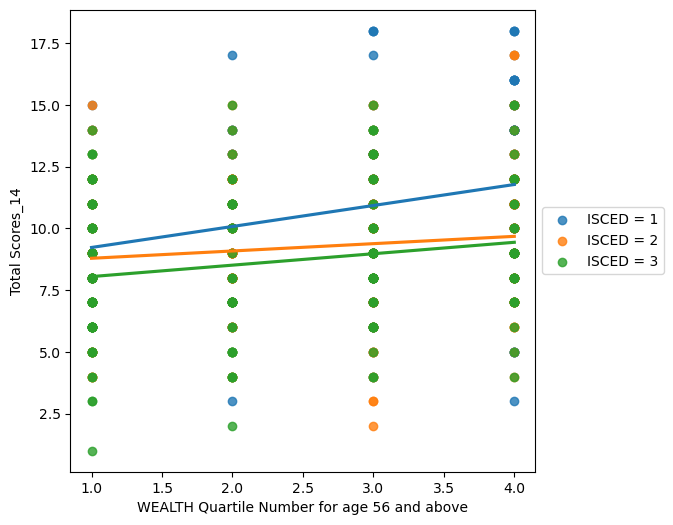

In [125]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 18 to 35')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 36 to 55')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 56 and above')
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

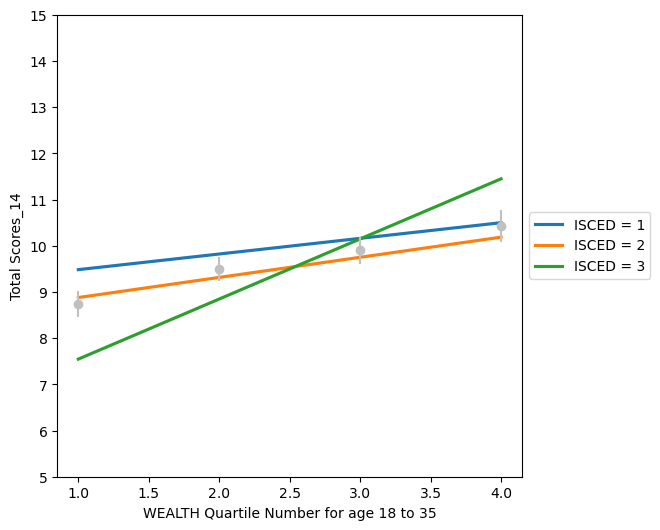

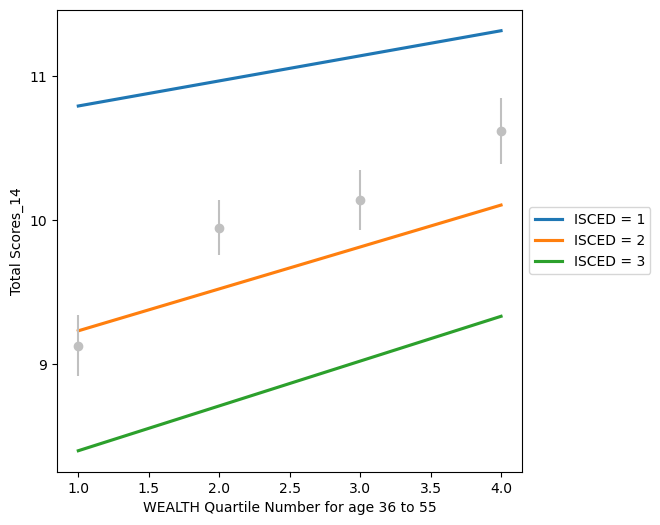

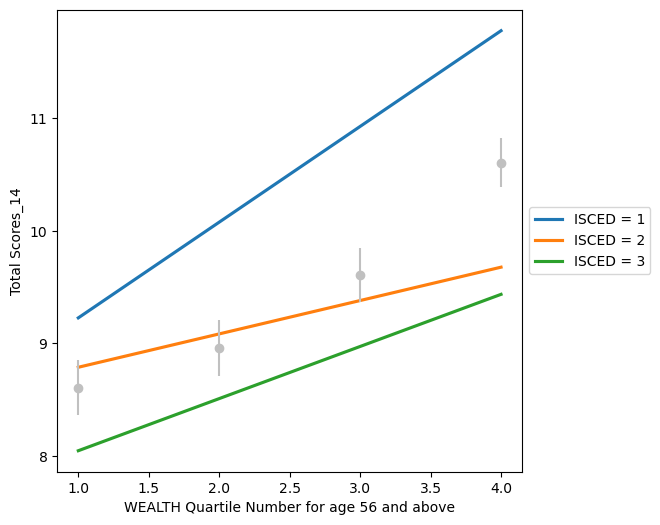

In [126]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number']).mean(numeric_only=True)['TotalScore_19'], yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['TotalScore_19'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 36 to 55',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number']).mean(numeric_only=True)['TotalScore_19'], yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['TotalScore_19'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Total Scores_14', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(5, 16 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number']).mean(numeric_only=True)['TotalScore_19'], yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['TotalScore_19'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

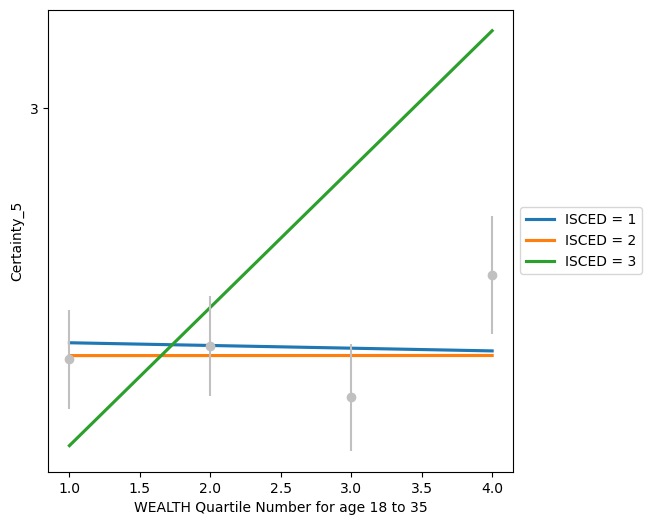

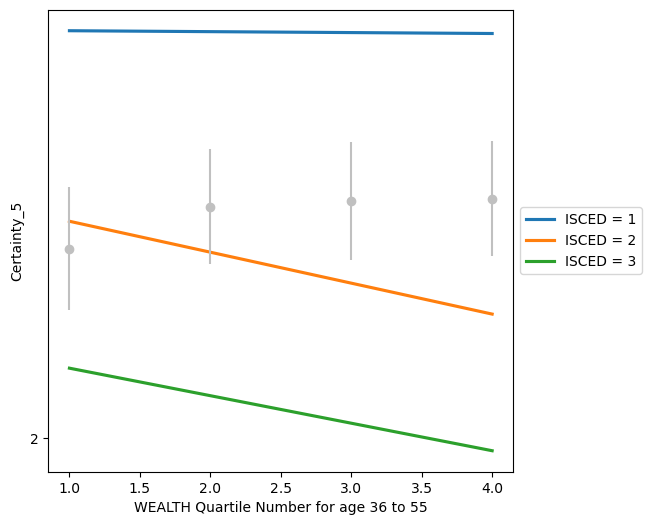

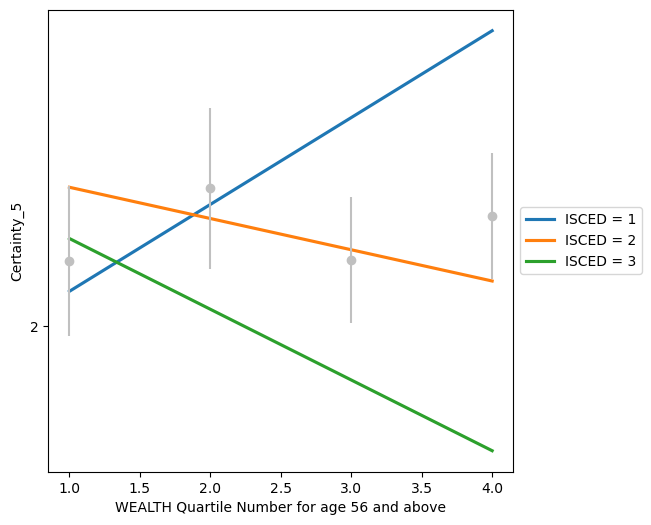

In [127]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number'])['Certainty_5'].mean(), yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number for age 36 to 55',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number'])['Certainty_5'].mean(), yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number'])['Certainty_5'].mean(), yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

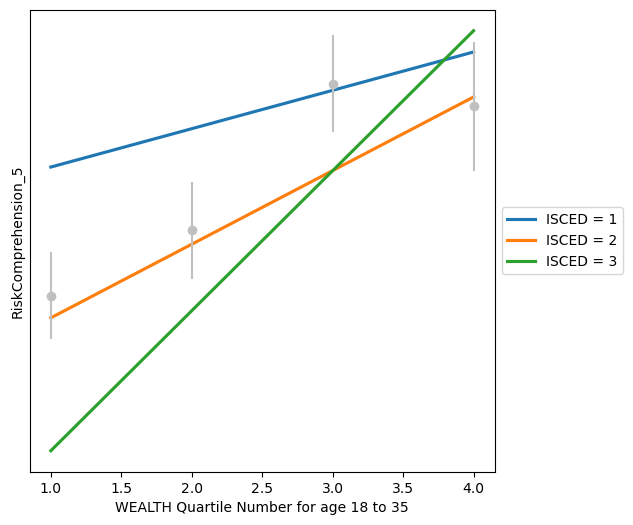

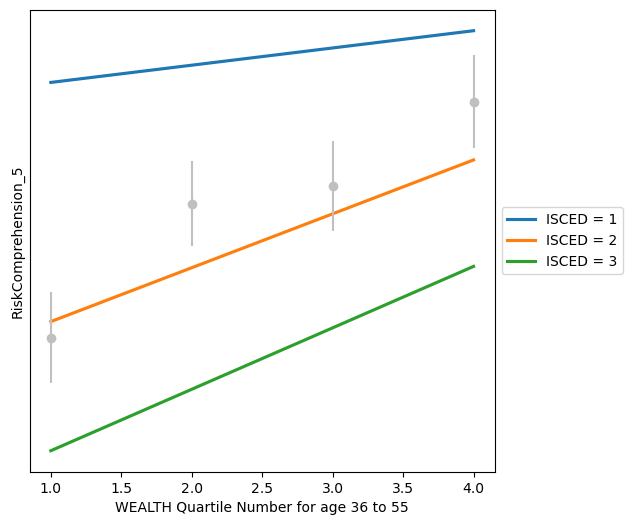

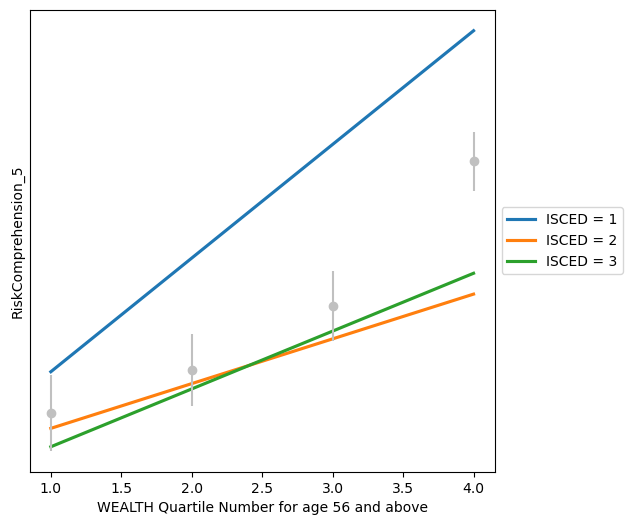

In [128]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number'])['RiskComprehension_5'].mean(), yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number for age 36 to 55',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number'])['RiskComprehension_5'].mean(), yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(0, 3 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number'])['RiskComprehension_5'].mean(), yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

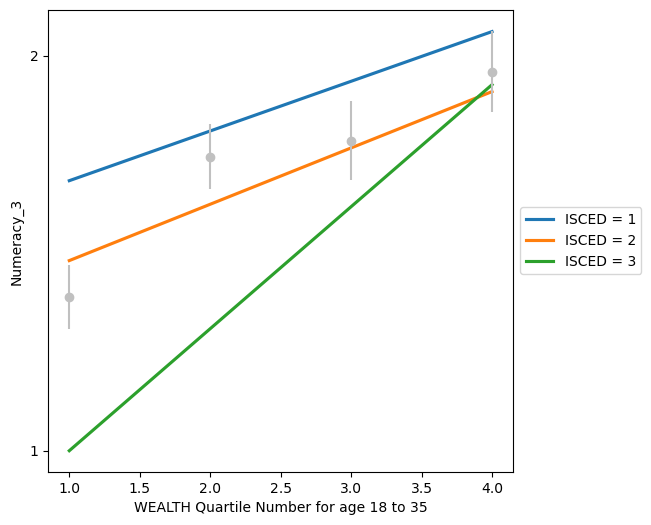

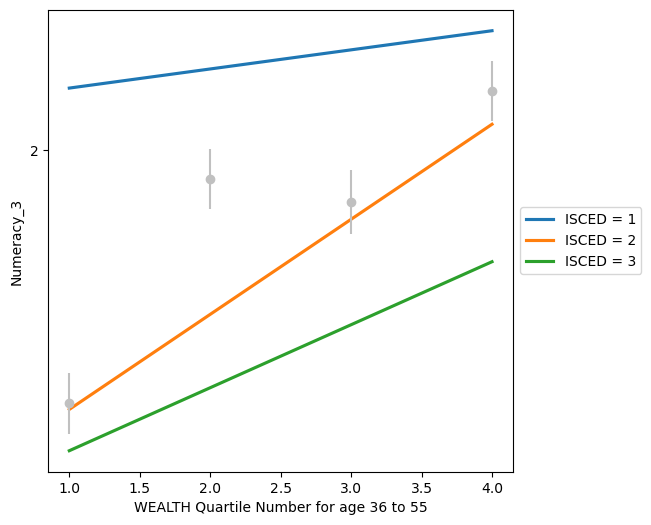

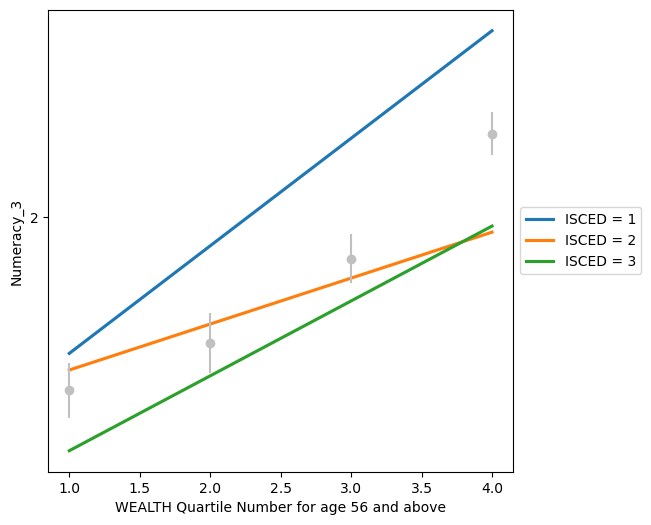

In [129]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Numeracy_3', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number'])['Numeracy_3'].mean(), yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Numeracy_3', xlabel='WEALTH Quartile Number for age 36 to 55',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number'])['Numeracy_3'].mean(), yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Numeracy_3', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(0, 6 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number'])['Numeracy_3'].mean(), yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

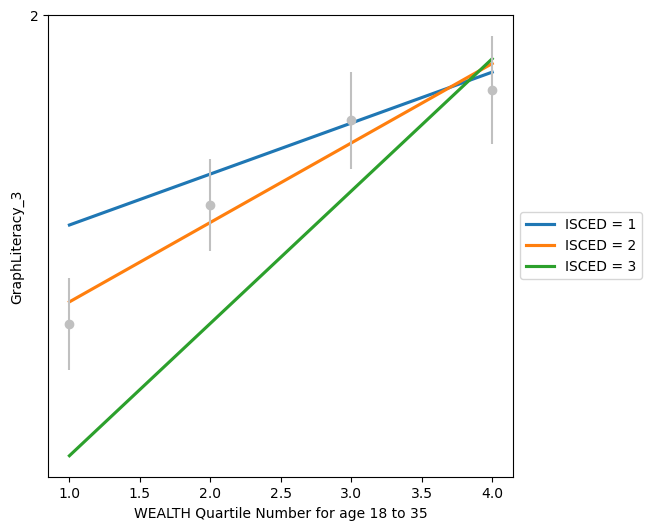

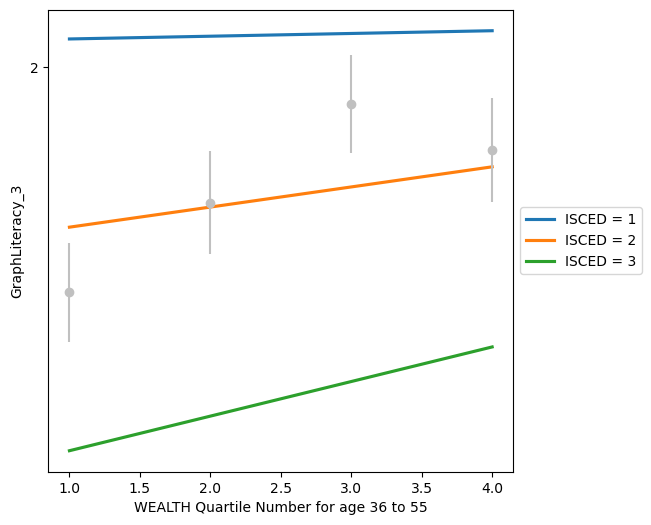

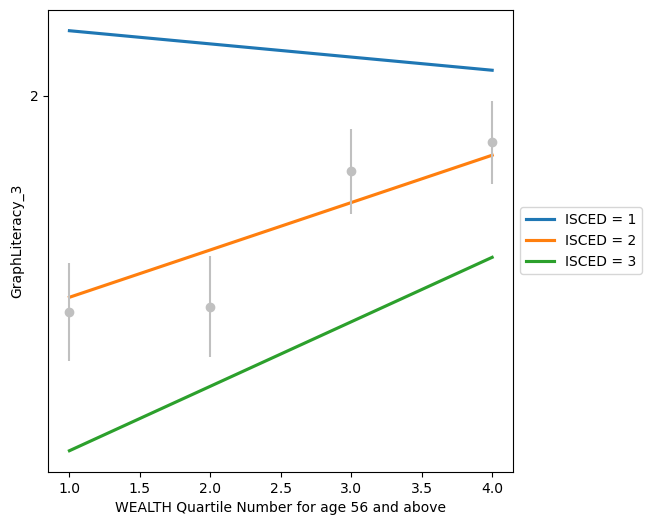

In [130]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number'])['GraphLiteracy_3'].mean(), yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number for age 36 to 55',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number'])['GraphLiteracy_3'].mean(), yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(0, 4 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number'])['GraphLiteracy_3'].mean(), yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

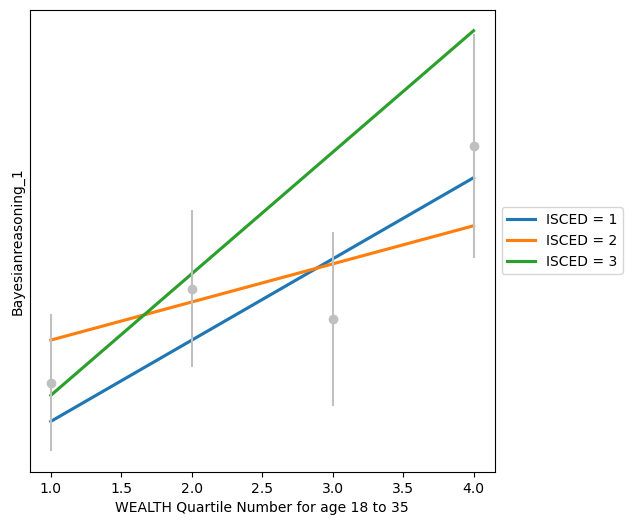

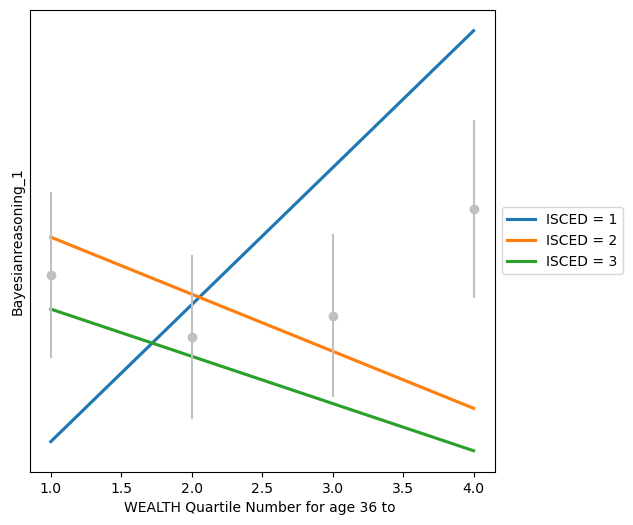

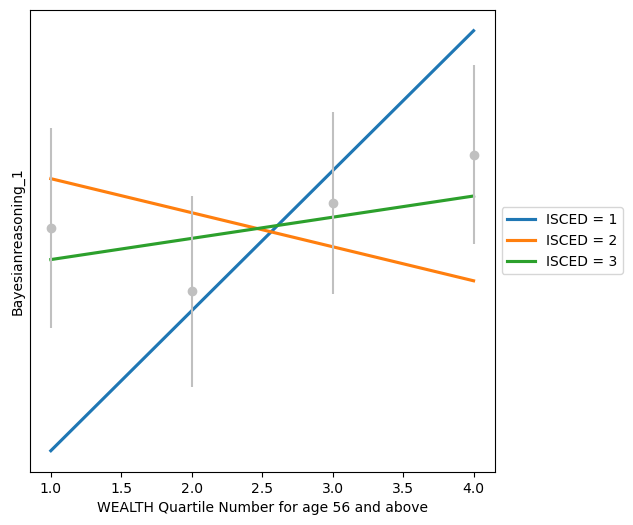

In [131]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==2) & (df4['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number for age 18 to 35',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax1.errorbar(x = df4.loc[ df4['age_rec']==2  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==2  ].groupby(['Quartile Number'])['Bayesianreasoning_1'].mean(), yerr = df4.loc[ (df4['age_rec']==2) ].groupby(['Quartile Number'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==3) & (df4['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number for age 36 to ',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax2.errorbar(x = df4.loc[ df4['age_rec']==3  ]["Quartile Number"].unique(), y = df4.loc[ df4['age_rec']==3  ].groupby(['Quartile Number'])['Bayesianreasoning_1'].mean(), yerr = df4.loc[ (df4['age_rec']==3) ].groupby(['Quartile Number'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

fig, ax3 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age_rec']==4) & (df4['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax3, label='ISCED = 3')

ax3.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number for age 56 and above',  yticks = np.arange(0, 5 , 1))
ax3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax3.errorbar(x = df4.loc[ df4['age_rec']== 4 ]['Quartile Number'].unique(), y = df4.loc[ df4['age_rec']==4  ].groupby(['Quartile Number'])['Bayesianreasoning_1'].mean(), yerr = df4.loc[ (df4['age_rec']==4) ].groupby(['Quartile Number'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
plt.show()

In [132]:
# Age mean method
# Age_mean

In [133]:
age_m = df2["age"].median()
age_m

49.0

In [134]:
df4["Quartile Number"].value_counts()

Quartile Number
1    566
3    536
2    529
4    515
Name: count, dtype: int64

In [135]:
df4.loc[(df4['age'] < age_m)].describe()

ResponseId          age      age_rec        isced      income  \
count   1044.000000  1044.000000  1044.000000  1044.000000  1044.00000   
mean    5925.962644    34.547893     2.439655     1.781609     2.91092   
std     4272.387694     8.245898     0.496583     0.707586     1.57908   
min        1.000000    18.000000     2.000000     1.000000     1.00000   
25%     1643.250000    29.000000     2.000000     1.000000     2.00000   
50%     5859.500000    34.000000     2.000000     2.000000     3.00000   
75%     9653.250000    42.000000     3.000000     2.000000     4.00000   
max    15861.000000    48.000000     3.000000     3.000000     6.00000   

             wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
count  1.044000e+03  1044.000000    1044.000000          1044.000000   
mean   1.803928e+05     2.467433       0.691571             2.918582   
std    4.406411e+05     1.396439       0.664600             1.233163   
min    0.000000e+00     0.000000       0.000000             0.000000   
25%    1.387500e+03     1.000000       0.000000             2.000000   
50%    2.500000e+04     2.000000       1.000000             3.000000   
75%    1.600000e+05     3.000000       1.000000             4.000000   
max    5.000000e+06     5.000000       2.000000             5.000000   

       GraphLiteracy_3   Numeracy_3  Bayesianreasoning_1  Certainty_%  \
count      1044.000000  1044.000000          1044.000000  1044.000000   
mean          1.766284     1.789272             0.193487    49.348659   
std           1.019923     1.065289             0.395220    27.928773   
min           0.000000     0.000000             0.000000     0.000000   
25%           1.000000     1.000000             0.000000    20.000000   
50%           2.000000     2.000000             0.000000    40.000000   
75%           3.000000     3.000000             0.000000    60.000000   
max           3.000000     3.000000             1.000000   100.000000   

       Uncertainty_%  RiskComprehension_%  GraphLiteracy_%   Numeracy_%  \
count    1044.000000          1044.000000      1044.000000  1044.000000   
mean       34.578544            58.371648        58.876117    59.642401   
std        33.229995            24.663251        33.997430    35.509649   
min         0.000000             0.000000         0.000000     0.000000   
25%         0.000000            40.000000        33.333333    33.333333   
50%        50.000000            60.000000        66.666667    66.666667   
75%        50.000000            80.000000       100.000000   100.000000   
max       100.000000           100.000000       100.000000   100.000000   

       Bayesianreasoning_%  TotalScore_19  TotalScore_%  Quartile Number  
count          1044.000000    1044.000000   1044.000000      1044.000000  
mean             19.348659       9.826628     51.719097         2.324713  
std              39.522038       3.485296     18.343662         1.099517  
min               0.000000       1.000000      5.263158         1.000000  
25%               0.000000       7.000000     36.842105         1.000000  
50%               0.000000      10.000000     52.631579         2.000000  
75%               0.000000      12.000000     63.157895         3.000000  
max             100.000000      19.000000    100.000000         4.000000

In [136]:
df4.loc[(df4['age'] >= age_m)].describe()

ResponseId          age      age_rec        isced       income  \
count   1102.000000  1102.000000  1102.000000  1102.000000  1102.000000   
mean    5053.744102    60.678766     3.558984     1.988203     2.842105   
std     4038.357029     6.785027     0.496734     0.750928     1.545121   
min        2.000000    49.000000     3.000000     1.000000     1.000000   
25%     1271.500000    55.000000     3.000000     1.000000     2.000000   
50%     3147.000000    60.500000     4.000000     2.000000     3.000000   
75%     8604.000000    66.000000     4.000000     3.000000     4.000000   
max    15573.000000    75.000000     4.000000     3.000000     6.000000   

             wealth  Certainty_5  Uncertainty_2  RiskComprehension_5  \
count  1.102000e+03  1102.000000    1102.000000          1102.000000   
mean   2.757335e+05     2.156987       0.798548             2.877495   
std    6.049802e+05     1.164039       0.631649             1.214678   
min    0.000000e+00     0.000000       0.000000             0.000000   
25%    5.000000e+03     1.000000       0.000000             2.000000   
50%    5.000000e+04     2.000000       1.000000             3.000000   
75%    2.500000e+05     3.000000       1.000000             4.000000   
max    5.000000e+06     5.000000       2.000000             5.000000   

       GraphLiteracy_3   Numeracy_3  Bayesianreasoning_1  Certainty_%  \
count      1102.000000  1102.000000          1102.000000  1102.000000   
mean          1.792196     1.813067             0.168784    43.139746   
std           0.976292     1.018223             0.374731    23.280786   
min           0.000000     0.000000             0.000000     0.000000   
25%           1.000000     1.000000             0.000000    20.000000   
50%           2.000000     2.000000             0.000000    40.000000   
75%           3.000000     3.000000             0.000000    60.000000   
max           3.000000     3.000000             1.000000   100.000000   

       Uncertainty_%  RiskComprehension_%  GraphLiteracy_%   Numeracy_%  \
count    1102.000000          1102.000000      1102.000000  1102.000000   
mean       39.927405            57.549909        59.739867    60.435572   
std        31.582457            24.293557        32.543052    33.940754   
min         0.000000             0.000000         0.000000     0.000000   
25%         0.000000            40.000000        33.333333    33.333333   
50%        50.000000            60.000000        66.666667    66.666667   
75%        50.000000            80.000000       100.000000   100.000000   
max       100.000000           100.000000       100.000000   100.000000   

       Bayesianreasoning_%  TotalScore_19  TotalScore_%  Quartile Number  
count          1102.000000    1102.000000   1102.000000      1102.000000  
mean             16.878403       9.607078     50.563569         2.599819  
std              37.473111       3.116110     16.400578         1.125431  
min               0.000000       1.000000      5.263158         1.000000  
25%               0.000000       7.000000     36.842105         2.000000  
50%               0.000000       9.000000     47.368421         3.000000  
75%               0.000000      12.000000     63.157895         4.000000  
max             100.000000      19.000000    100.000000         4.000000

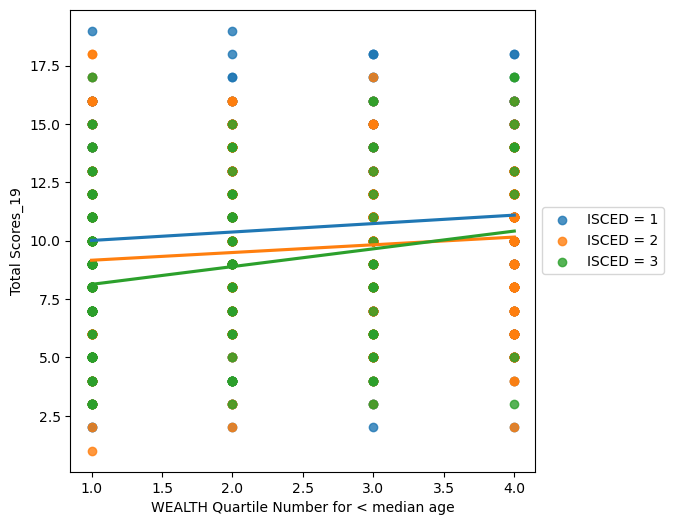

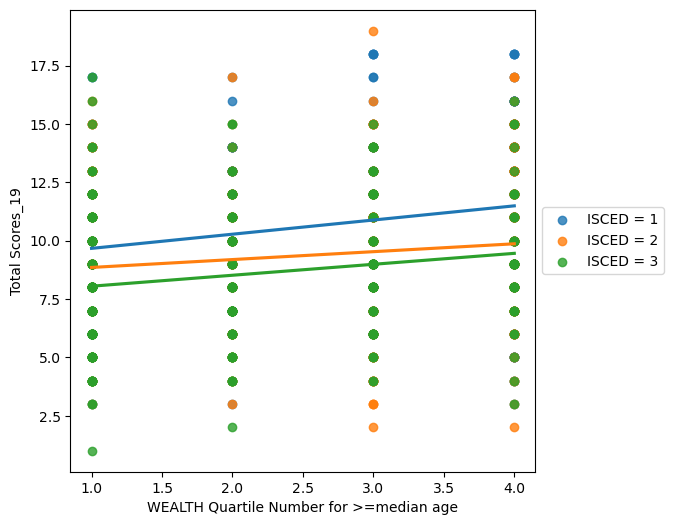

In [137]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number for < median age')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (data = df4.loc[(df4['age'] >= age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number for >=median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

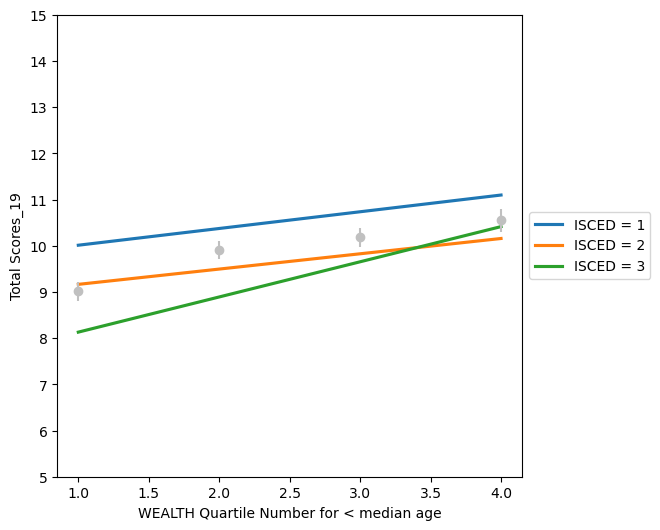

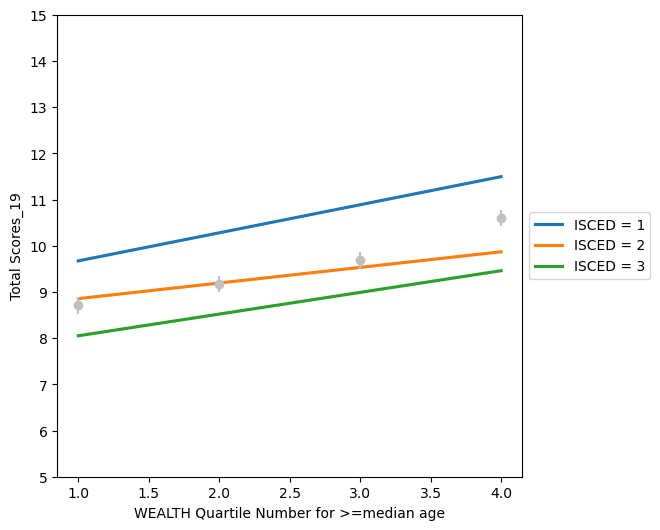

In [138]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['TotalScore_19'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['TotalScore_19'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(5, 16 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['TotalScore_19'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['TotalScore_19'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['TotalScore_19'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Total Scores_19', xlabel='WEALTH Quartile Number for >=median age',  yticks = np.arange(5, 16 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

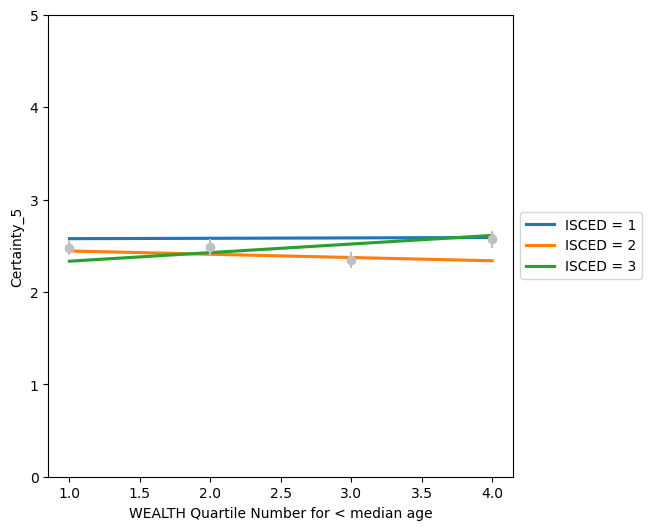

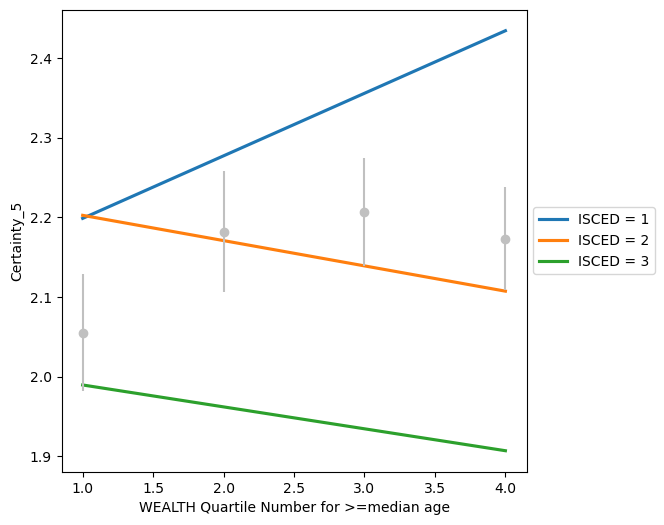

In [139]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['Certainty_5'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['Certainty_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['Certainty_5'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['Certainty_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Certainty_5', xlabel='WEALTH Quartile Number for >=median age')
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

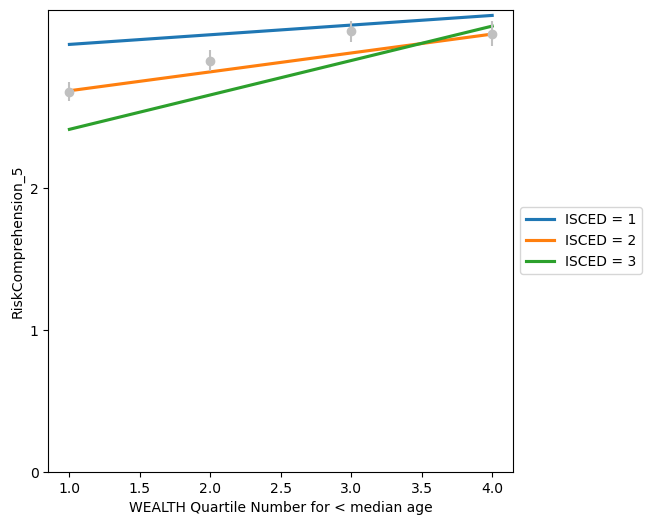

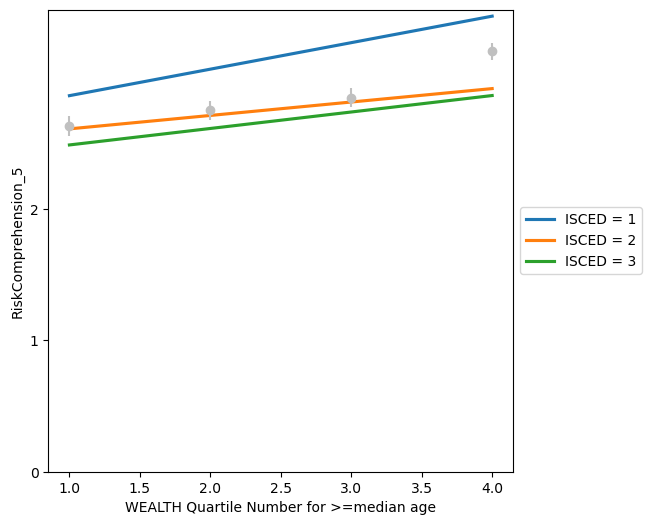

In [140]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['RiskComprehension_5'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(0, 3 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['RiskComprehension_5'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['RiskComprehension_5'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['RiskComprehension_5'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='RiskComprehension_5', xlabel='WEALTH Quartile Number for >=median age',  yticks = np.arange(0, 3 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

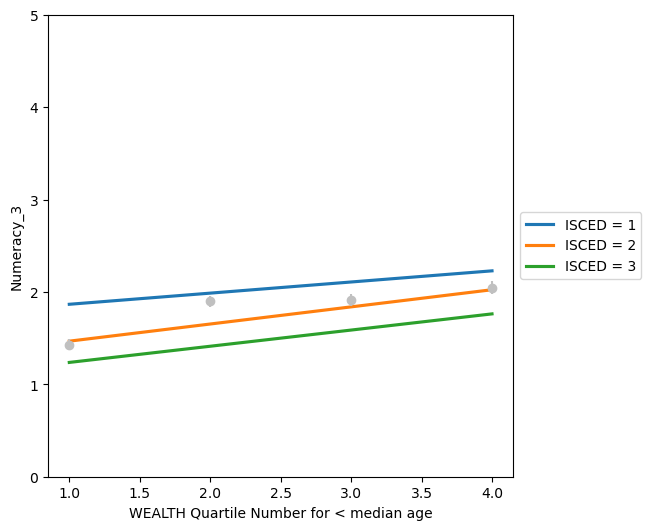

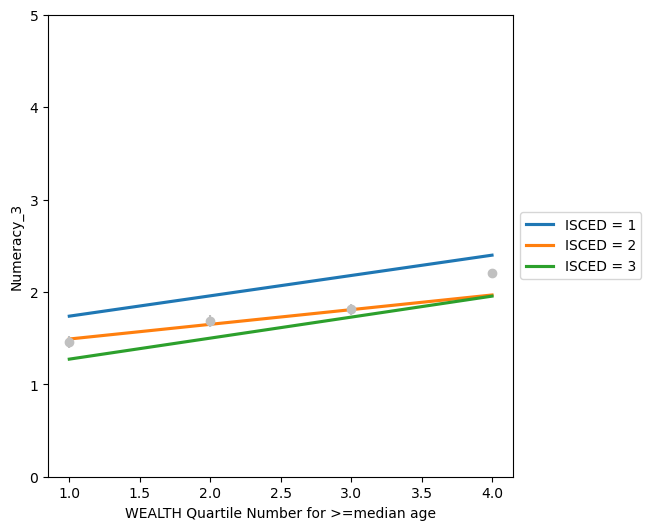

In [141]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['Numeracy_3'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Numeracy_3', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(0, 6 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['Numeracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['Numeracy_3'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['Numeracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Numeracy_3', xlabel='WEALTH Quartile Number for >=median age',  yticks = np.arange(0, 6 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

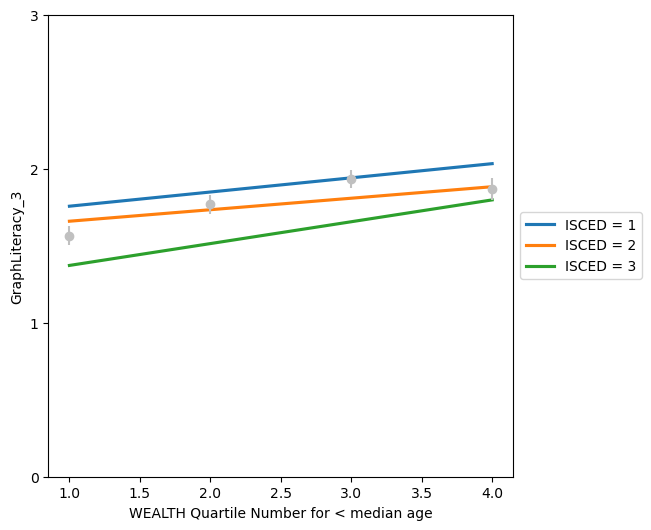

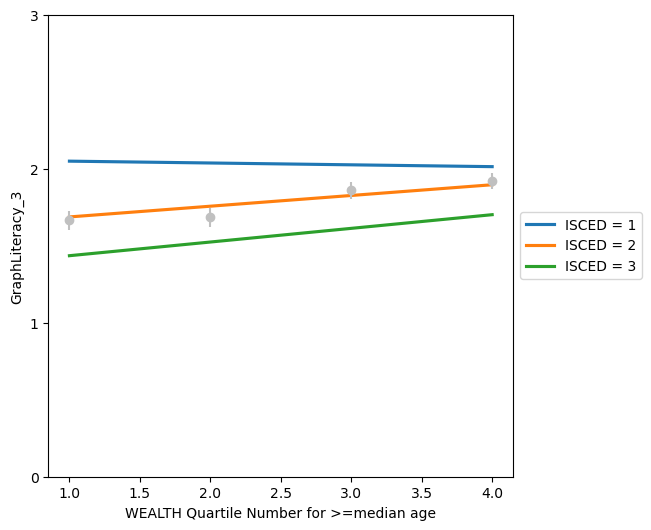

In [142]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['GraphLiteracy_3'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(0, 4 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['GraphLiteracy_3'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['GraphLiteracy_3'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['GraphLiteracy_3'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='GraphLiteracy_3', xlabel='WEALTH Quartile Number for >=median age',  yticks = np.arange(0, 4 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

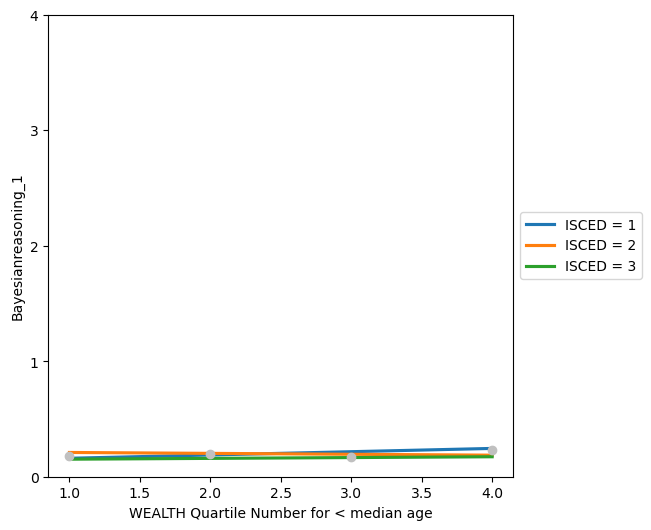

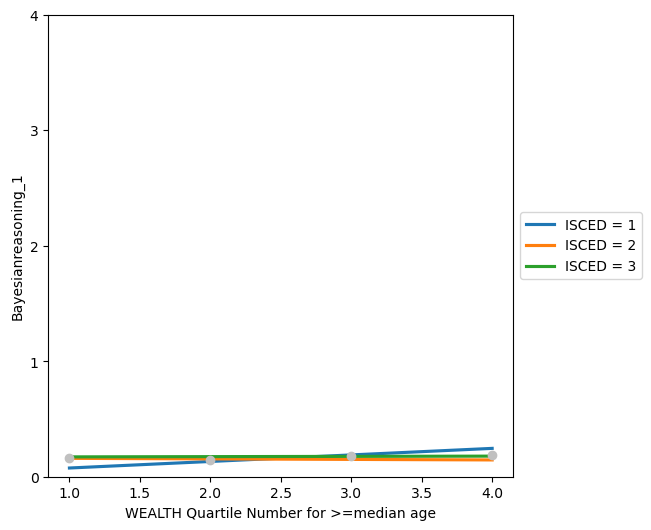

In [143]:
fig, ax1 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] < age_m) & (df4['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax1, label='ISCED = 3')

ax1.errorbar(x = df4.loc[ (df4['age'] < age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] < age_m)  ].groupby(['Quartile Number'])['Bayesianreasoning_1'].mean(), yerr = df4.loc[ (df4['age'] < age_m) ].groupby(['Quartile Number'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax1.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number for < median age',  yticks = np.arange(0, 5 , 1))
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))

sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==1)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 1')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==2)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 2')
sns.regplot (scatter = False, data = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)].reset_index(drop = True), x = 'Quartile Number', y = df4.loc[(df4['age'] >=age_m) & (df4['isced']==3)]['Bayesianreasoning_1'], fit_reg=True, ci=None, ax=ax2, label='ISCED = 3')

ax2.errorbar(x = df4.loc[ (df4['age'] >= age_m)  ]["Quartile Number"].unique(), y = df4.loc[ (df4['age'] >=age_m)  ].groupby(['Quartile Number'])['Bayesianreasoning_1'].mean(), yerr = df4.loc[ (df4['age'] >=age_m) ].groupby(['Quartile Number'])['Bayesianreasoning_1'].sem(), fmt='o', color = lighten_color('gray',0.5))
ax2.set(ylabel='Bayesianreasoning_1', xlabel='WEALTH Quartile Number for >=median age',  yticks = np.arange(0, 5 , 1))
ax2.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()